In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install category_encoders
import category_encoders as ce

!git clone https://github.com/Altaf0786/helpercode.git

from helpercode.missingAnalyser  import MissingValuesAnalysisTemplate , FullMissingnoAnalysis
from helpercode.missinghandler import (
    MissingValueHandler,
    SimpleImputationStrategy,
    KNNImputationStrategy,
    MICEImputationStrategy,
    MissingIndicatorStrategy,
    DeleteMissingValuesStrategy,
)
from helpercode.end_of_distribution_feasible import (
    load_data,
    NormalDistributionImputation,
    QuartileImputation,
    impute_and_analyze
)
from helpercode.mean_median_fesibale import load_data, impute_and_analyze
from helpercode.univariate_outlier import UnivariateOutlierDetector, ZScoreOutlierDetection, IQROutlierDetection


from helpercode.caa_feasible import  main,filter_columns_by_missing_values, compare_distributions
from helpercode.multi_outlier import OutlierDetection, KNNStrategy, OneClassSVMStrategy, IsolationForestStrategy, LOFStrategy, DBSCANStrategy


from helpercode.feature_encoading  import FeatureEngineeringStrategy,CommonEncoder,CommonEncoder,Feature_Engineering,OneHotEncoding,OrdinalEncoding,CountEncoding
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#from google.colab import drive
#drive.mount('/content/drive')


fatal: destination path 'helpercode' already exists and is not an empty directory.


In [79]:
!pip install missingno


In [80]:
df1 = pd.read_csv('/Users/mdaltafshekh/Downloads/data_cleand_v3.csv')
df=df1.copy()

In [82]:
df.head()

,PROP_NAME,PROPERTY_TYPE,FACING,TRANSACT_TYPE,OWNTYPE,AGE,ADDRESS,LOCALITY_NAME,AREA,CITY,LATITUDE,LONGITUDE,PRICE,PRICE_PER_SQFT,BEDROOM_NUM,BALCONY_NUM,TOTAL_FLOOR,FLOOR_NUM,FURNISH,PREFERENCE,READY TO MOVE,RESALE,METROSTATION,SHOPPING,CONNECTIVITY,EDUCATION,HOSPITAL,AIRPORT,RAILWAYSTATION,OFFICECOMPLEX,HOTEL,AMUSEMENTPARK,GOLFCOURSE,STADIUM,RELIGIOUSPLACE,ATM,PARKING,BUSDEPOT,MISCELLANEOUS,TOTAL_LANDMARK_COUNT,AMENITY_LUXURY,FEATURES_LUXURY
0,anandavanam farm land alur,plot,3,1.0,1,relative new property,NaN,alur,1089.0,hyderabad,18.821612,78.211468,0.058,0.000053,NaN,NaN,2.0,Unknown,Unfurnished,sale,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,low,low
1,fresco fountain city,plot,7,1.0,1,relative new property,NaN,thakurpukur,720.0,kolkata south,22.460607,88.312997,0.013,0.000018,NaN,NaN,3.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,18.0,low,low
2,mahathae brindavan,plot,3,1.0,1,relative new property,NaN,farooq nagar mandal,1647.0,hyderabad,17.327900,78.468206,0.183,0.000111,NaN,NaN,5.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.0,low,low
3,mahavir platinium,apartment,5,NaN,0,relative new property,NaN,chembur,785.0,mumbai harbour,19.062584,72.901218,NaN,NaN,2.0,0.0,16.0,Low-rise,Fully Furnished,rent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50.0,medium,low
4,new booking,apartment,5,1.0,1,moderate old property,NaN,chandannagar,800.0,kolkata west,22.855886,88.380000,0.270,0.000338,2.0,1.0,4.0,Low-rise,Semi-Furnished,sale,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.0,medium,low


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38502 entries, 0 to 38501
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROP_NAME             33484 non-null  object 
 1   PROPERTY_TYPE         38502 non-null  object 
 2   FACING                38502 non-null  int64  
 3   TRANSACT_TYPE         31988 non-null  float64
 4   OWNTYPE               38502 non-null  int64  
 5   AGE                   38502 non-null  object 
 6   ADDRESS               11975 non-null  object 
 7   LOCALITY_NAME         38502 non-null  object 
 8   AREA                  38502 non-null  float64
 9   CITY                  38502 non-null  object 
 10  LATITUDE              38502 non-null  float64
 11  LONGITUDE             38502 non-null  float64
 12  PRICE                 32274 non-null  float64
 13  PRICE_PER_SQFT        32274 non-null  float64
 14  BEDROOM_NUM           34948 non-null  float64
 15  BALCONY_NUM        

In [88]:
df = df[~df['PROP_NAME'].isin(['on request'])]

In [90]:
# Filter out rows with 'rent' or 'pending' in the 'PREFERENCE' column
df = df[~df['PREFERENCE'].isin(['rent', 'pending'])]

In [92]:
df.head()

,PROP_NAME,PROPERTY_TYPE,FACING,TRANSACT_TYPE,OWNTYPE,AGE,ADDRESS,LOCALITY_NAME,AREA,CITY,LATITUDE,LONGITUDE,PRICE,PRICE_PER_SQFT,BEDROOM_NUM,BALCONY_NUM,TOTAL_FLOOR,FLOOR_NUM,FURNISH,PREFERENCE,READY TO MOVE,RESALE,METROSTATION,SHOPPING,CONNECTIVITY,EDUCATION,HOSPITAL,AIRPORT,RAILWAYSTATION,OFFICECOMPLEX,HOTEL,AMUSEMENTPARK,GOLFCOURSE,STADIUM,RELIGIOUSPLACE,ATM,PARKING,BUSDEPOT,MISCELLANEOUS,TOTAL_LANDMARK_COUNT,AMENITY_LUXURY,FEATURES_LUXURY
0,anandavanam farm land alur,plot,3,1.0,1,relative new property,NaN,alur,1089.0,hyderabad,18.821612,78.211468,0.058,0.000053,NaN,NaN,2.0,Unknown,Unfurnished,sale,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,low,low
1,fresco fountain city,plot,7,1.0,1,relative new property,NaN,thakurpukur,720.0,kolkata south,22.460607,88.312997,0.013,0.000018,NaN,NaN,3.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,18.0,low,low
2,mahathae brindavan,plot,3,1.0,1,relative new property,NaN,farooq nagar mandal,1647.0,hyderabad,17.327900,78.468206,0.183,0.000111,NaN,NaN,5.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.0,low,low
4,new booking,apartment,5,1.0,1,moderate old property,NaN,chandannagar,800.0,kolkata west,22.855886,88.380000,0.270,0.000338,2.0,1.0,4.0,Low-rise,Semi-Furnished,sale,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.0,medium,low
5,newtown action area 1,apartment,1,1.0,3,old property,NaN,ca block,900.0,kolkata east,22.632687,88.450763,0.750,0.000833,3.0,1.0,5.0,Low-rise,Semi-Furnished,sale,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,36.0,low,low


In [94]:
 df['CITY'].value_counts()

CITY
gurgaon                   10142
hyderabad                  7229
kolkata south              2869
kolkata east               2029
navi mumbai                1866
kolkata north              1292
central mumbai suburbs     1254
thane                      1090
mumbai andheri-dahisar      813
secunderabad                654
south mumbai                527
mumbai beyond thane         439
mira road and beyond        345
mumbai harbour              278
kolkata west                223
mumbai south west           177
kolkata central              53
Name: count, dtype: int64

In [96]:
df['CITY']=df['CITY'].replace( {'mumbai': 'Mumbai',
        'navi mumbai': 'Mumbai',
        'central mumbai suburbs': 'Mumbai',
        'mumbai andheri-dahisar': 'Mumbai',
        'south mumbai': 'Mumbai',
        'mumbai beyond thane': 'Mumbai',
        'mira road and beyond': 'Mumbai',
        'mumbai harbour': 'Mumbai',
        'mumbai south west': 'Mumbai',
        'thane': 'Mumbai',
        'kolkata': 'Kolkata',
        'kolkata south': 'Kolkata',
        'kolkata east': 'Kolkata',
        'kolkata north': 'Kolkata',
        'kolkata west': 'Kolkata',
        'kolkata central': 'Kolkata',
        'secunderabad': 'hyderabad'                        
    }
                  )

In [98]:
df['CITY'].value_counts()

CITY
gurgaon      10142
hyderabad     7883
Mumbai        6789
Kolkata       6466
Name: count, dtype: int64

In [100]:
df.drop(['PROP_NAME','LOCALITY_NAME','ADDRESS'],axis=1,inplace=True)

In [102]:
df.isnull().sum()

PROPERTY_TYPE              0
FACING                     0
TRANSACT_TYPE             21
OWNTYPE                    0
AGE                        0
AREA                       0
CITY                       0
LATITUDE                   0
LONGITUDE                  0
PRICE                    388
PRICE_PER_SQFT           388
BEDROOM_NUM             3533
BALCONY_NUM             9969
TOTAL_FLOOR              622
FLOOR_NUM                  0
FURNISH                    0
PREFERENCE                 0
READY TO MOVE              0
RESALE                     0
METROSTATION               0
SHOPPING                   0
CONNECTIVITY               0
EDUCATION                  0
HOSPITAL                   0
AIRPORT                    0
RAILWAYSTATION             0
OFFICECOMPLEX              0
HOTEL                      0
AMUSEMENTPARK              0
GOLFCOURSE                 0
STADIUM                    0
RELIGIOUSPLACE             0
ATM                        0
PARKING                    0
BUSDEPOT      

Using FullMissingnoAnalysis:

Missing Values Summary (Sorted by Percentage):
                      Missing Values  Percentage
TRANSACT_TYPE                     21    0.067136
PRICE_PER_SQFT                   388    1.240409
PRICE                            388    1.240409
TOTAL_FLOOR                      622    1.988491
TOTAL_LANDMARK_COUNT            1925    6.154092
BEDROOM_NUM                     3533   11.294757
BALCONY_NUM                     9969   31.870205

Visualizing Missing Values with Missingno...


<Figure size 640x480 with 0 Axes>

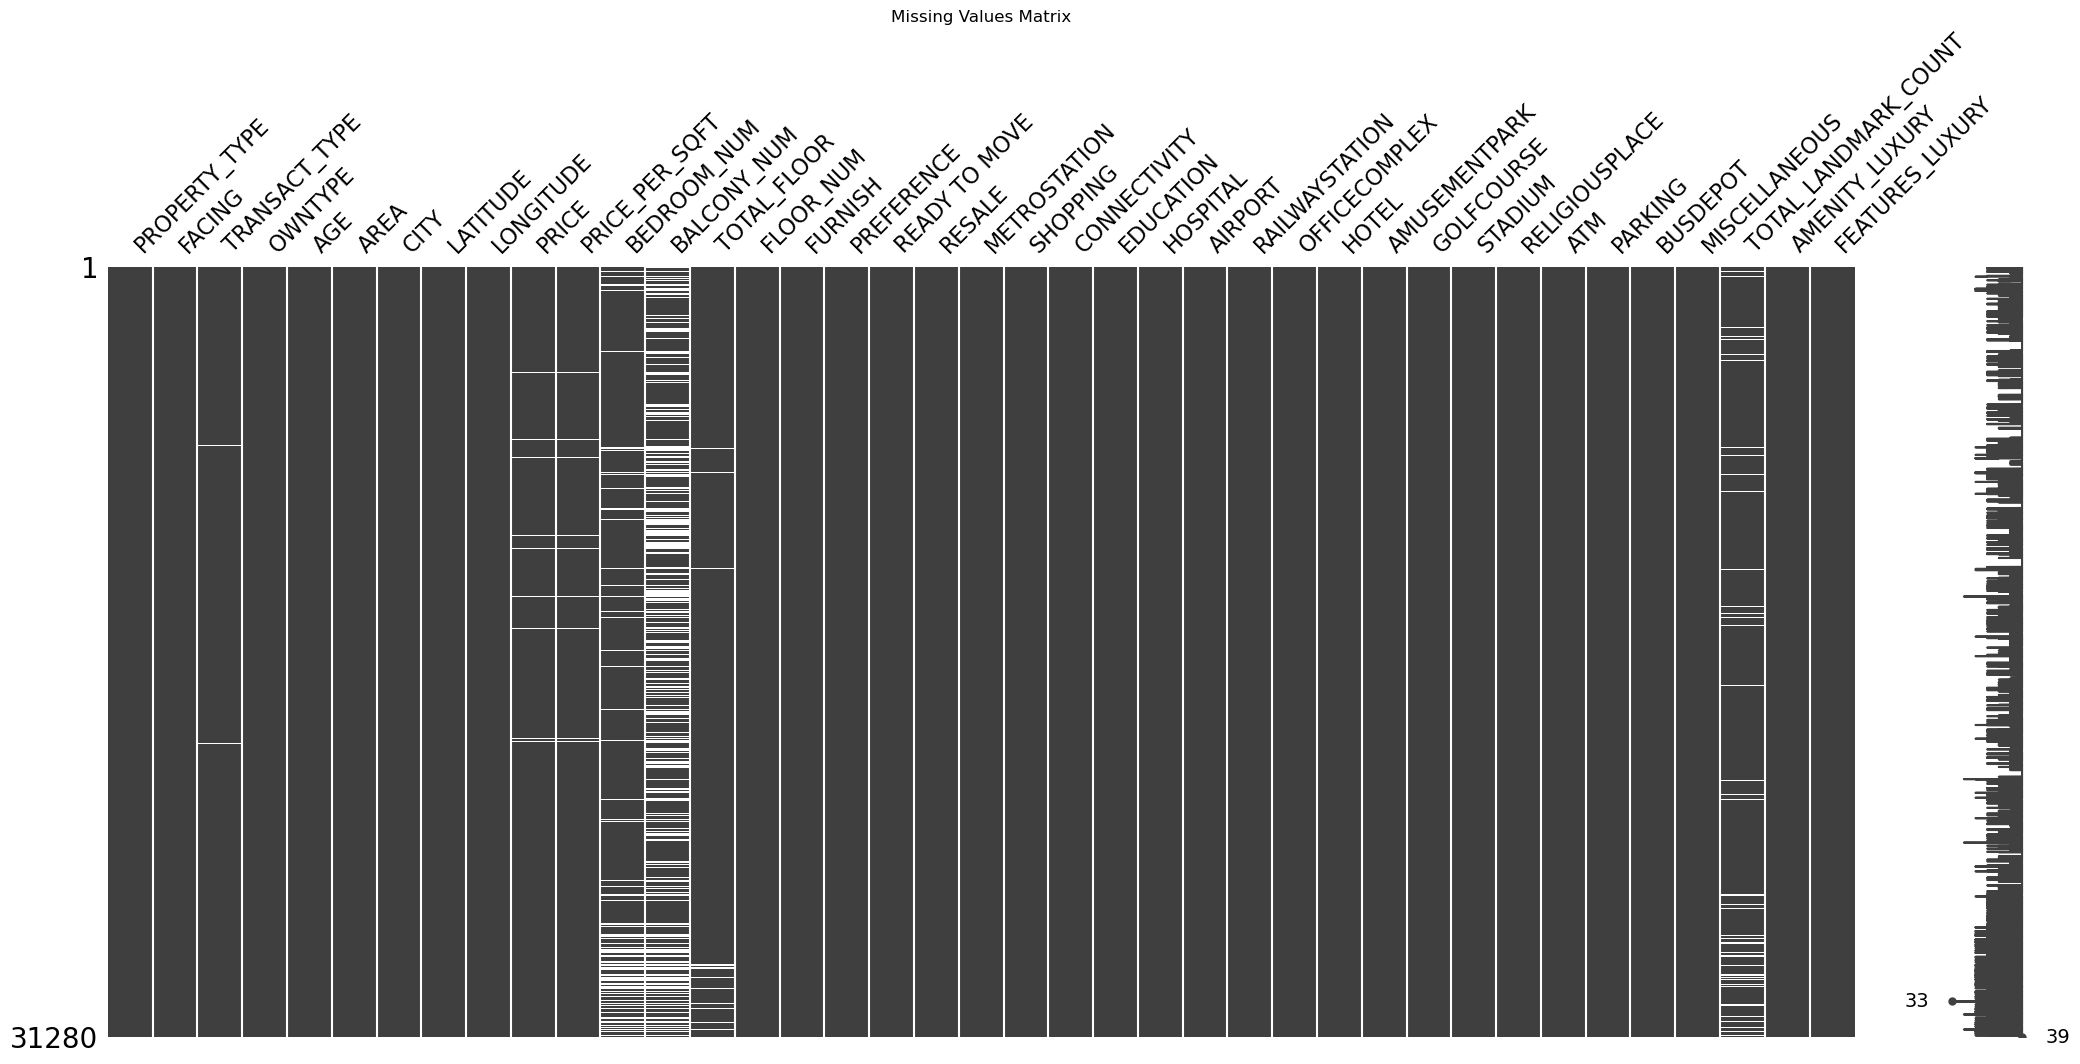

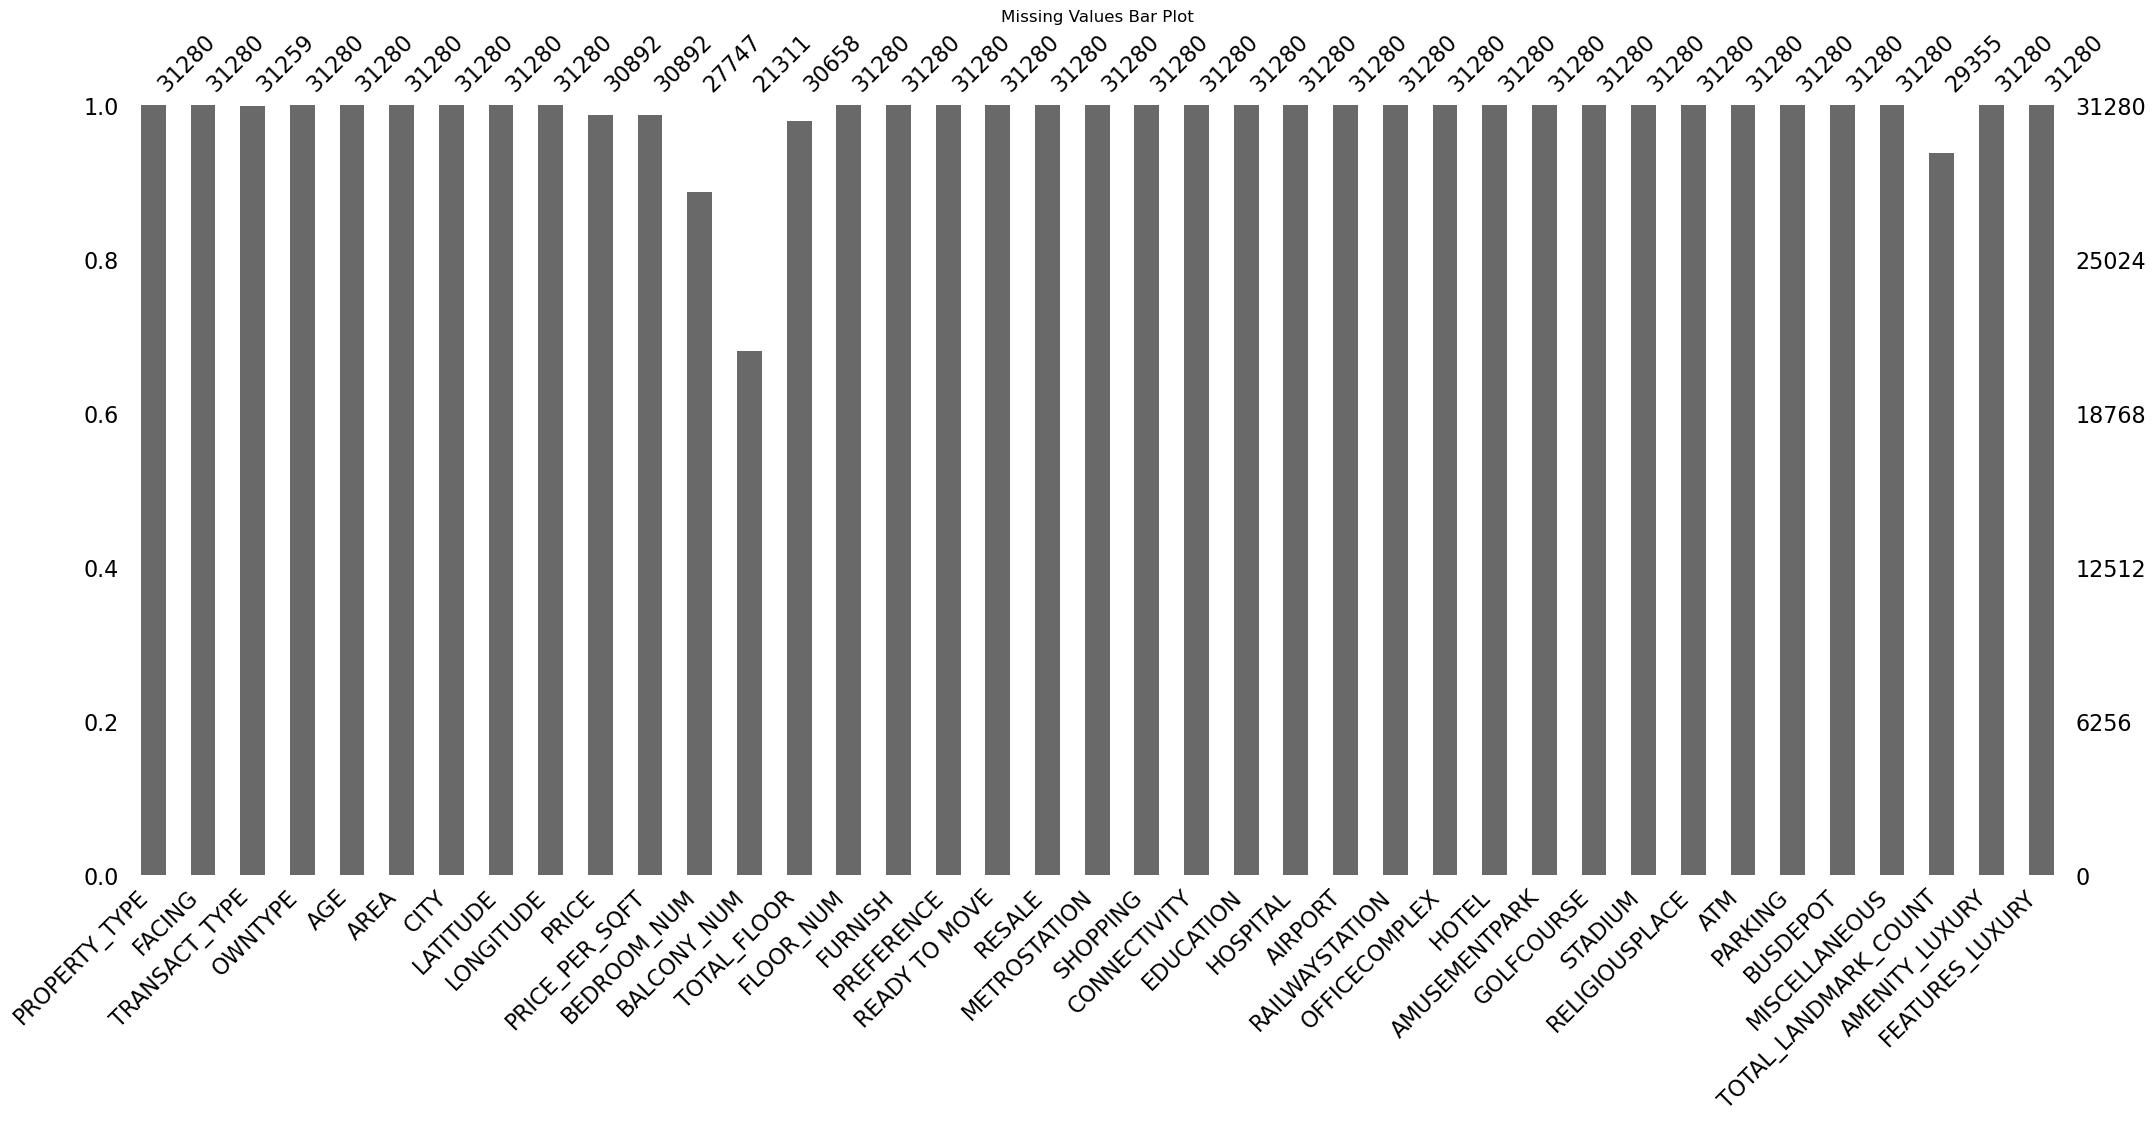

<Figure size 640x480 with 0 Axes>

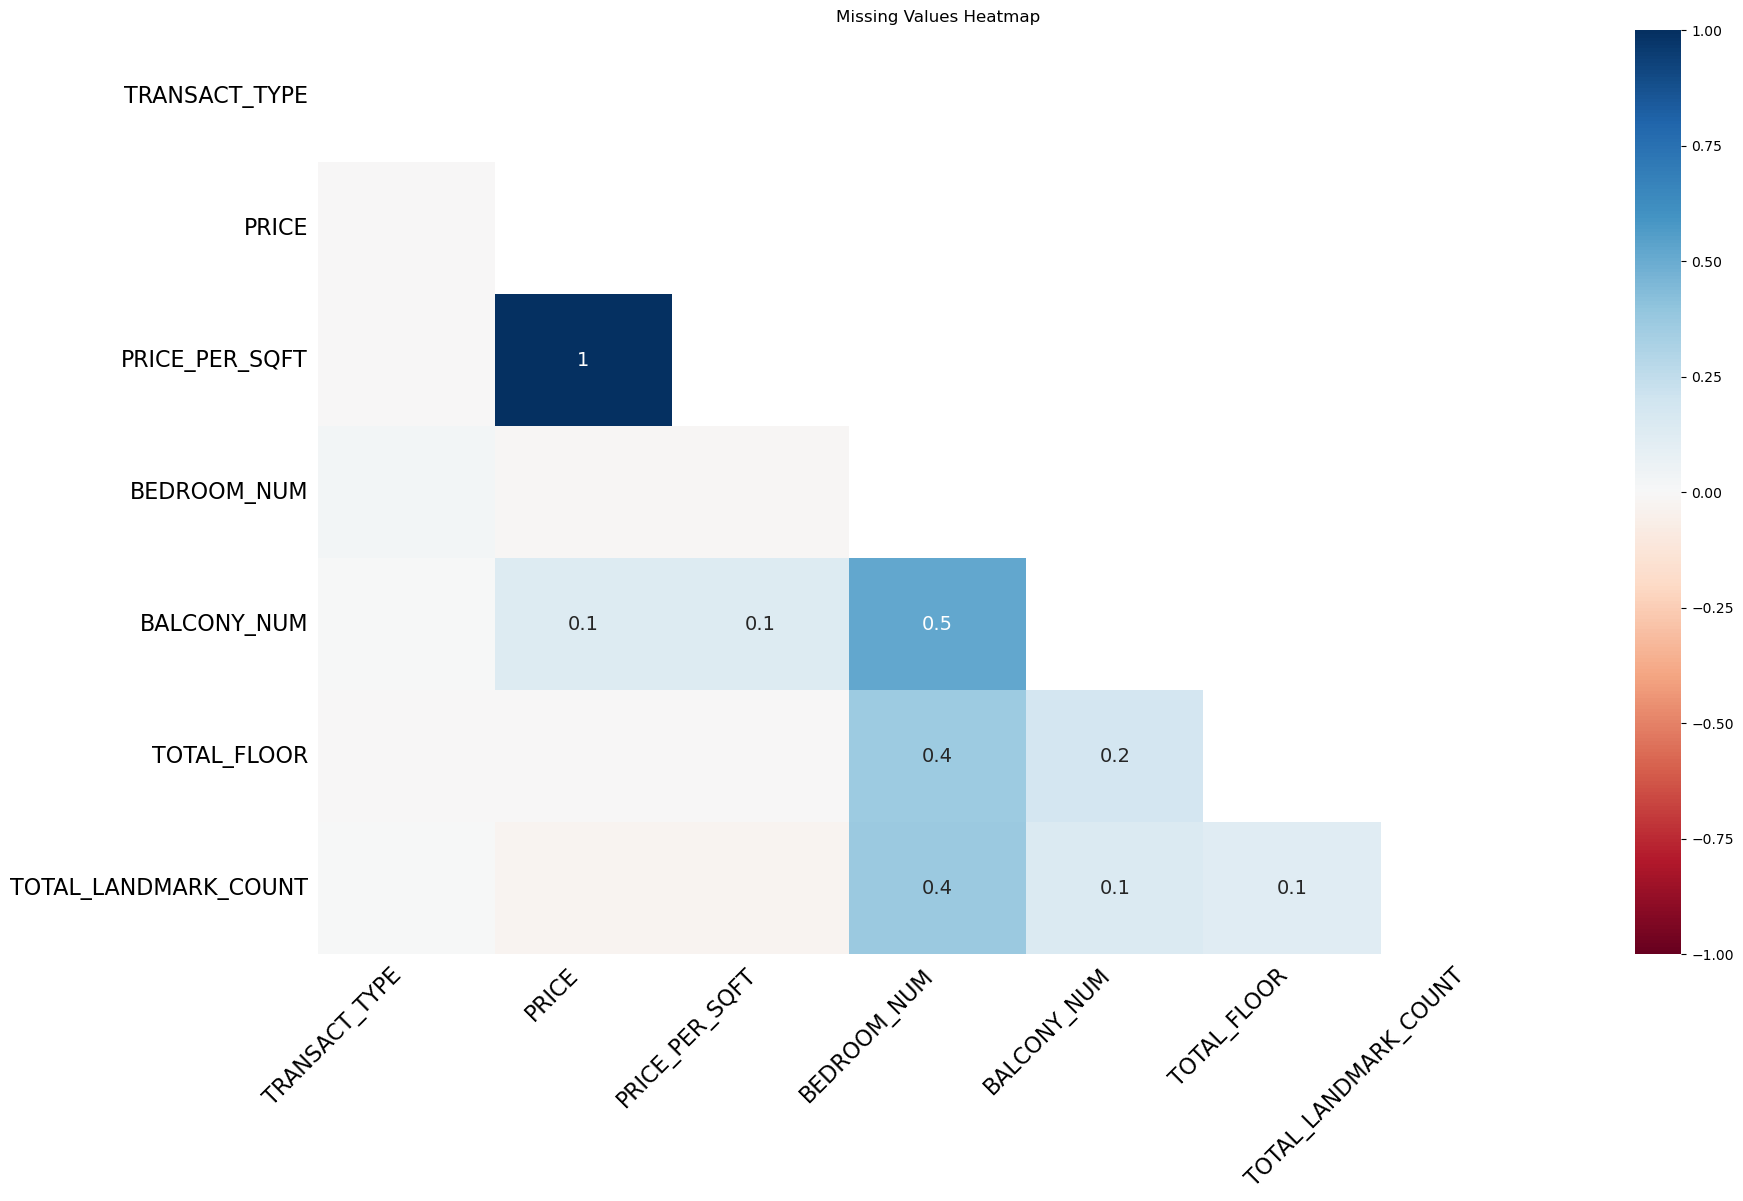

<Figure size 640x480 with 0 Axes>

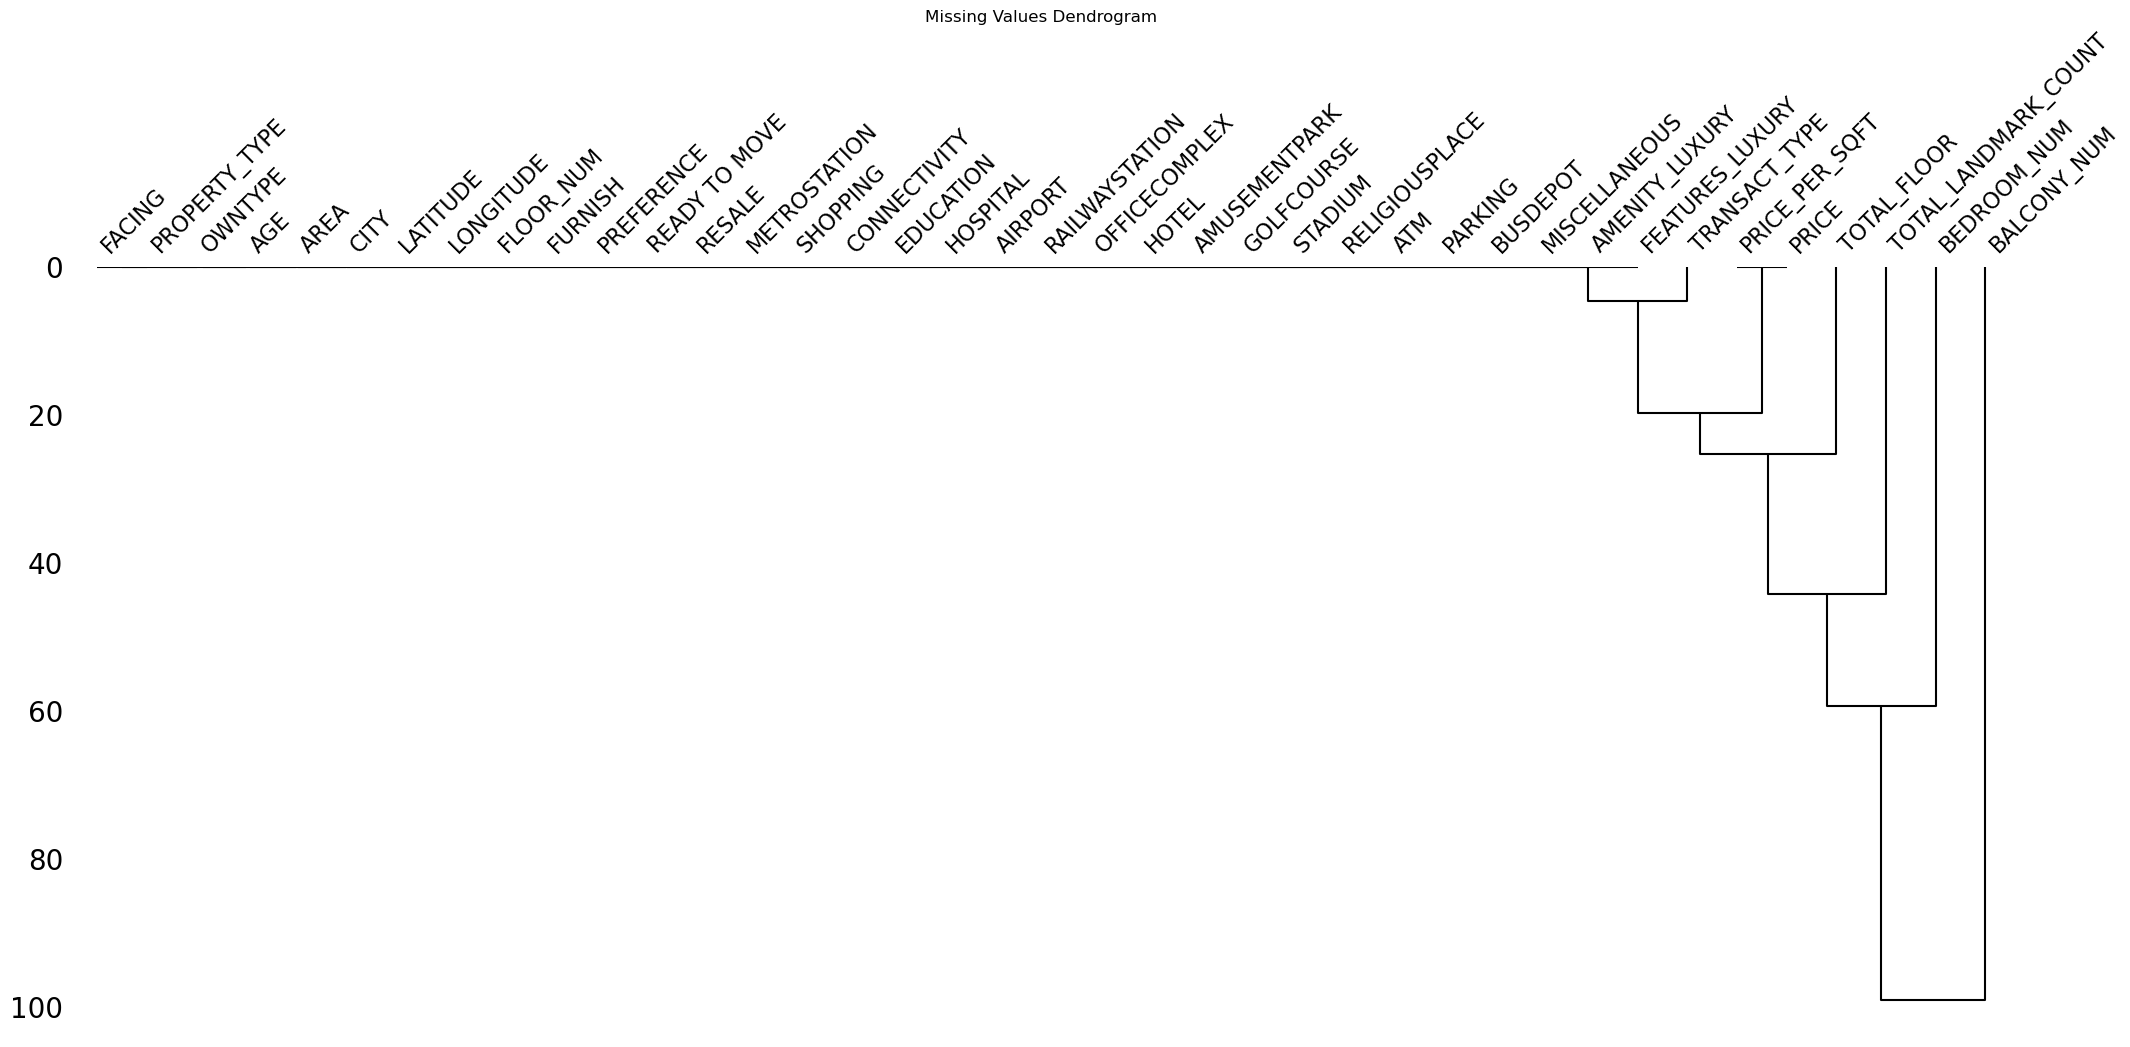

In [104]:
# price column
print("Using FullMissingnoAnalysis:")
full_missingno_analyzer = FullMissingnoAnalysis()
full_missingno_analyzer.analyze(df)

Dataset Analysis:

--- Numerical Columns Comparison ---

Numerical Column: TRANSACT_TYPE
Mean Before CCA: 1.21, Mean After CCA: 1.21
KS Statistic for TRANSACT_TYPE: 0.0038, P-Value: 0.9768

The distributions before and after CCA for 'TRANSACT_TYPE' are similar (p > 0.05).
Proceed with Complete Case Analysis (CCA).



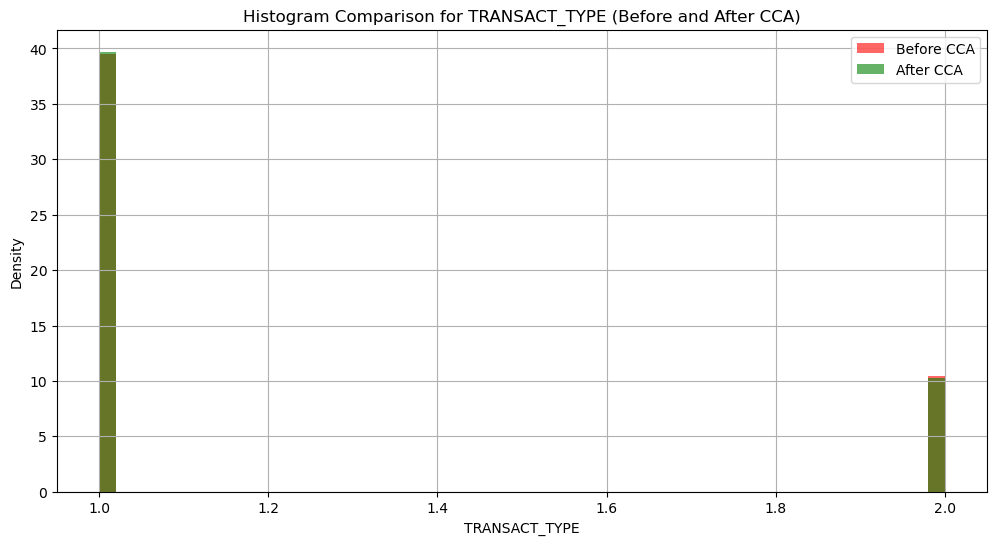

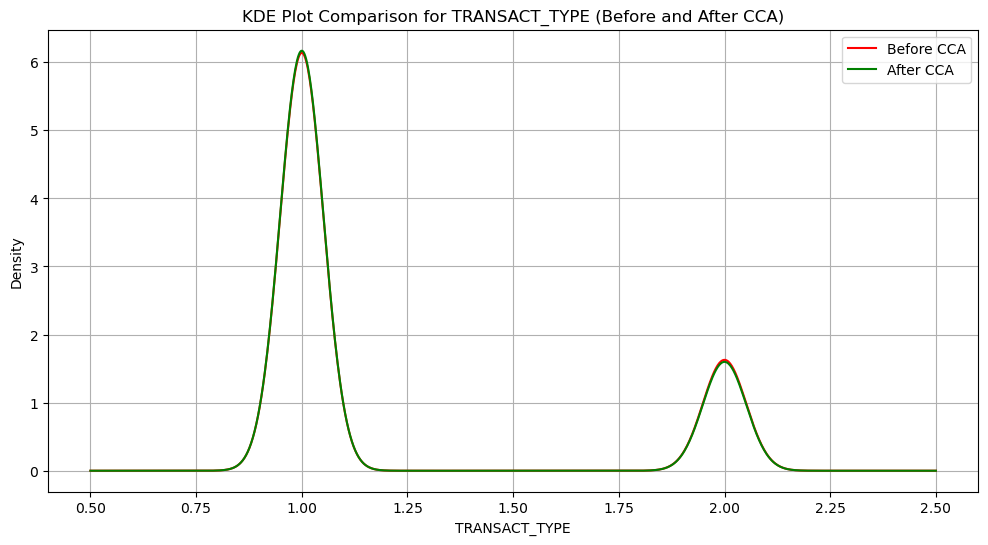


Numerical Column: PRICE
Mean Before CCA: 2.40, Mean After CCA: 2.40
KS Statistic for PRICE: 0.0083, P-Value: 0.2441

The distributions before and after CCA for 'PRICE' are similar (p > 0.05).
Proceed with Complete Case Analysis (CCA).



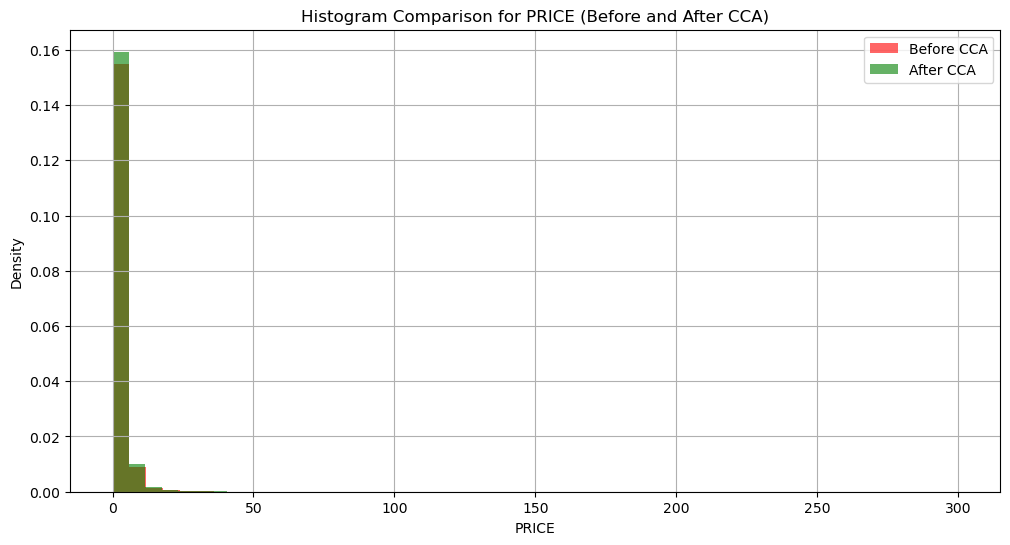

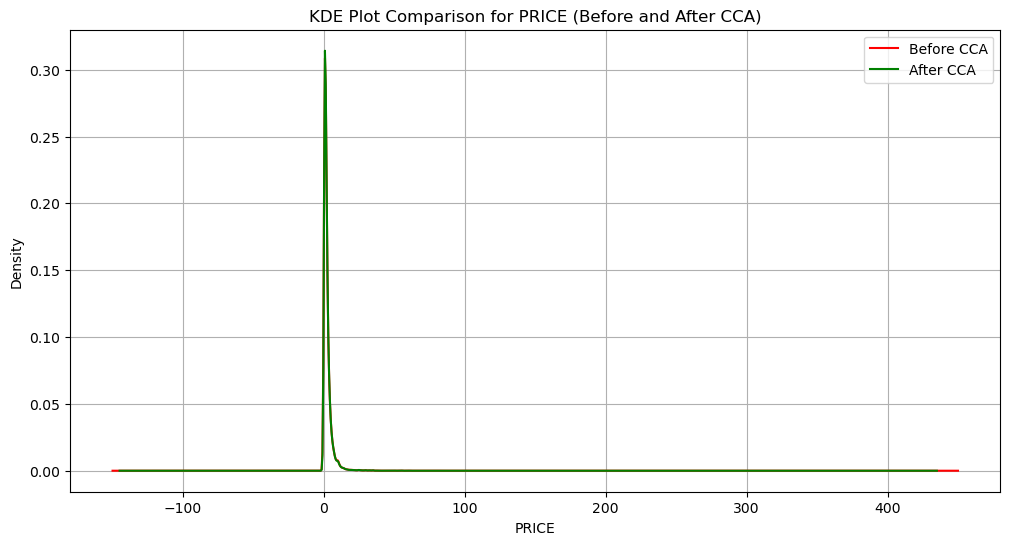


Numerical Column: PRICE_PER_SQFT
Mean Before CCA: 0.00, Mean After CCA: 0.00
KS Statistic for PRICE_PER_SQFT: 0.0138, P-Value: 0.0059

The distributions before and after CCA for 'PRICE_PER_SQFT' are significantly different (p <= 0.05).
Consider alternative methods such as data imputation or other approaches instead of CCA.



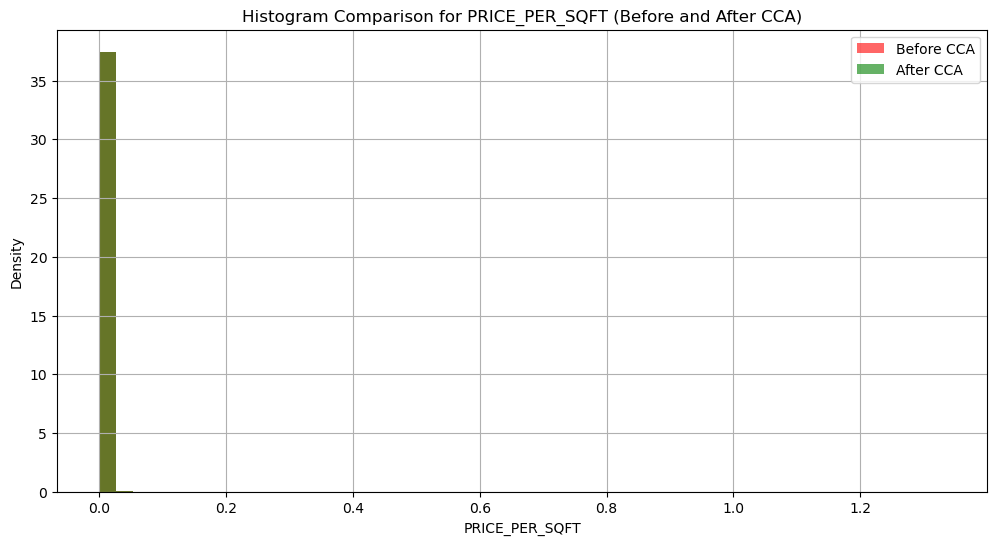

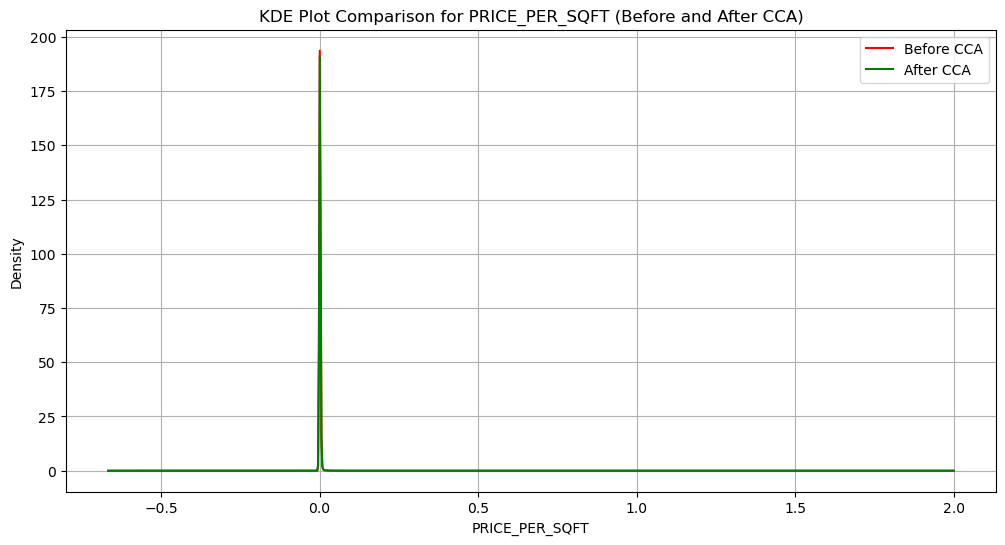


Numerical Column: TOTAL_FLOOR
Mean Before CCA: 15.23, Mean After CCA: 15.16
KS Statistic for TOTAL_FLOOR: 0.0031, P-Value: 0.9983

The distributions before and after CCA for 'TOTAL_FLOOR' are similar (p > 0.05).
Proceed with Complete Case Analysis (CCA).



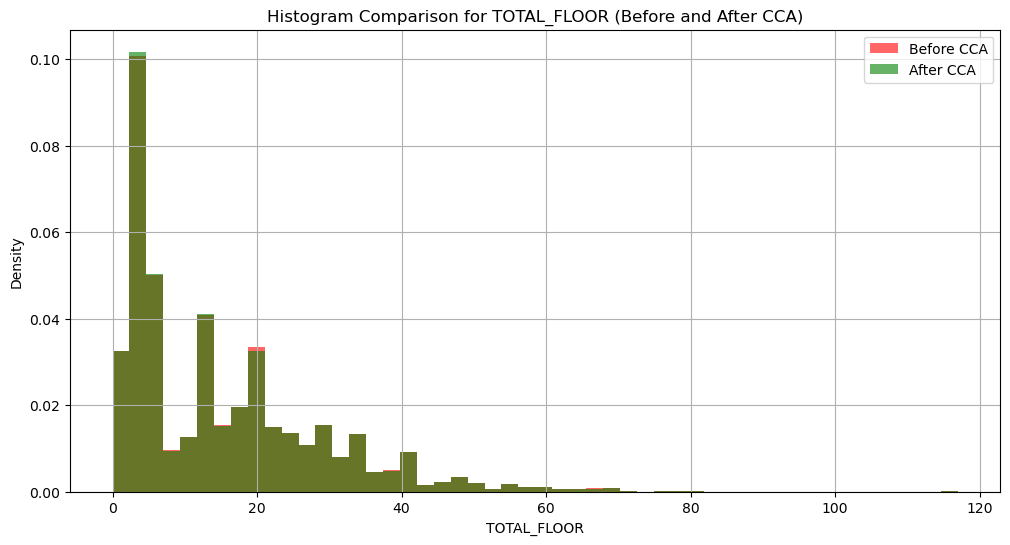

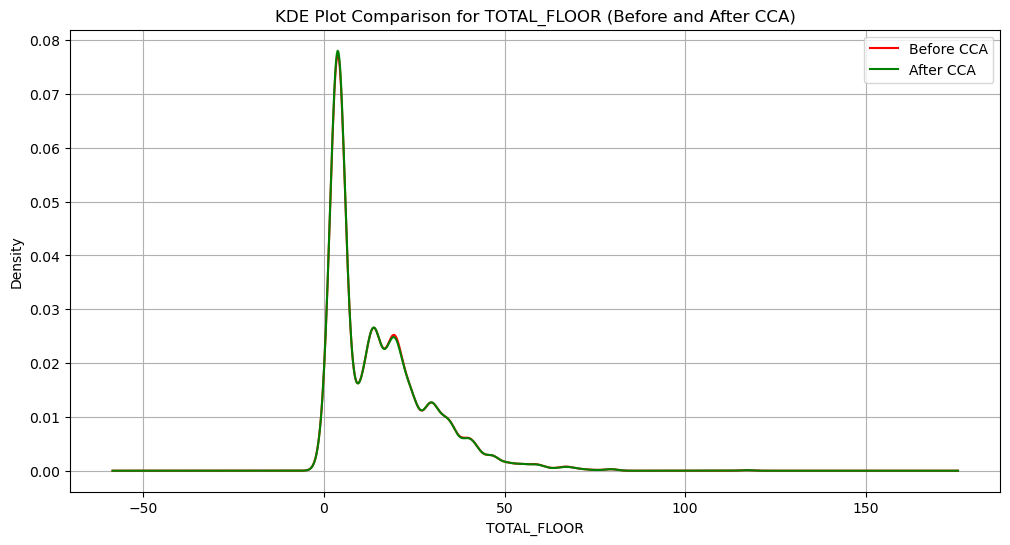


--- Categorical Columns Comparison ---
Before CCA: (31280, 39)
After CCA: (30253, 4)


In [106]:
# caa feasible or not
print("Dataset Analysis:")
main(df)

observation: cca is feasible for total floor,price,price per sqrft and transaction type

Variance Analysis:
Original TRANSACT_TYPE variance: 0.16423590773980298
TRANSACT_TYPE Variance after median imputation: 0.1641583093938211
TRANSACT_TYPE Variance after mean imputation: 0.16413089337206782


Original TOTAL_FLOOR variance: 186.16089098235278
TOTAL_FLOOR Variance after median imputation: 182.69636863592626
TOTAL_FLOOR Variance after mean imputation: 182.50061210438795


Original TOTAL_LANDMARK_COUNT variance: 295.8063833788182
TOTAL_LANDMARK_COUNT Variance after median imputation: 281.4118688284336
TOTAL_LANDMARK_COUNT Variance after mean imputation: 277.74331524938736


Original BEDROOM_NUM variance: 1.4113713345267076
BEDROOM_NUM Variance after median imputation: 1.25318511157751
BEDROOM_NUM Variance after mean imputation: 1.252032965025045


Original BALCONY_NUM variance: 1.3721418466522943
BALCONY_NUM Variance after median imputation: 0.9448318017374226
BALCONY_NUM Variance after mean imputation: 0.9383952132742732




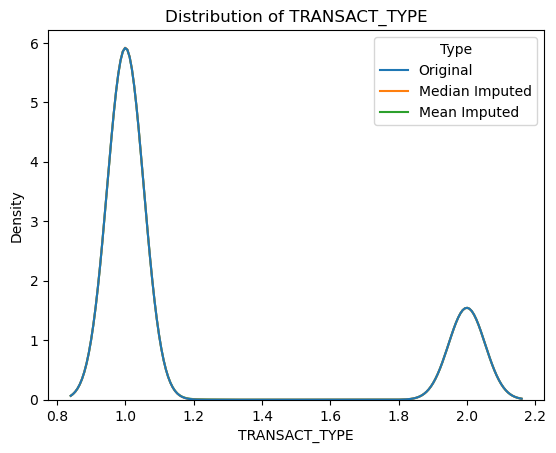

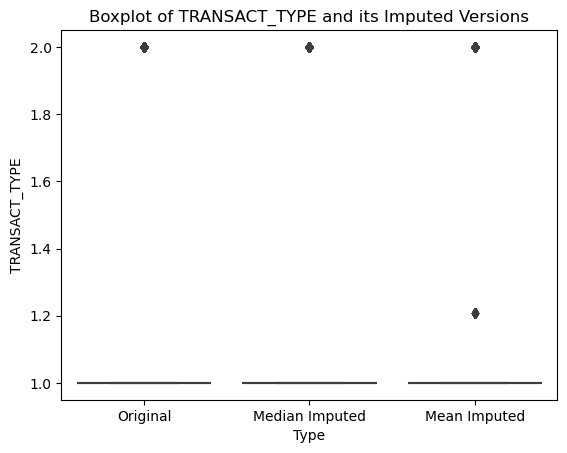

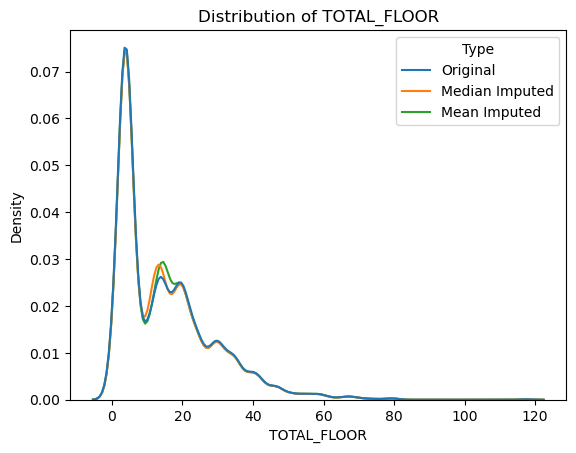

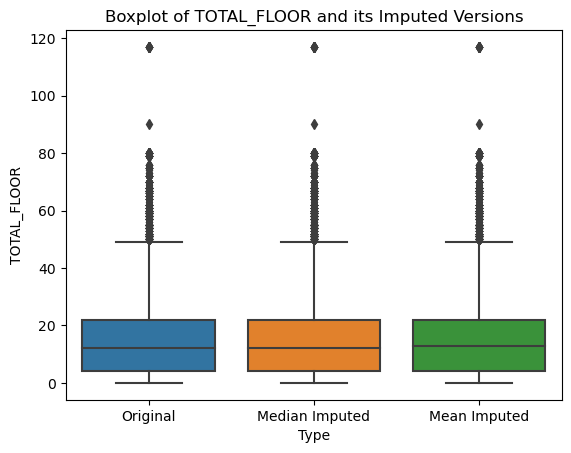

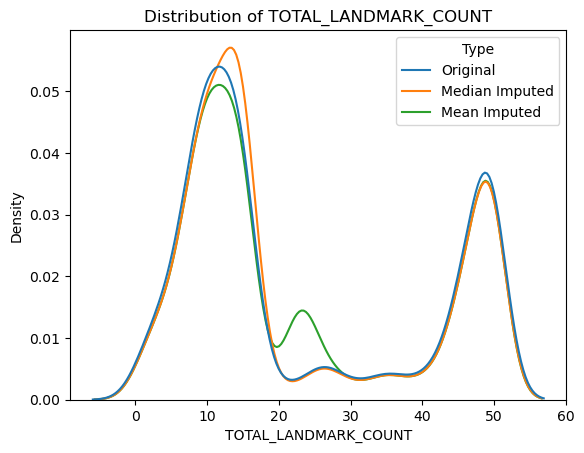

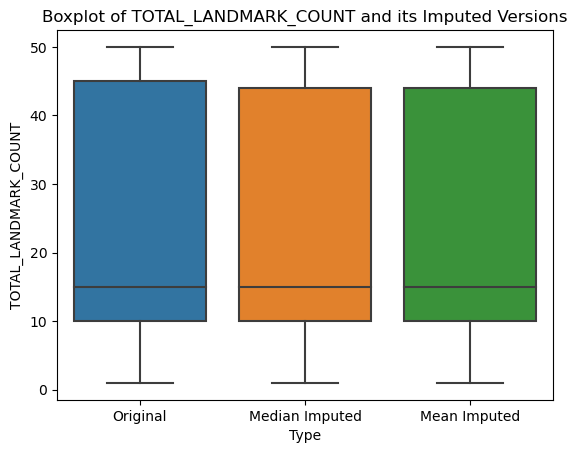

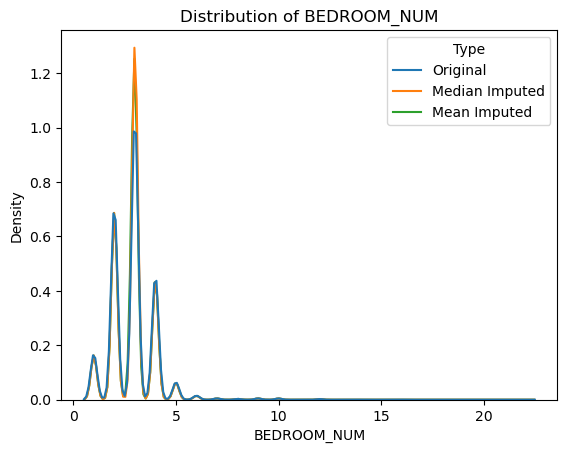

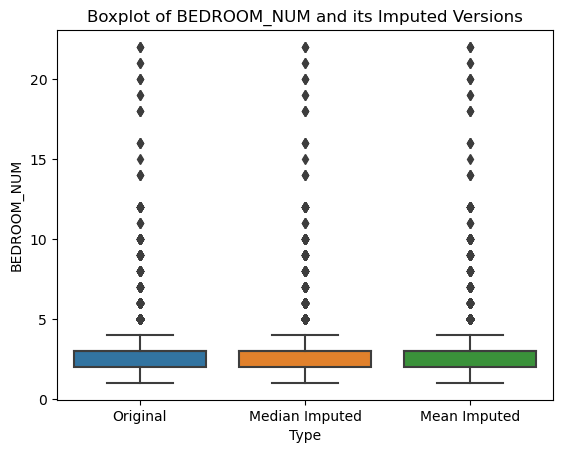

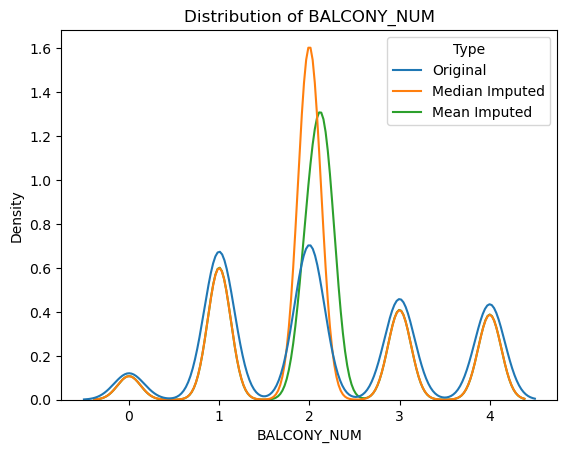

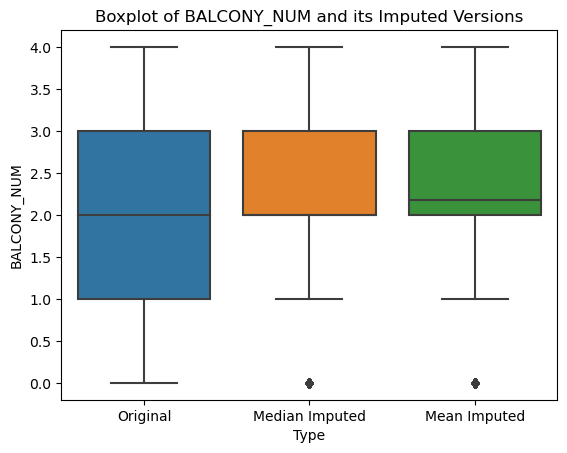

Sklearn Imputer Statistics:
TRANSACT_TYPE Median Imputer Statistics: [ 1. 12. 15.  3.  2.]
TRANSACT_TYPE Mean Imputer Statistics: [ 1.20713372 15.18681722 22.99902111  2.89274292  2.17254879]


TOTAL_FLOOR Median Imputer Statistics: [ 1. 12. 15.  3.  2.]
TOTAL_FLOOR Mean Imputer Statistics: [ 1.20713372 15.18681722 22.99902111  2.89274292  2.17254879]


TOTAL_LANDMARK_COUNT Median Imputer Statistics: [ 1. 12. 15.  3.  2.]
TOTAL_LANDMARK_COUNT Mean Imputer Statistics: [ 1.20713372 15.18681722 22.99902111  2.89274292  2.17254879]


BEDROOM_NUM Median Imputer Statistics: [ 1. 12. 15.  3.  2.]
BEDROOM_NUM Mean Imputer Statistics: [ 1.20713372 15.18681722 22.99902111  2.89274292  2.17254879]


BALCONY_NUM Median Imputer Statistics: [ 1. 12. 15.  3.  2.]
BALCONY_NUM Mean Imputer Statistics: [ 1.20713372 15.18681722 22.99902111  2.89274292  2.17254879]




In [109]:
# mean meadian is feasible or not # Columns to be imputed
numeric_cols = ['TRANSACT_TYPE', 'TOTAL_FLOOR','TOTAL_LANDMARK_COUNT','BEDROOM_NUM','BALCONY_NUM','PRICE']

# Analyze data
X_train_transformed, X_test_transformed, y_train, y_test = impute_and_analyze(df, 'PRICE', numeric_cols)


observation: transction type,total floor,no of bedroom mean median is feasible

In [113]:

# handle missing value
missing_value_handler = MissingValueHandler(SimpleImputationStrategy(strategy='mean'))
df_imputed_simple = missing_value_handler.handle_missing_values(df, columns=['PRICE', 'PRICE_PER_SQFT','TRANSACT_TYPE', 'TOTAL_FLOOR','TOTAL_LANDMARK_COUNT','BEDROOM_NUM','BALCONY_NUM'])
print("After Simple Imputation:\n", df_imputed_simple)

2024-12-17 19:55:53,105 - INFO - Executing missing value handling strategy.
2024-12-17 19:55:53,106 - INFO - Applying Simple imputation with strategy: mean.
2024-12-17 19:55:53,122 - INFO - Simple imputation completed.


After Simple Imputation:
 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [115]:
df_imputed_simple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31280 entries, 0 to 38501
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROPERTY_TYPE         31280 non-null  object 
 1   FACING                31280 non-null  int64  
 2   TRANSACT_TYPE         31280 non-null  float64
 3   OWNTYPE               31280 non-null  int64  
 4   AGE                   31280 non-null  object 
 5   AREA                  31280 non-null  float64
 6   CITY                  31280 non-null  object 
 7   LATITUDE              31280 non-null  float64
 8   LONGITUDE             31280 non-null  float64
 9   PRICE                 31280 non-null  float64
 10  PRICE_PER_SQFT        31280 non-null  float64
 11  BEDROOM_NUM           31280 non-null  float64
 12  BALCONY_NUM           31280 non-null  float64
 13  TOTAL_FLOOR           31280 non-null  float64
 14  FLOOR_NUM             31280 non-null  object 
 15  FURNISH               31

In [117]:
df_imputed_simple.head(50)

,PROPERTY_TYPE,FACING,TRANSACT_TYPE,OWNTYPE,AGE,AREA,CITY,LATITUDE,LONGITUDE,PRICE,PRICE_PER_SQFT,BEDROOM_NUM,BALCONY_NUM,TOTAL_FLOOR,FLOOR_NUM,FURNISH,PREFERENCE,READY TO MOVE,RESALE,METROSTATION,SHOPPING,CONNECTIVITY,EDUCATION,HOSPITAL,AIRPORT,RAILWAYSTATION,OFFICECOMPLEX,HOTEL,AMUSEMENTPARK,GOLFCOURSE,STADIUM,RELIGIOUSPLACE,ATM,PARKING,BUSDEPOT,MISCELLANEOUS,TOTAL_LANDMARK_COUNT,AMENITY_LUXURY,FEATURES_LUXURY
0,plot,3,1.0,1,relative new property,1089.0,hyderabad,18.821612,78.211468,0.058000,0.000053,2.897106,2.170053,2.0,Unknown,Unfurnished,sale,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.919843,low,low
1,plot,7,1.0,1,relative new property,720.0,Kolkata,22.460607,88.312997,0.013000,0.000018,2.897106,2.170053,3.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,18.000000,low,low
2,plot,3,1.0,1,relative new property,1647.0,hyderabad,17.327900,78.468206,0.183000,0.000111,2.897106,2.170053,5.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.000000,low,low
4,apartment,5,1.0,1,moderate old property,800.0,Kolkata,22.855886,88.380000,0.270000,0.000338,2.000000,1.000000,4.0,Low-rise,Semi-Furnished,sale,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.000000,medium,low
5,apartment,1,1.0,3,old property,900.0,Kolkata,22.632687,88.450763,0.750000,0.000833,3.000000,1.000000,5.0,Low-rise,Semi-Furnished,sale,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,36.000000,low,low
6,plot,5,1.0,1,relative new property,900.0,hyderabad,17.426833,78.534737,0.170000,0.000189,2.897106,2.170053,2.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50.000000,low,low
7,plot,4,1.0,1,relative new property,1800.0,hyderabad,17.408335,78.361182,2.100000,0.001167,2.897106,2.170053,2.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.000000,low,low
9,house,3,1.0,1,moderate old property,3874.0,hyderabad,17.443855,78.250431,3.060000,0.000790,4.000000,2.000000,2.0,Unknown,Semi-Furnished,sale,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.919843,high,high
10,apartment,1,1.0,1,old property,2322.0,gurgaon,28.409196,77.047811,2.700000,0.001163,4.000000,3.000000,4.0,Low-rise,Fully Furnished,sale,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,46.000000,medium,low
12,apartment,2,1.0,1,moderate old property,847.0,Kolkata,22.600691,88.469454,0.410000,0.000484,2.000000,1.000000,4.0,Low-rise,Semi-Furnished,sale,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,35.000000,low,low


2024-12-17 19:56:09,126 - INFO - Visualizing outliers for feature: FACING


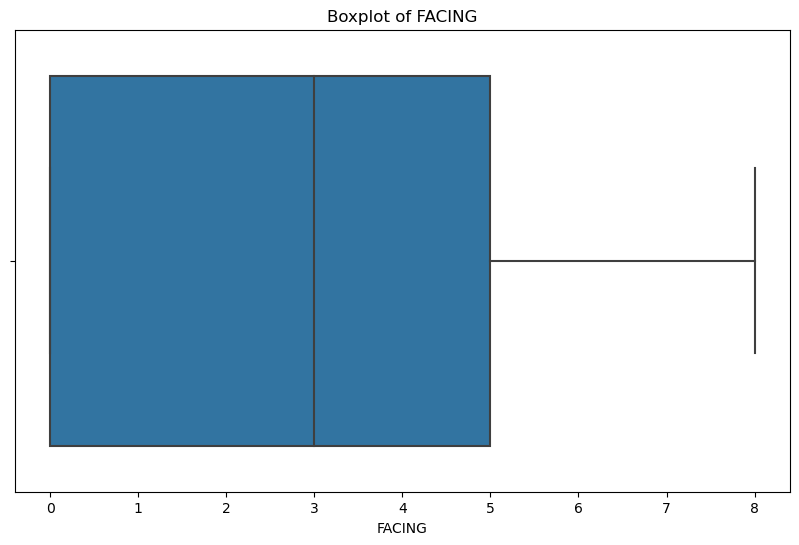

2024-12-17 19:56:09,198 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,198 - INFO - Visualizing outliers for feature: TRANSACT_TYPE


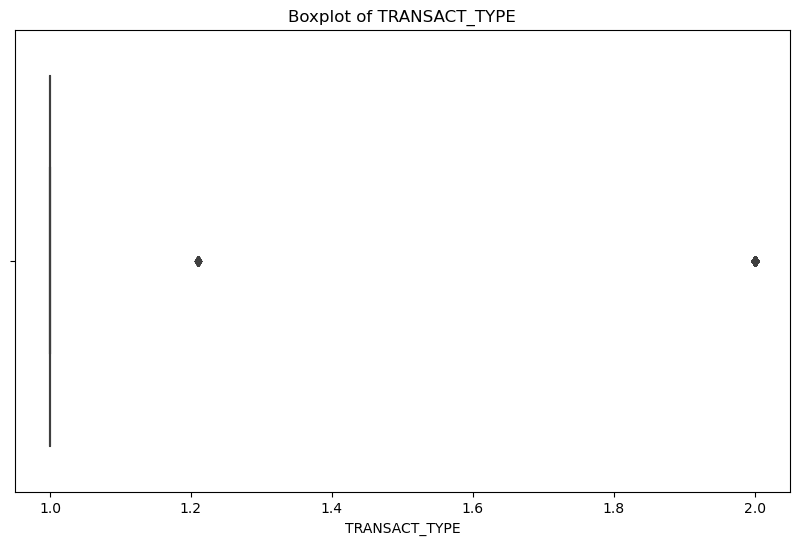

2024-12-17 19:56:09,247 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,247 - INFO - Visualizing outliers for feature: OWNTYPE


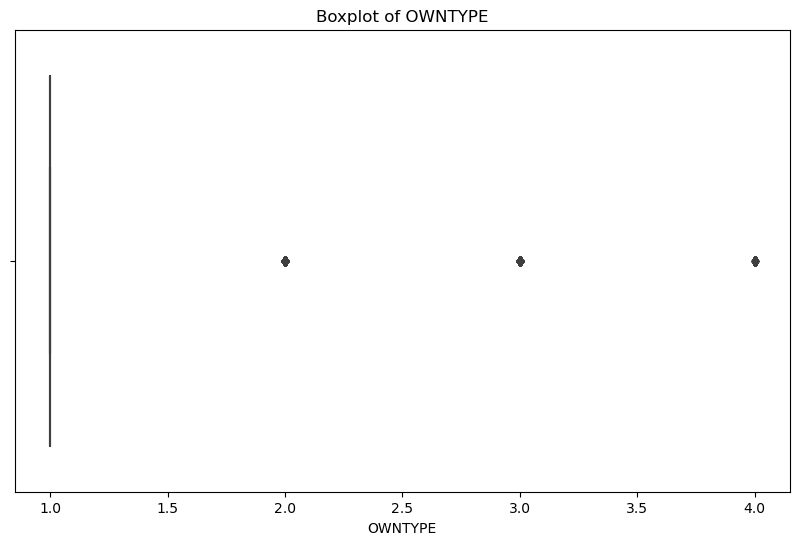

2024-12-17 19:56:09,288 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,289 - INFO - Visualizing outliers for feature: AREA


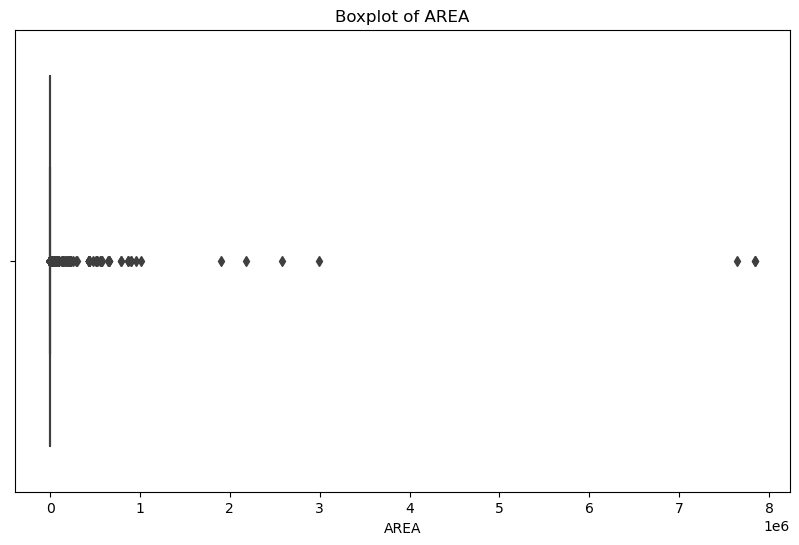

2024-12-17 19:56:09,405 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,405 - INFO - Visualizing outliers for feature: LATITUDE


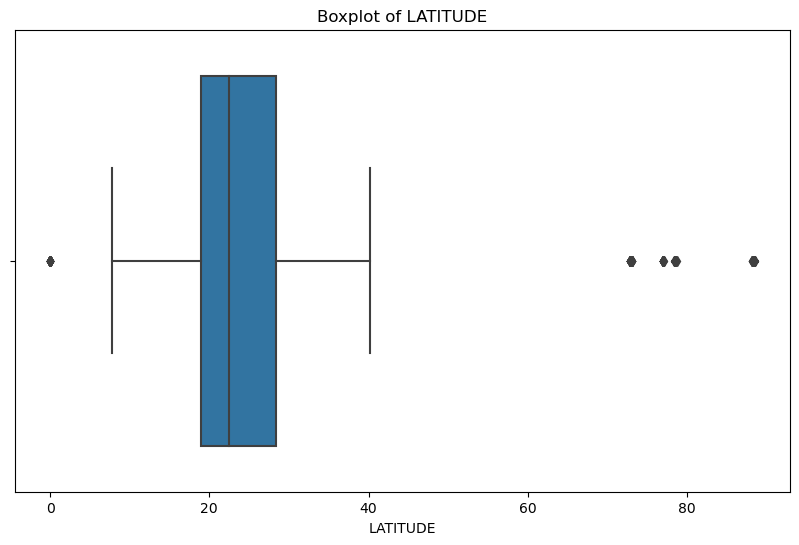

2024-12-17 19:56:09,442 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,443 - INFO - Visualizing outliers for feature: LONGITUDE


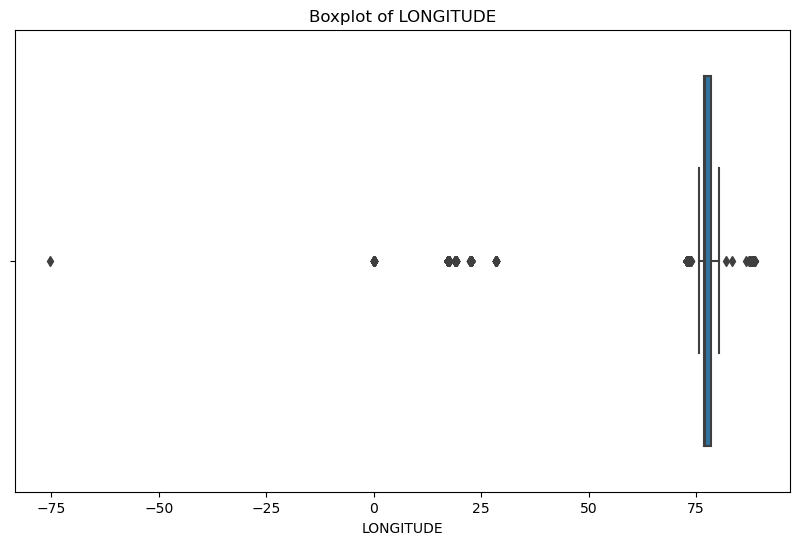

2024-12-17 19:56:09,490 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,490 - INFO - Visualizing outliers for feature: PRICE


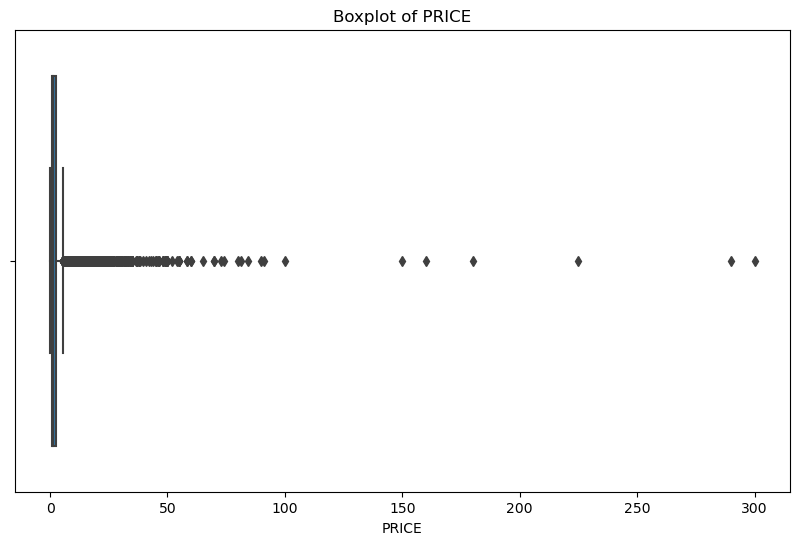

2024-12-17 19:56:09,534 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,534 - INFO - Visualizing outliers for feature: PRICE_PER_SQFT


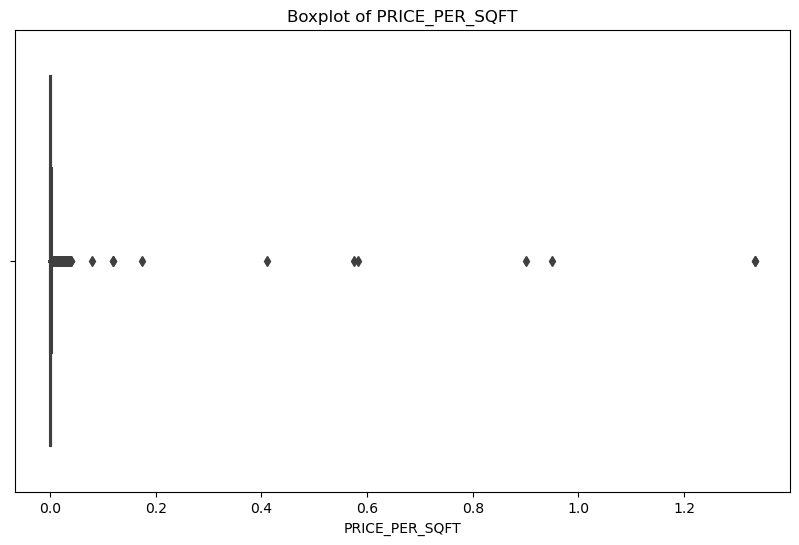

2024-12-17 19:56:09,577 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,578 - INFO - Visualizing outliers for feature: BEDROOM_NUM


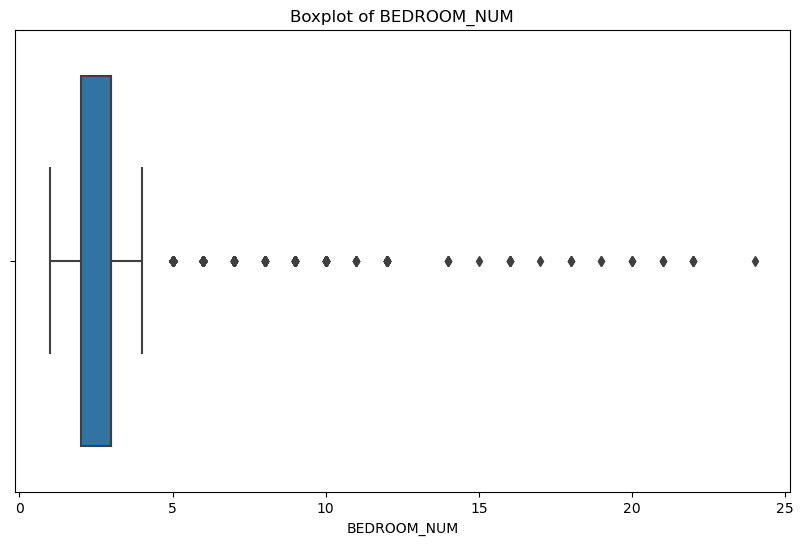

2024-12-17 19:56:09,619 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,619 - INFO - Visualizing outliers for feature: BALCONY_NUM


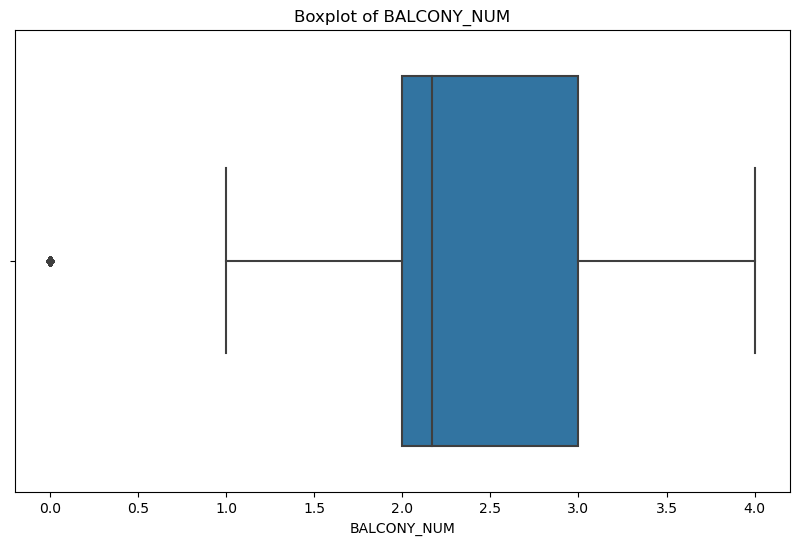

2024-12-17 19:56:09,663 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,663 - INFO - Visualizing outliers for feature: TOTAL_FLOOR


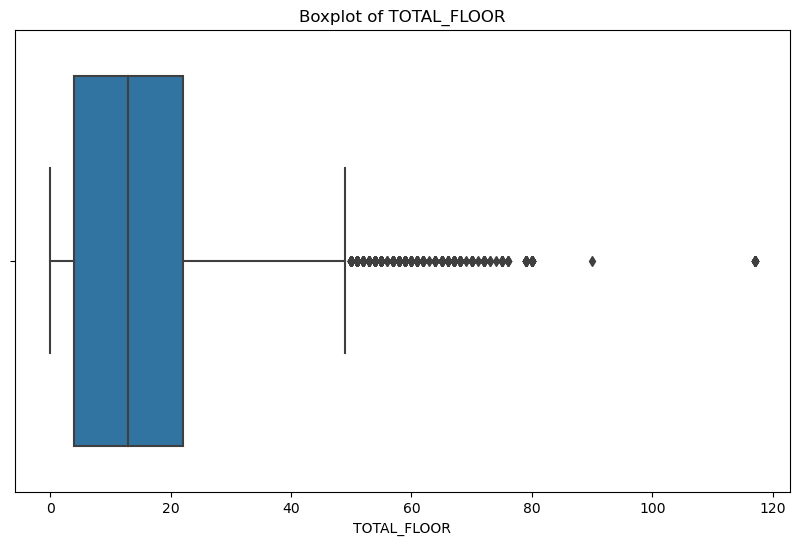

2024-12-17 19:56:09,705 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,705 - INFO - Visualizing outliers for feature: READY TO MOVE


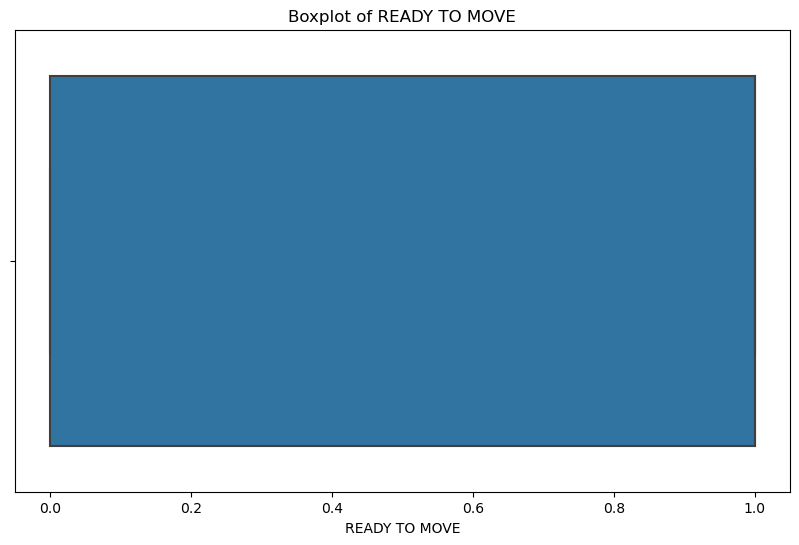

2024-12-17 19:56:09,745 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,746 - INFO - Visualizing outliers for feature: RESALE


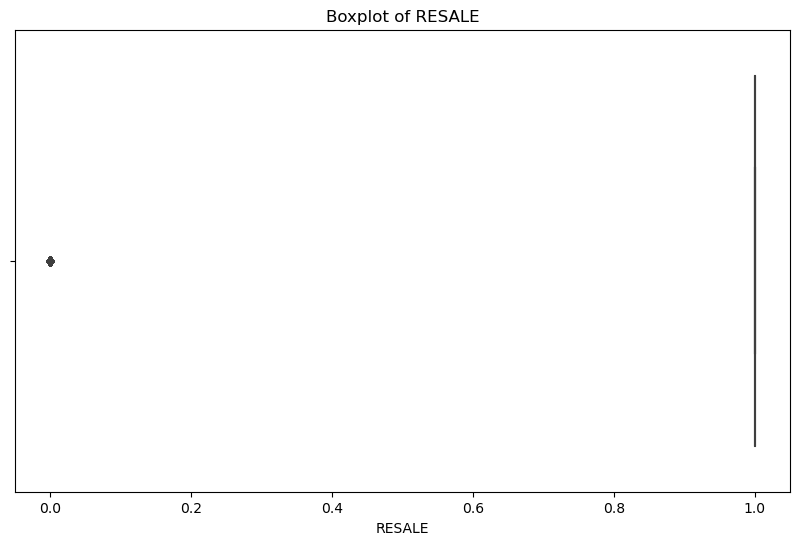

2024-12-17 19:56:09,787 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,787 - INFO - Visualizing outliers for feature: METROSTATION


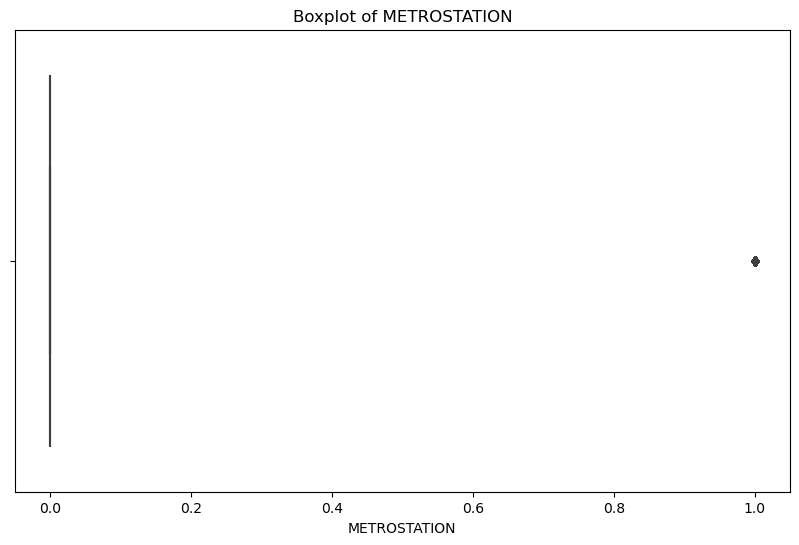

2024-12-17 19:56:09,832 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,832 - INFO - Visualizing outliers for feature: SHOPPING


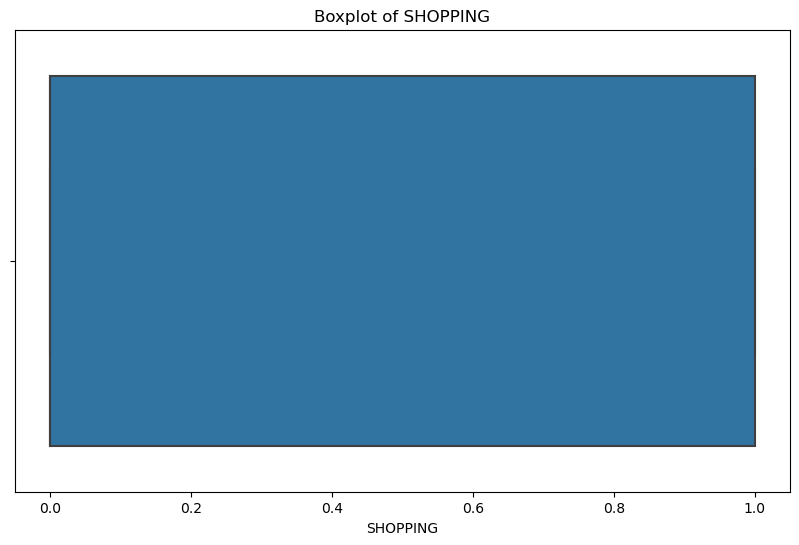

2024-12-17 19:56:09,873 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,873 - INFO - Visualizing outliers for feature: CONNECTIVITY


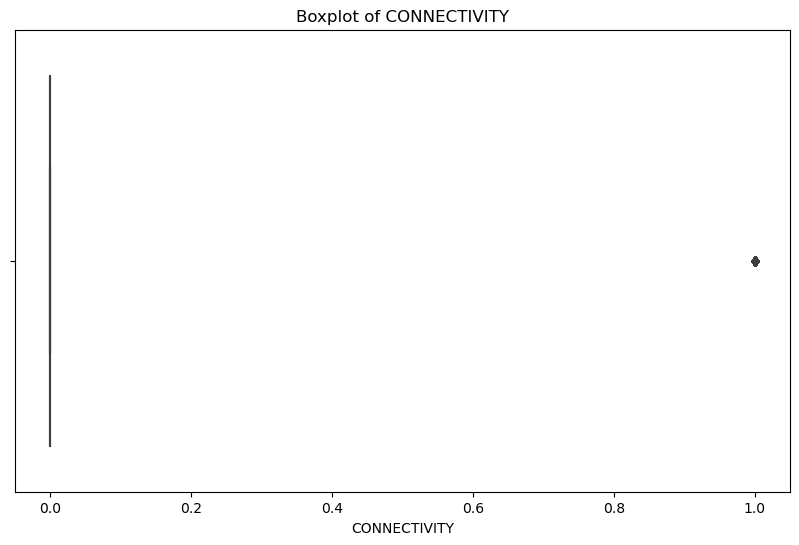

2024-12-17 19:56:09,915 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,916 - INFO - Visualizing outliers for feature: EDUCATION


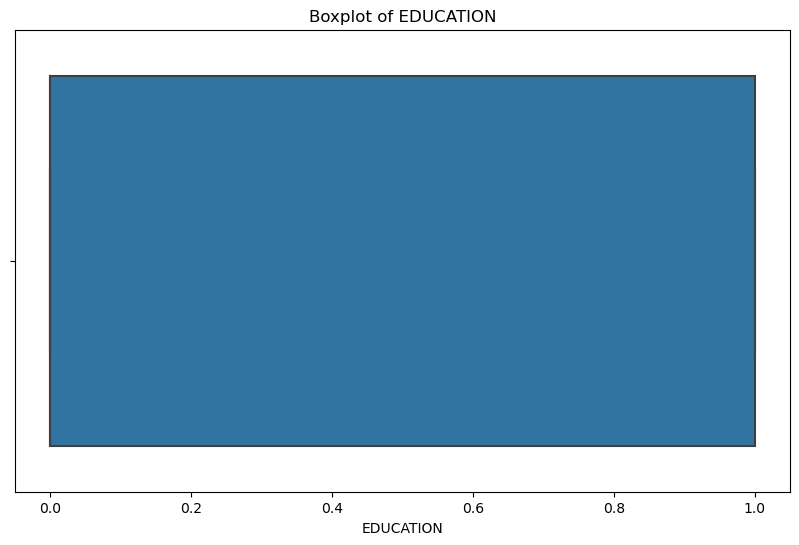

2024-12-17 19:56:09,957 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,957 - INFO - Visualizing outliers for feature: HOSPITAL


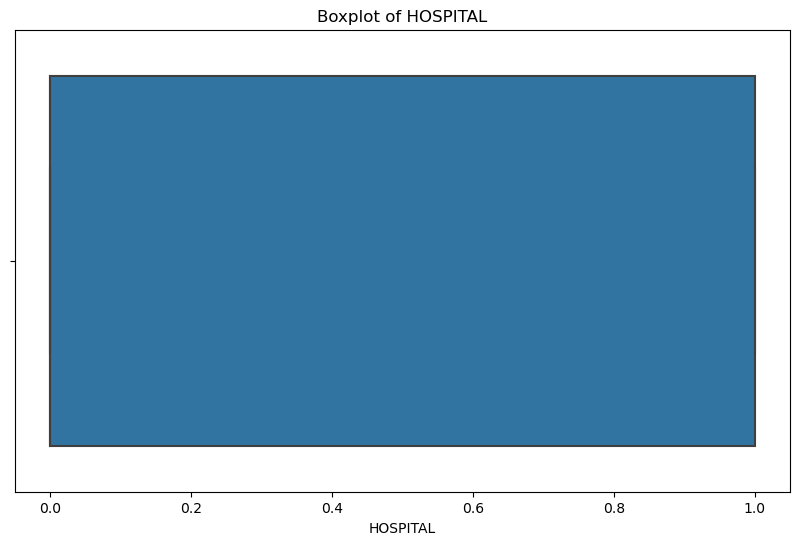

2024-12-17 19:56:09,996 - INFO - Outlier visualization completed.
2024-12-17 19:56:09,997 - INFO - Visualizing outliers for feature: AIRPORT


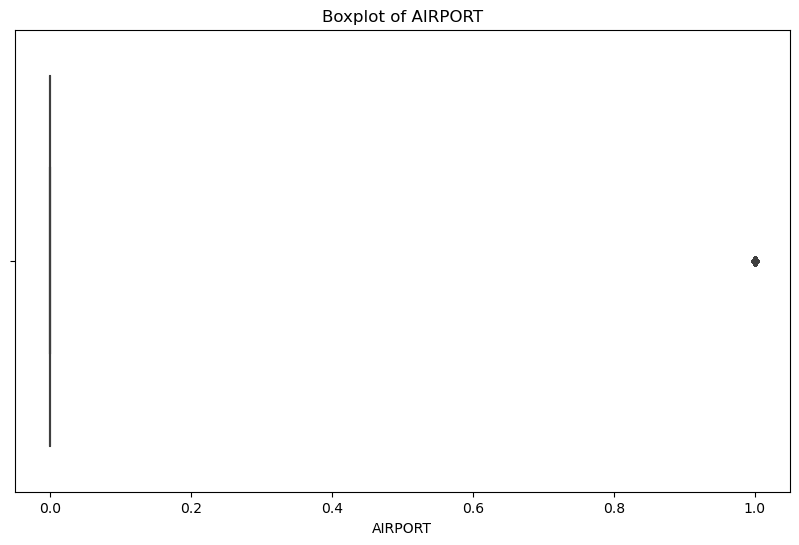

2024-12-17 19:56:10,040 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,040 - INFO - Visualizing outliers for feature: RAILWAYSTATION


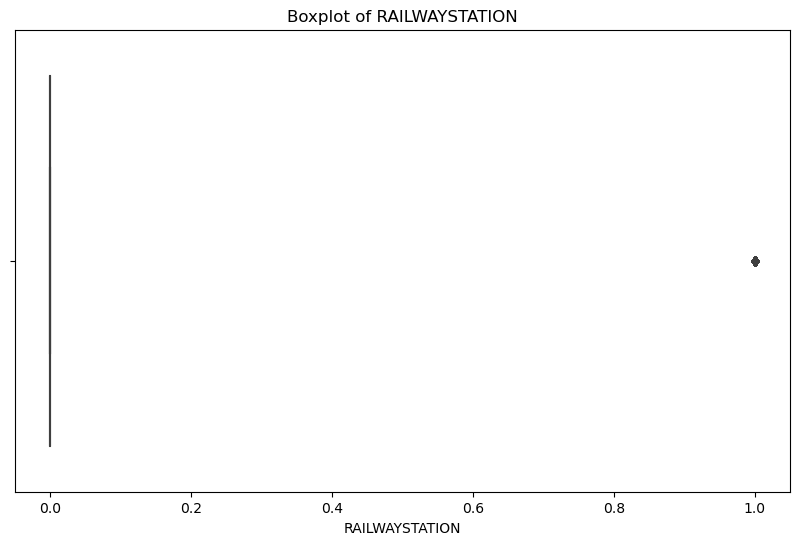

2024-12-17 19:56:10,084 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,084 - INFO - Visualizing outliers for feature: OFFICECOMPLEX


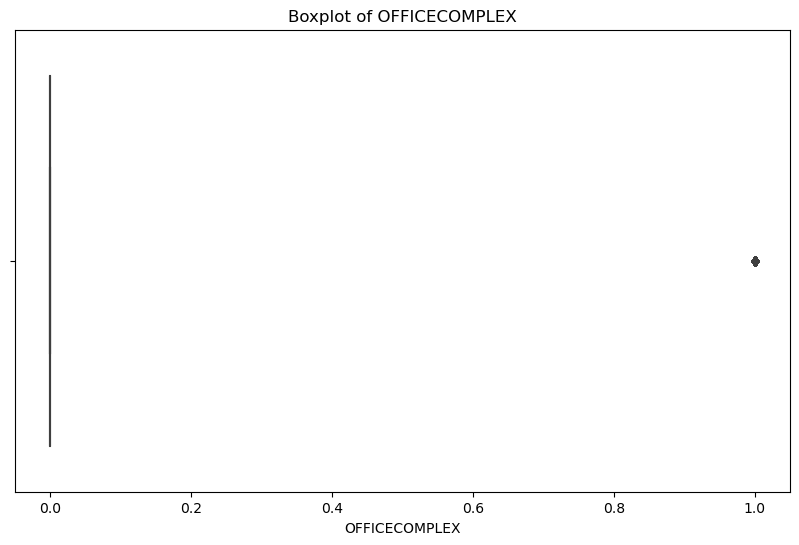

2024-12-17 19:56:10,125 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,126 - INFO - Visualizing outliers for feature: HOTEL


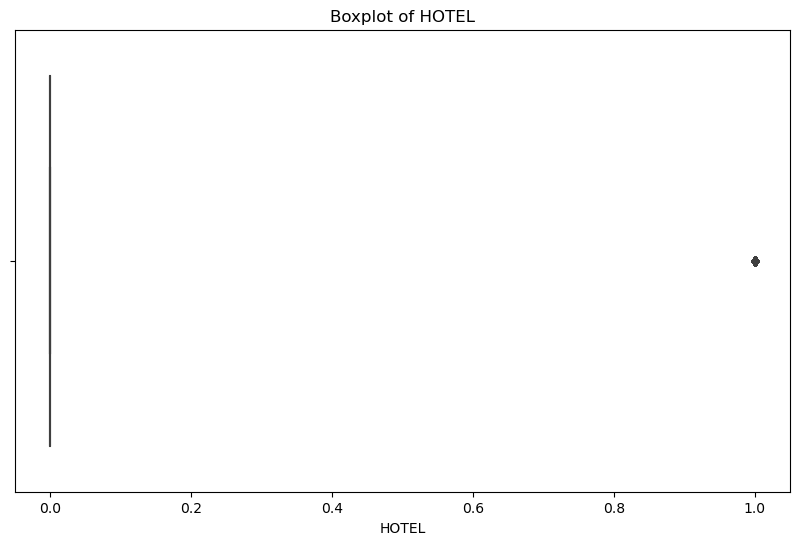

2024-12-17 19:56:10,171 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,171 - INFO - Visualizing outliers for feature: AMUSEMENTPARK


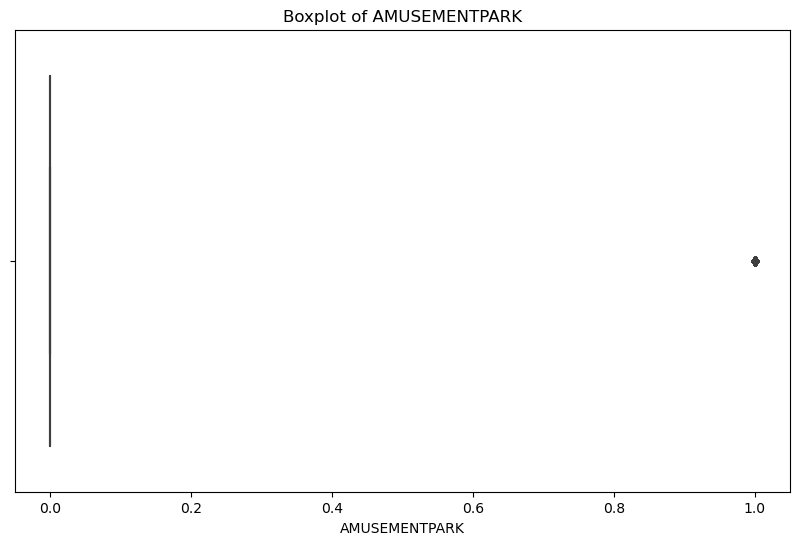

2024-12-17 19:56:10,213 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,213 - INFO - Visualizing outliers for feature: GOLFCOURSE


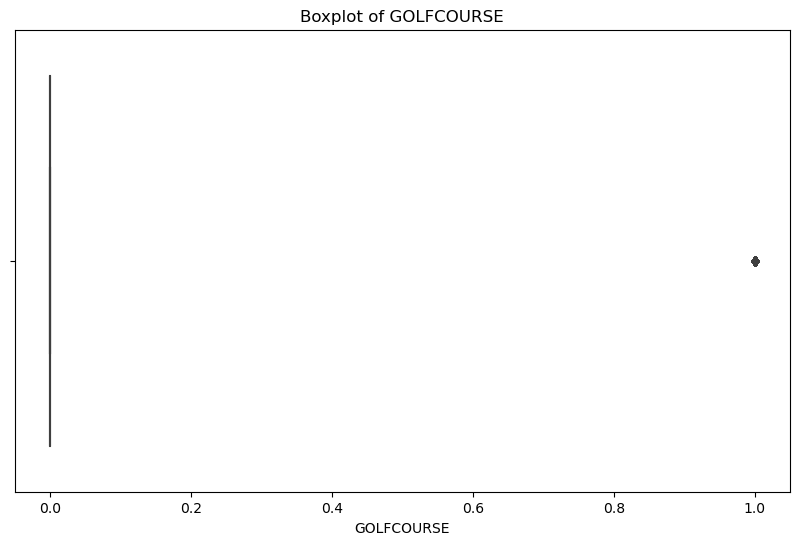

2024-12-17 19:56:10,254 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,254 - INFO - Visualizing outliers for feature: STADIUM


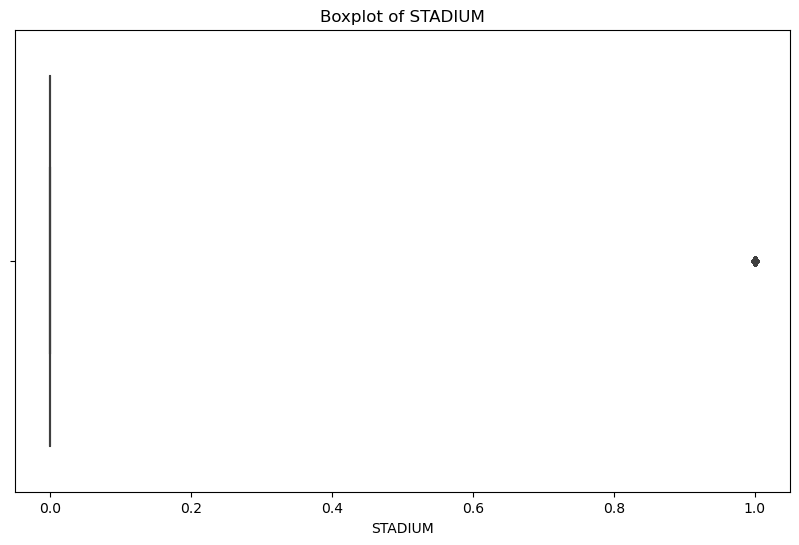

2024-12-17 19:56:10,295 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,296 - INFO - Visualizing outliers for feature: RELIGIOUSPLACE


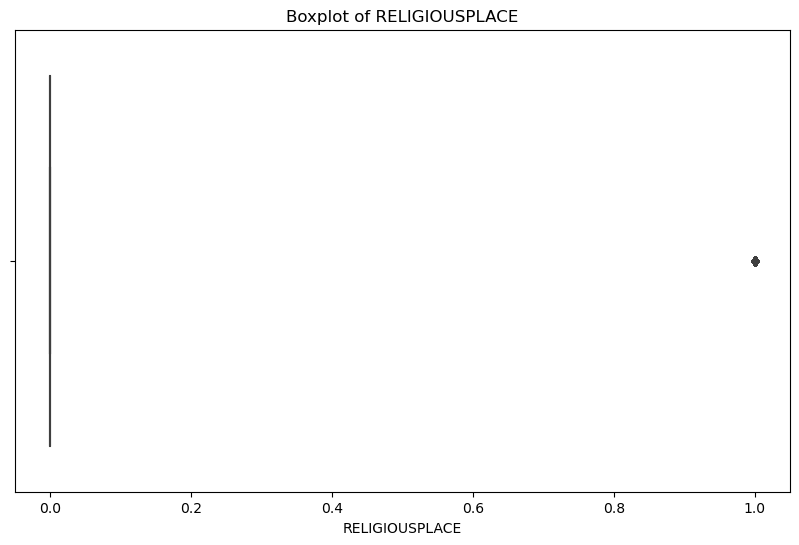

2024-12-17 19:56:10,337 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,338 - INFO - Visualizing outliers for feature: ATM


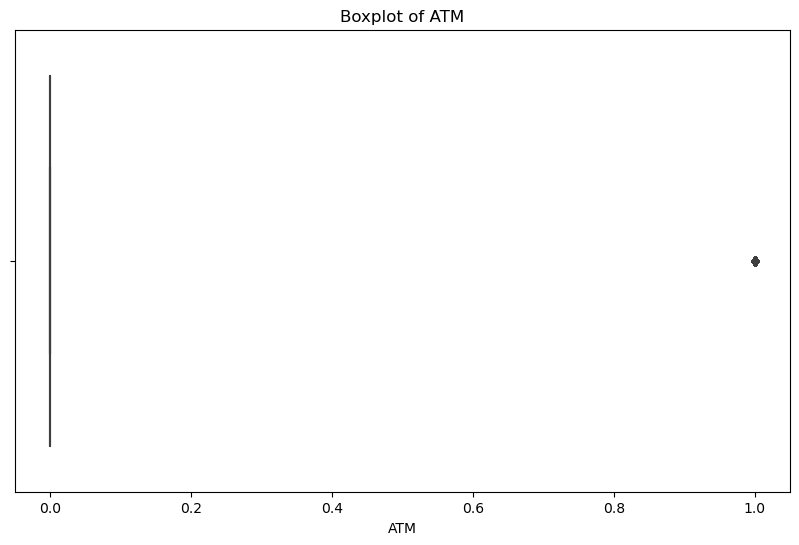

2024-12-17 19:56:10,380 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,380 - INFO - Visualizing outliers for feature: PARKING


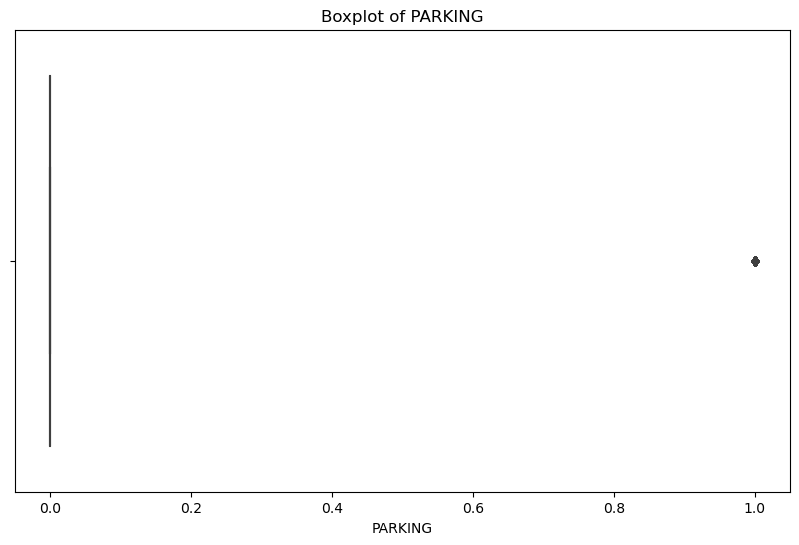

2024-12-17 19:56:10,420 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,420 - INFO - Visualizing outliers for feature: BUSDEPOT


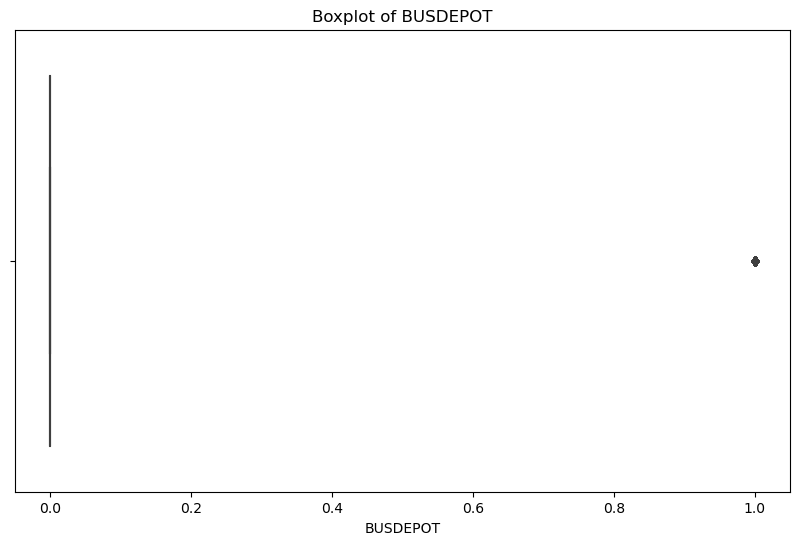

2024-12-17 19:56:10,459 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,460 - INFO - Visualizing outliers for feature: MISCELLANEOUS


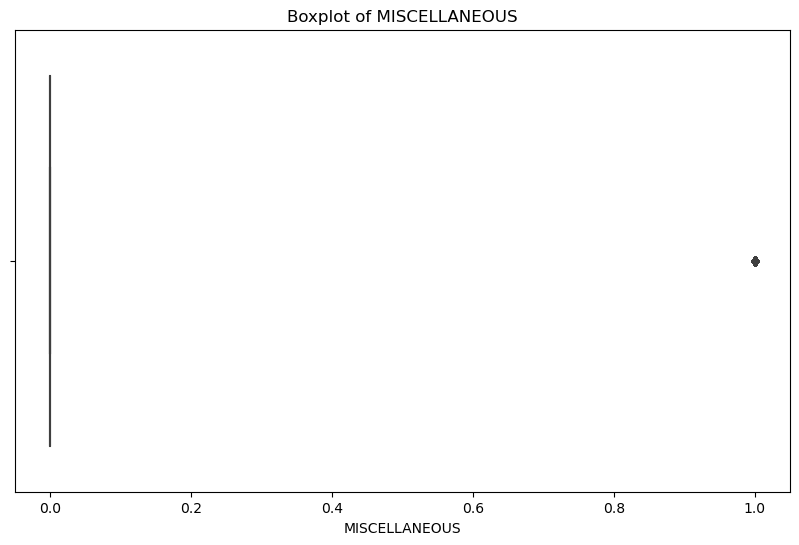

2024-12-17 19:56:10,503 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,504 - INFO - Visualizing outliers for feature: TOTAL_LANDMARK_COUNT


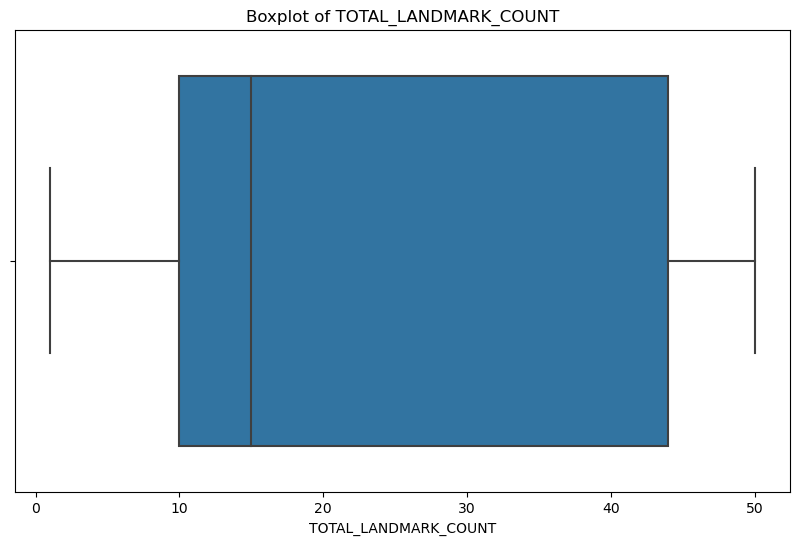

2024-12-17 19:56:10,543 - INFO - Outlier visualization completed.
2024-12-17 19:56:10,543 - INFO - Executing univariate outlier detection strategy.
2024-12-17 19:56:10,544 - INFO - Detecting outliers using the Z-score method for FACING.
2024-12-17 19:56:10,546 - INFO - Outliers detected with Z-score threshold: 3 for FACING.
2024-12-17 19:56:10,546 - INFO - Total outliers detected before handling: 0
2024-12-17 19:56:10,547 - INFO - Handling outliers using the Z-score method.
2024-12-17 19:56:10,549 - INFO - Executing univariate outlier detection strategy.
2024-12-17 19:56:10,549 - INFO - Detecting outliers using the Z-score method for TRANSACT_TYPE.
2024-12-17 19:56:10,551 - INFO - Outliers detected with Z-score threshold: 3 for TRANSACT_TYPE.
2024-12-17 19:56:10,551 - INFO - Total outliers detected before handling: 0
2024-12-17 19:56:10,551 - INFO - Handling outliers using the Z-score method.
2024-12-17 19:56:10,560 - INFO - Executing univariate outlier detection strategy.
2024-12-17 1

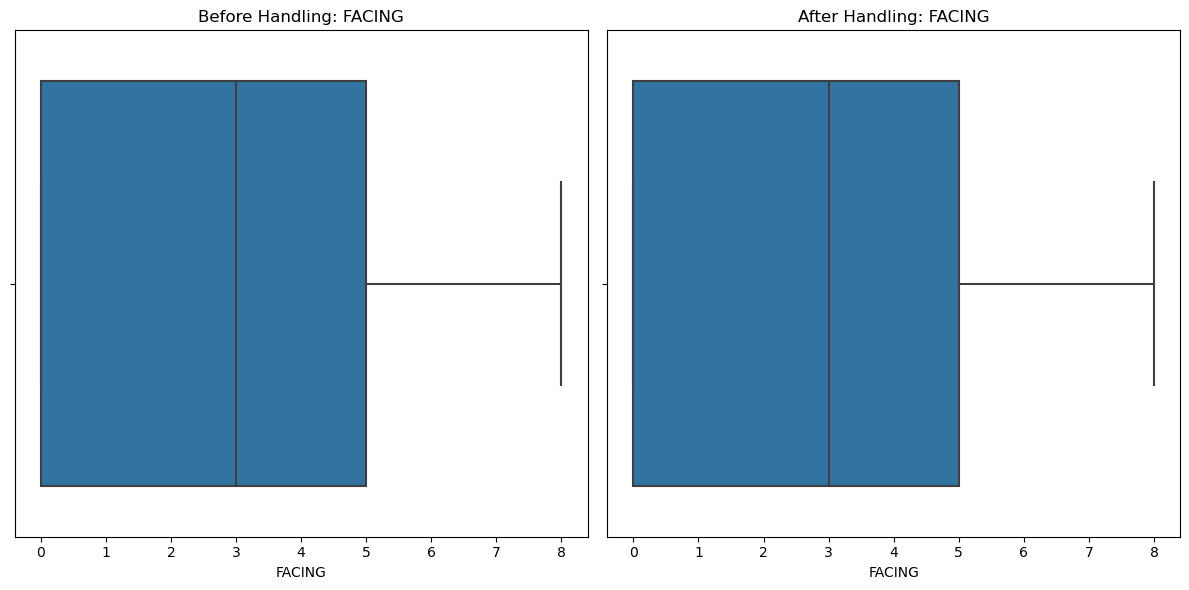

2024-12-17 19:56:10,791 - INFO - Before and after visualization completed.
2024-12-17 19:56:10,792 - INFO - Visualizing before and after outlier handling.


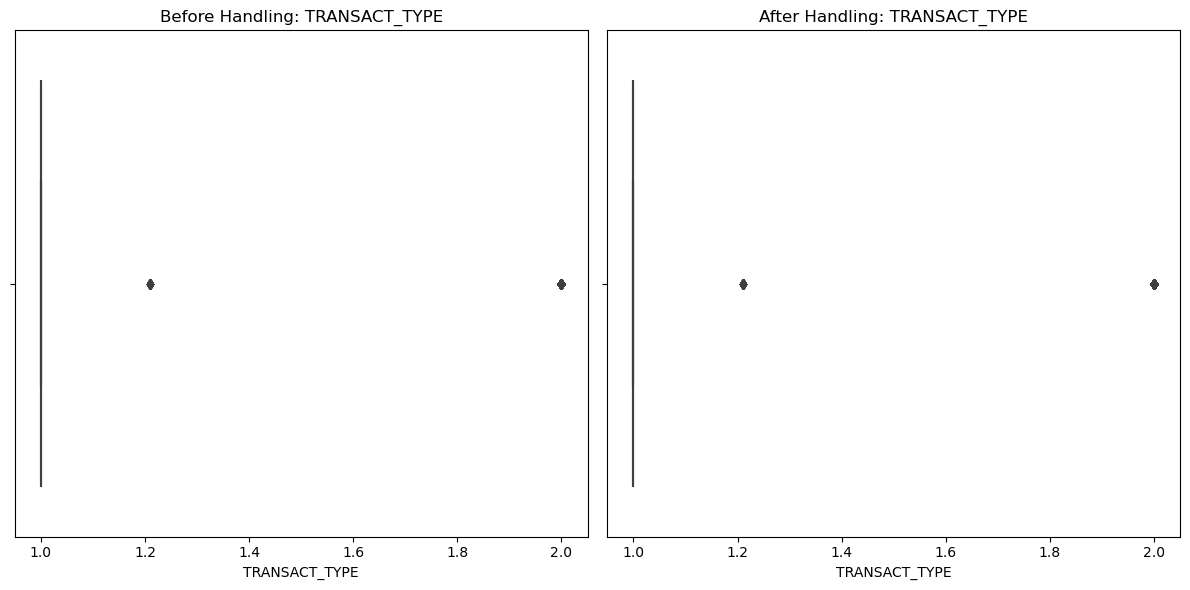

2024-12-17 19:56:10,880 - INFO - Before and after visualization completed.
2024-12-17 19:56:10,880 - INFO - Visualizing before and after outlier handling.


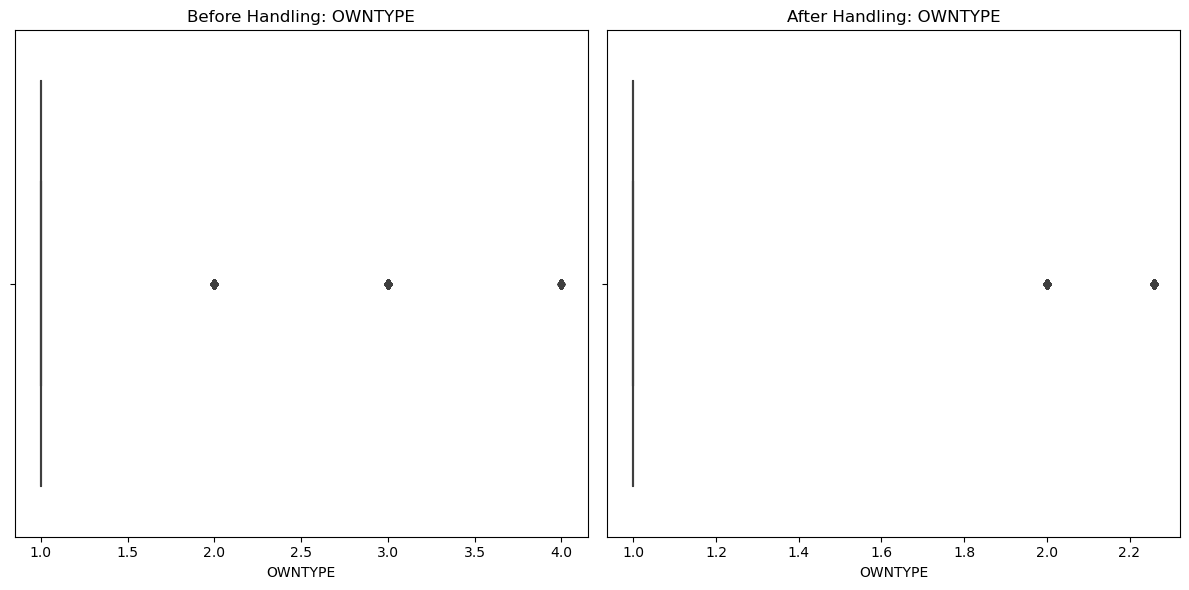

2024-12-17 19:56:10,965 - INFO - Before and after visualization completed.
2024-12-17 19:56:10,966 - INFO - Visualizing before and after outlier handling.


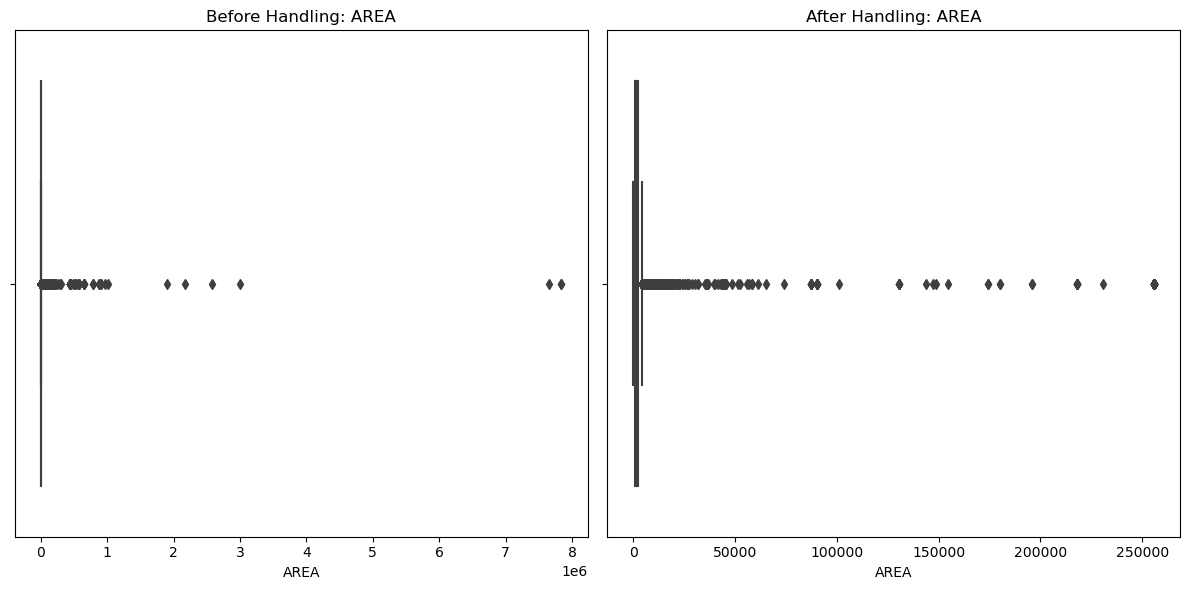

2024-12-17 19:56:11,050 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,050 - INFO - Visualizing before and after outlier handling.


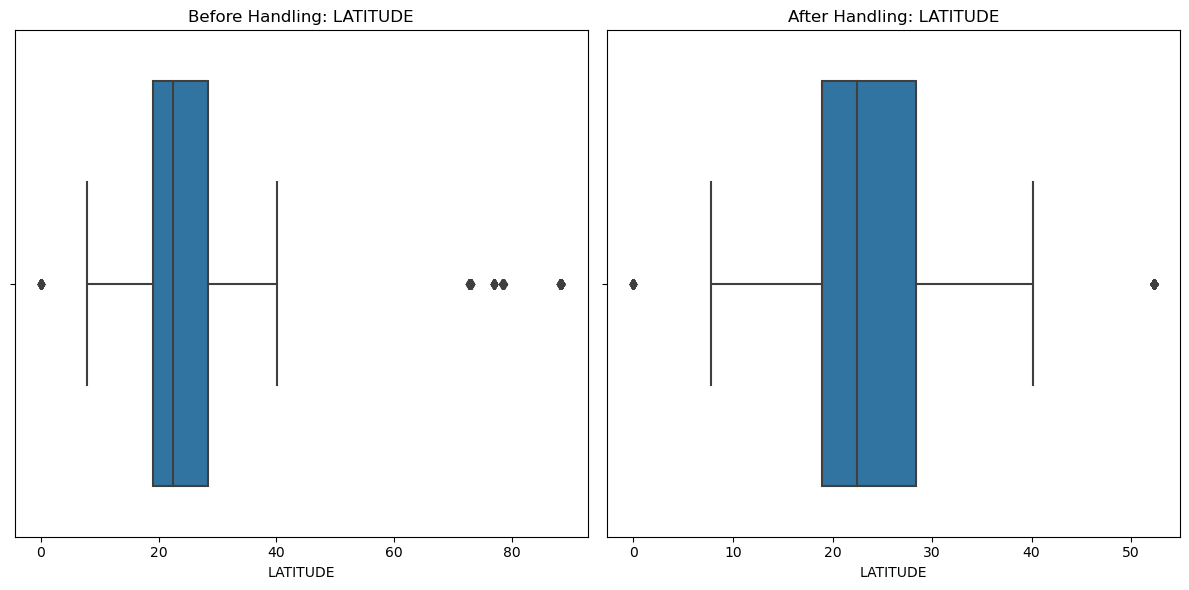

2024-12-17 19:56:11,125 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,125 - INFO - Visualizing before and after outlier handling.


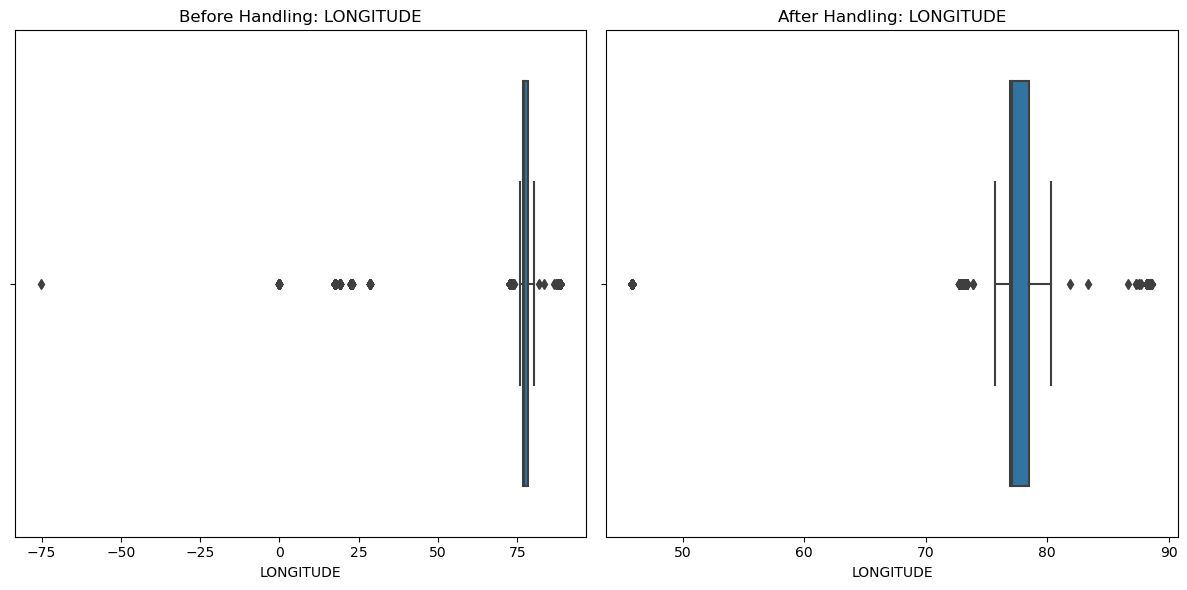

2024-12-17 19:56:11,216 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,216 - INFO - Visualizing before and after outlier handling.


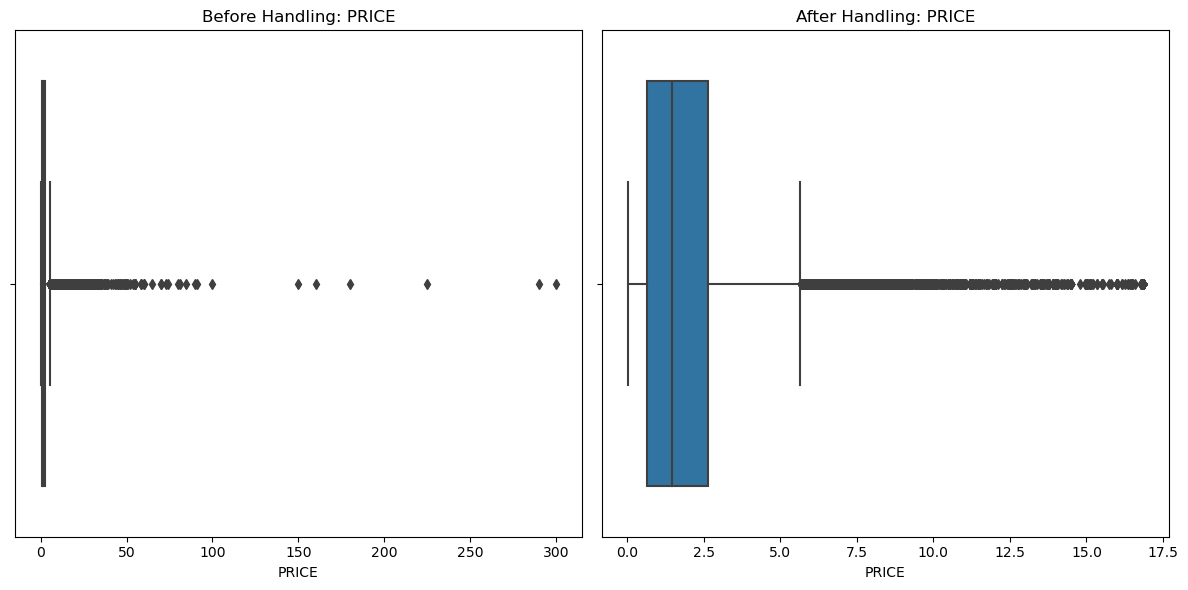

2024-12-17 19:56:11,298 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,298 - INFO - Visualizing before and after outlier handling.


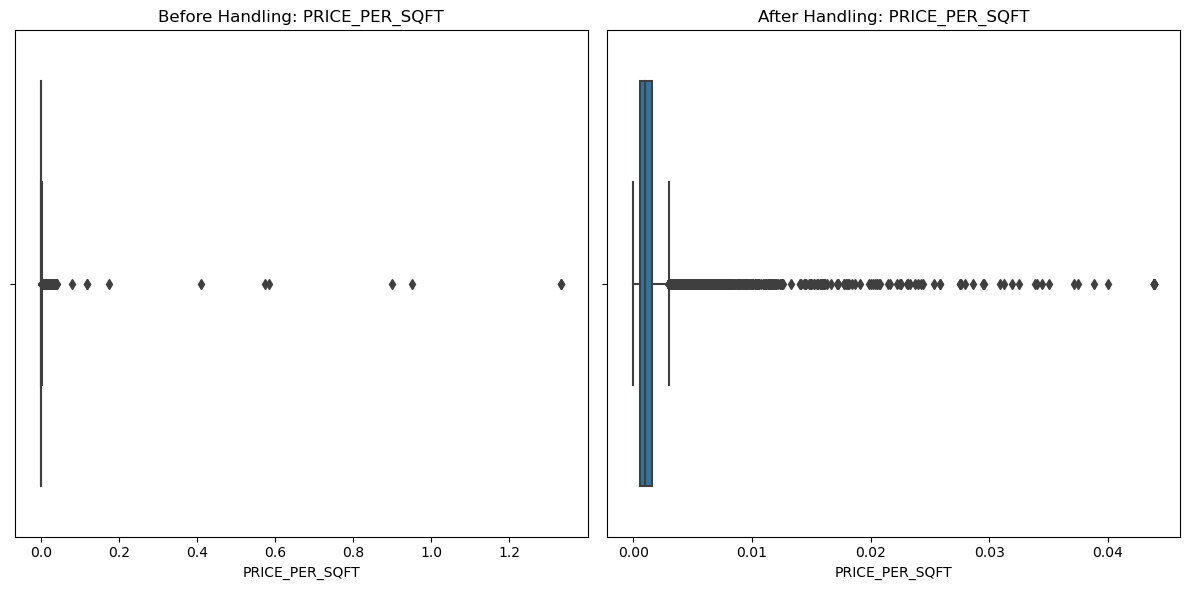

2024-12-17 19:56:11,379 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,380 - INFO - Visualizing before and after outlier handling.


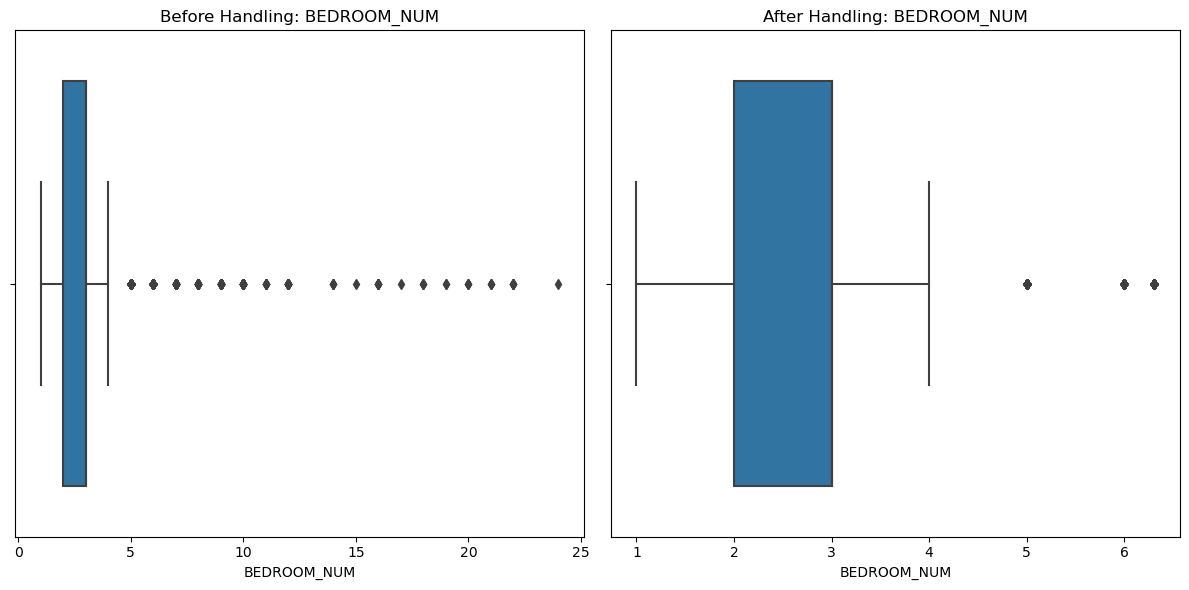

2024-12-17 19:56:11,459 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,459 - INFO - Visualizing before and after outlier handling.


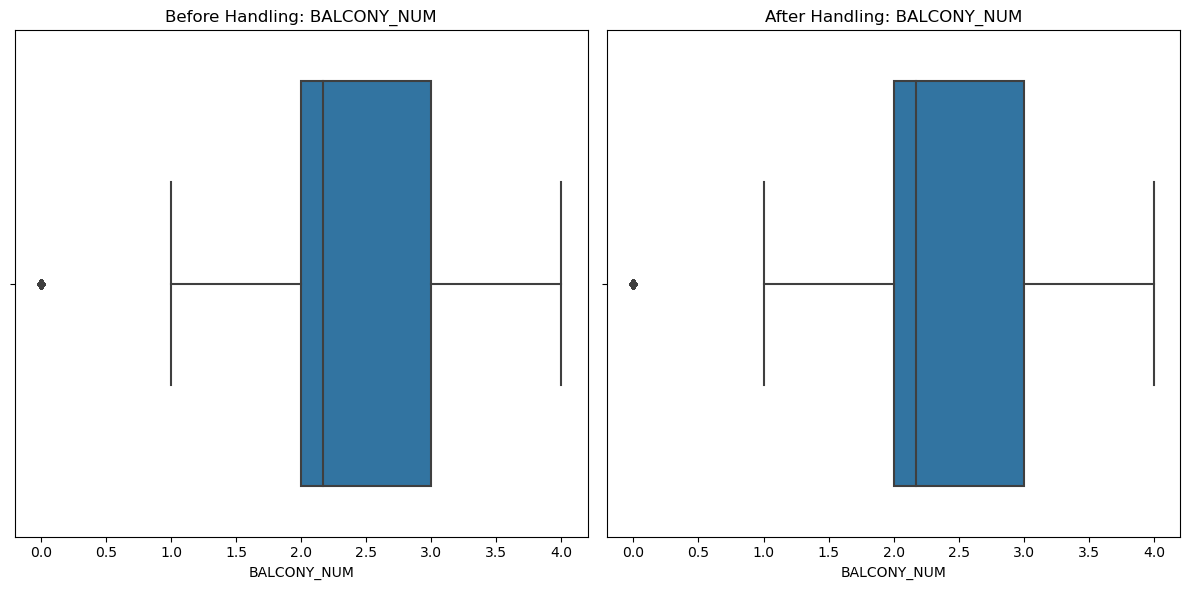

2024-12-17 19:56:11,611 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,611 - INFO - Visualizing before and after outlier handling.


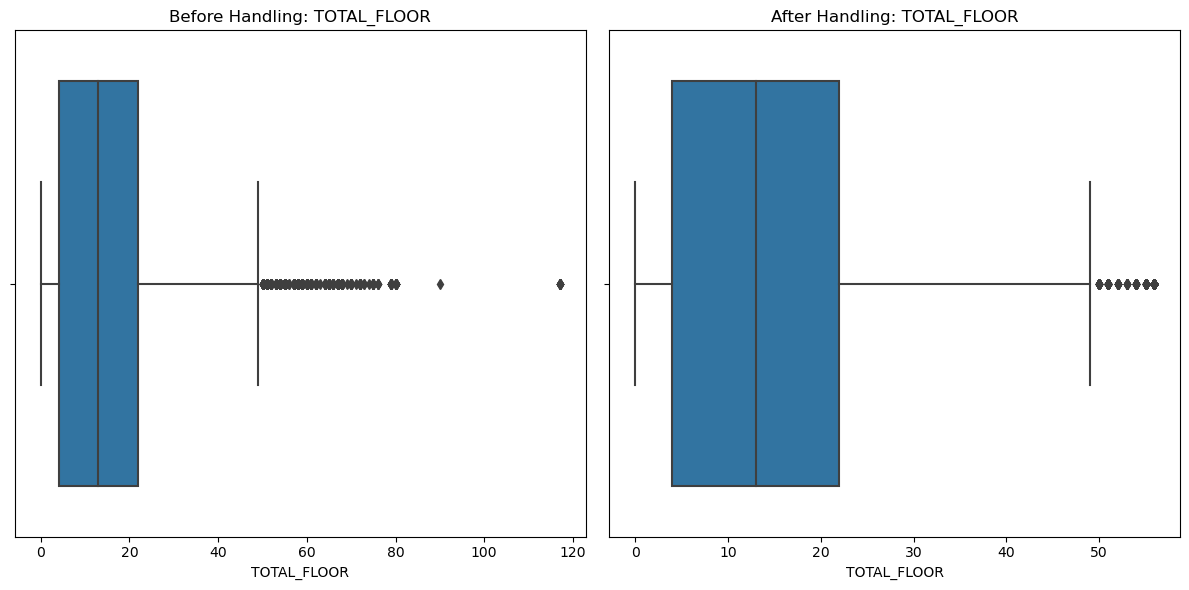

2024-12-17 19:56:11,691 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,691 - INFO - Visualizing before and after outlier handling.


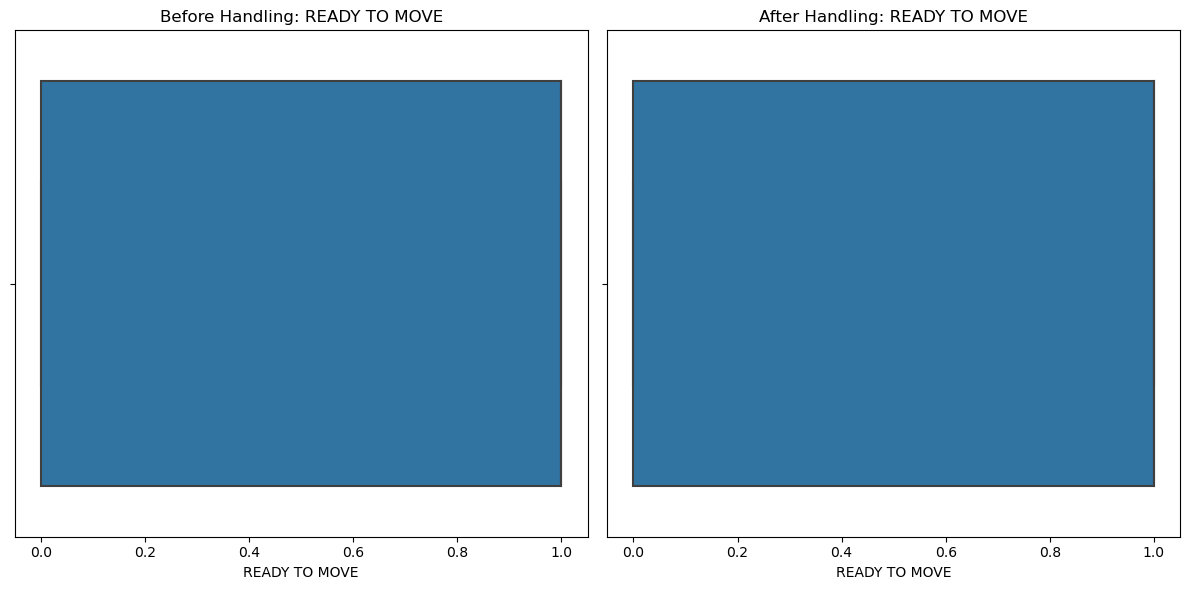

2024-12-17 19:56:11,767 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,768 - INFO - Visualizing before and after outlier handling.


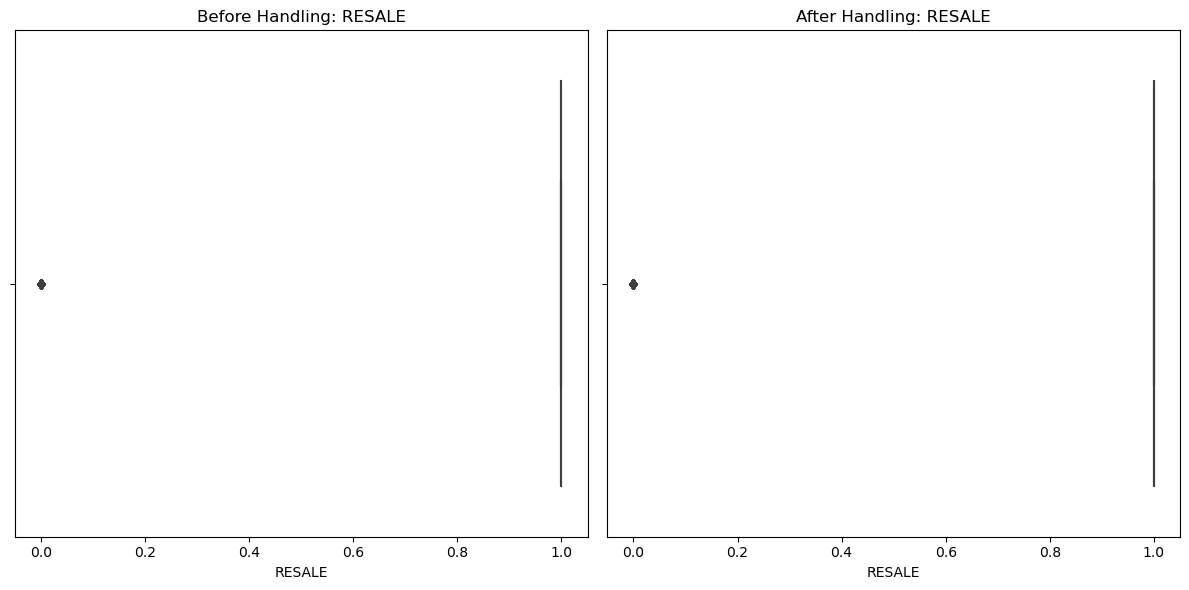

2024-12-17 19:56:11,850 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,851 - INFO - Visualizing before and after outlier handling.


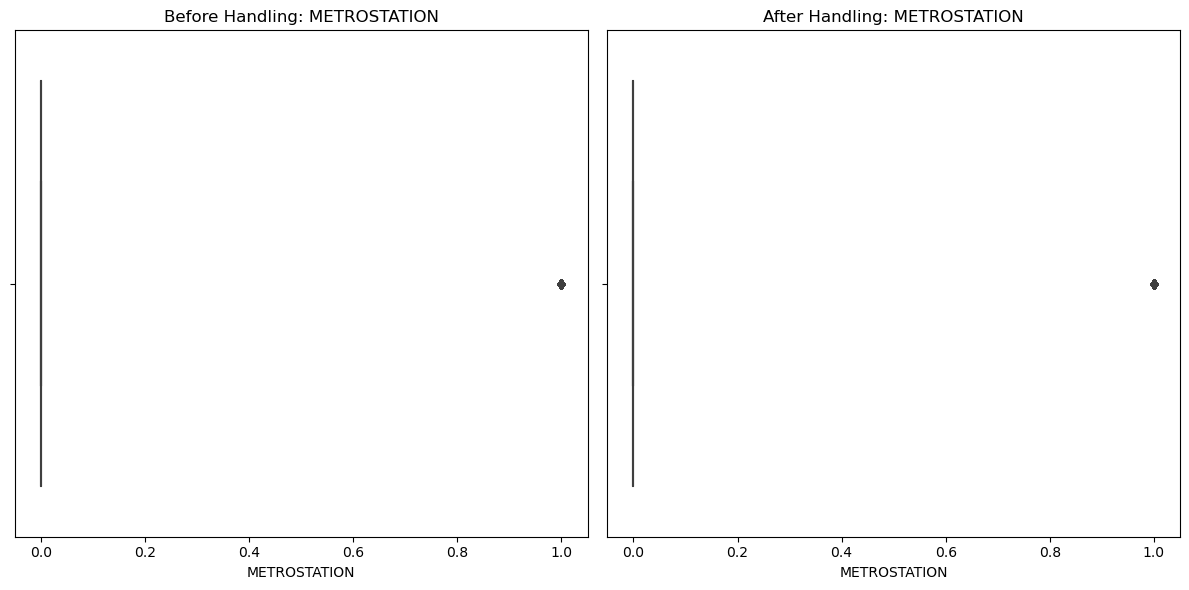

2024-12-17 19:56:11,935 - INFO - Before and after visualization completed.
2024-12-17 19:56:11,936 - INFO - Visualizing before and after outlier handling.


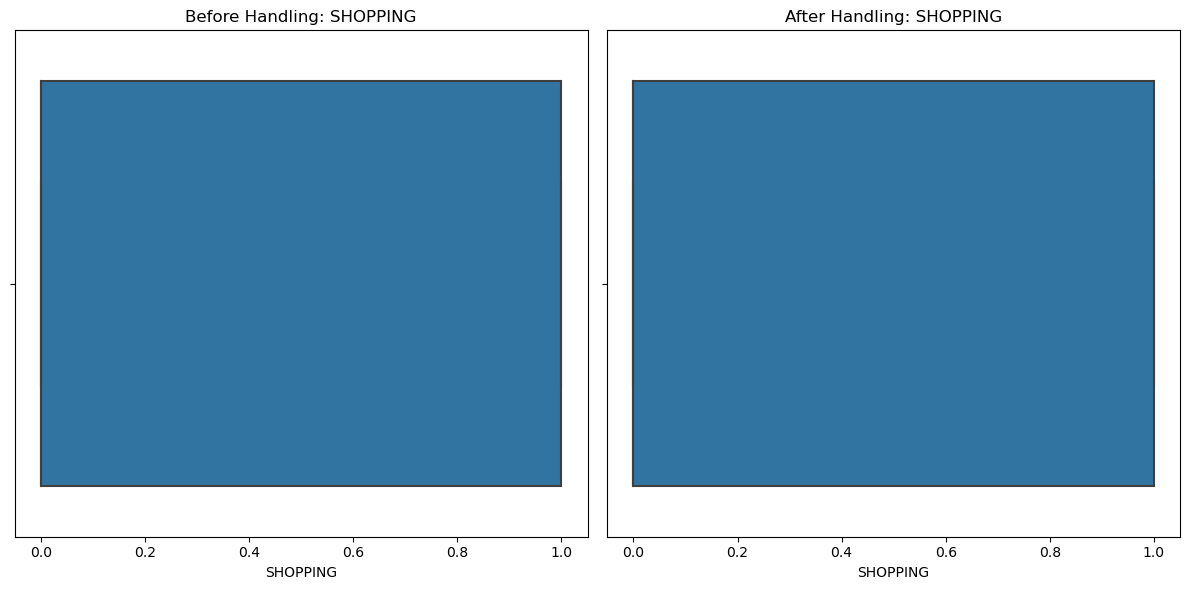

2024-12-17 19:56:12,011 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,011 - INFO - Visualizing before and after outlier handling.


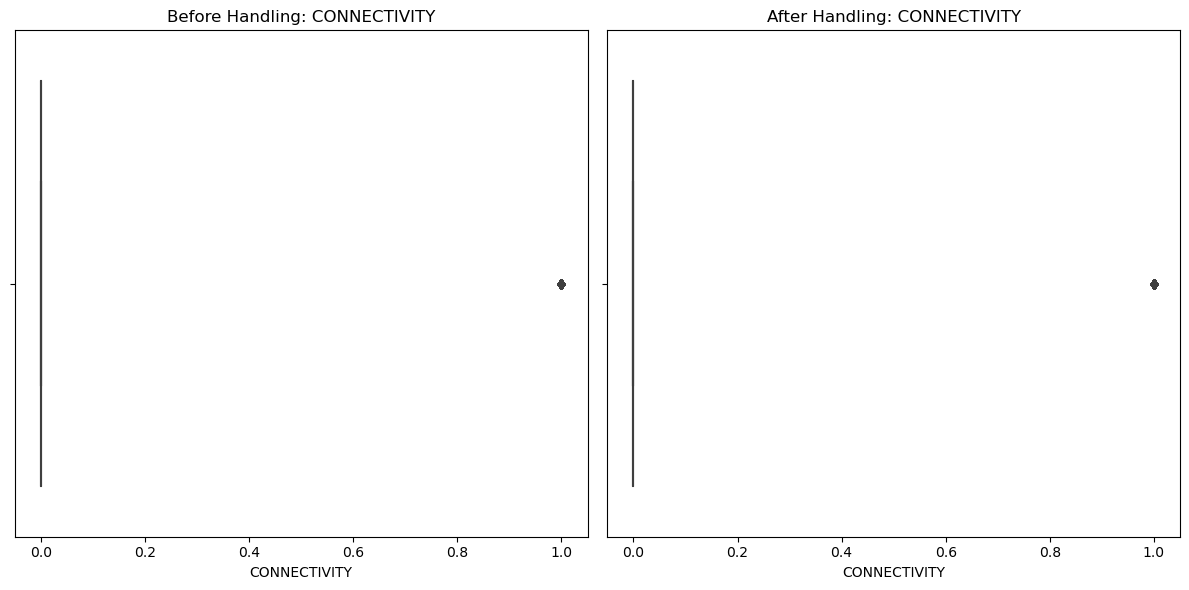

2024-12-17 19:56:12,095 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,096 - INFO - Visualizing before and after outlier handling.


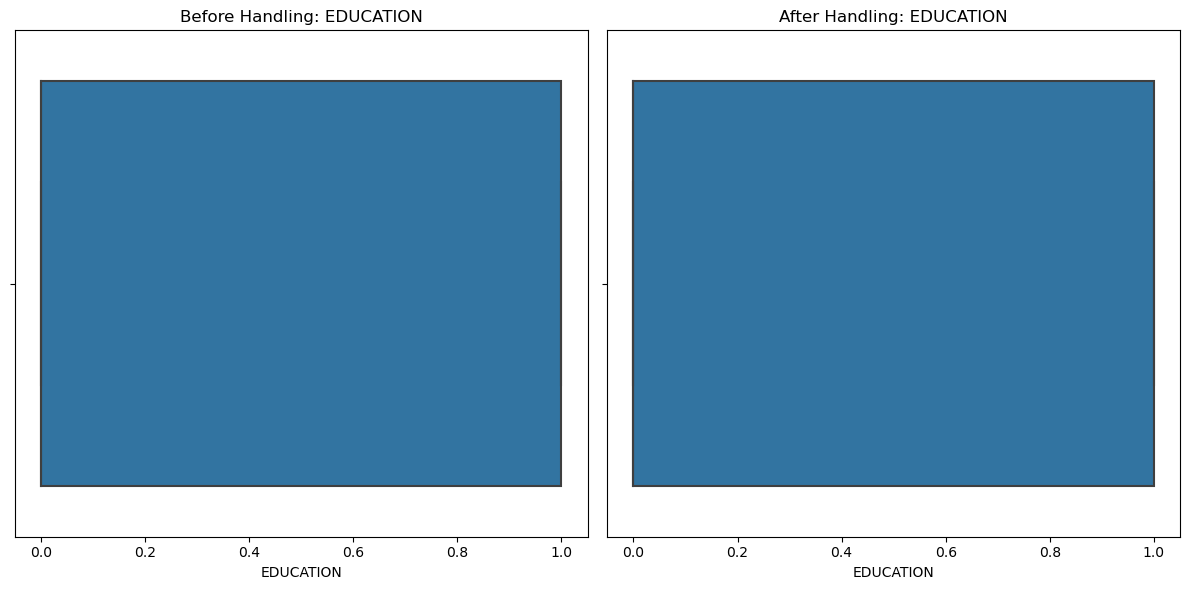

2024-12-17 19:56:12,172 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,172 - INFO - Visualizing before and after outlier handling.


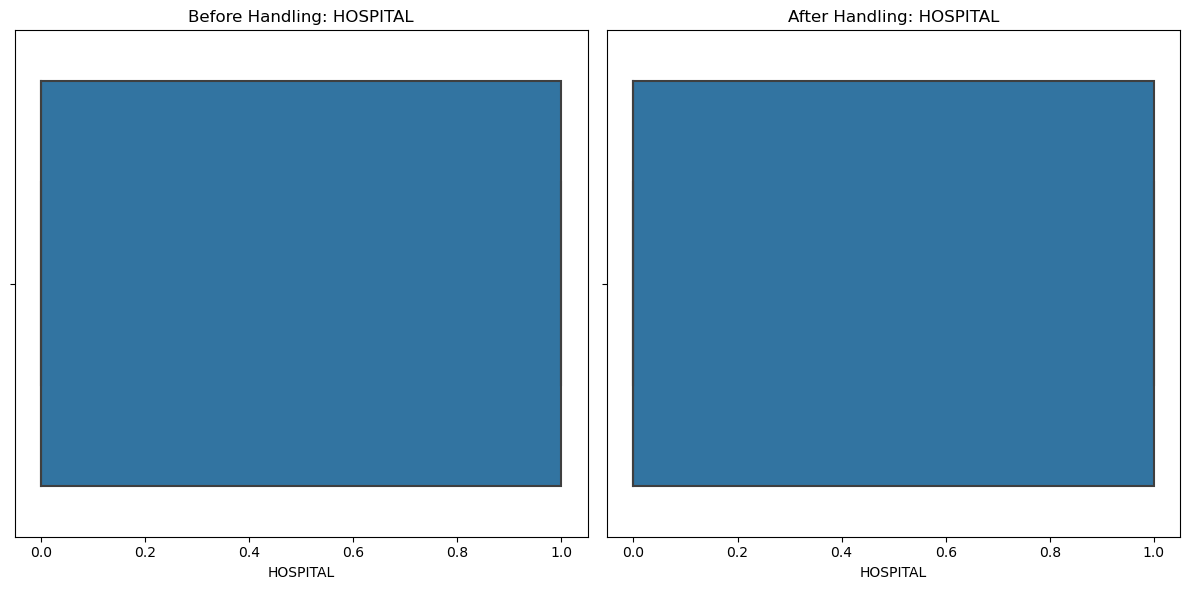

2024-12-17 19:56:12,249 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,250 - INFO - Visualizing before and after outlier handling.


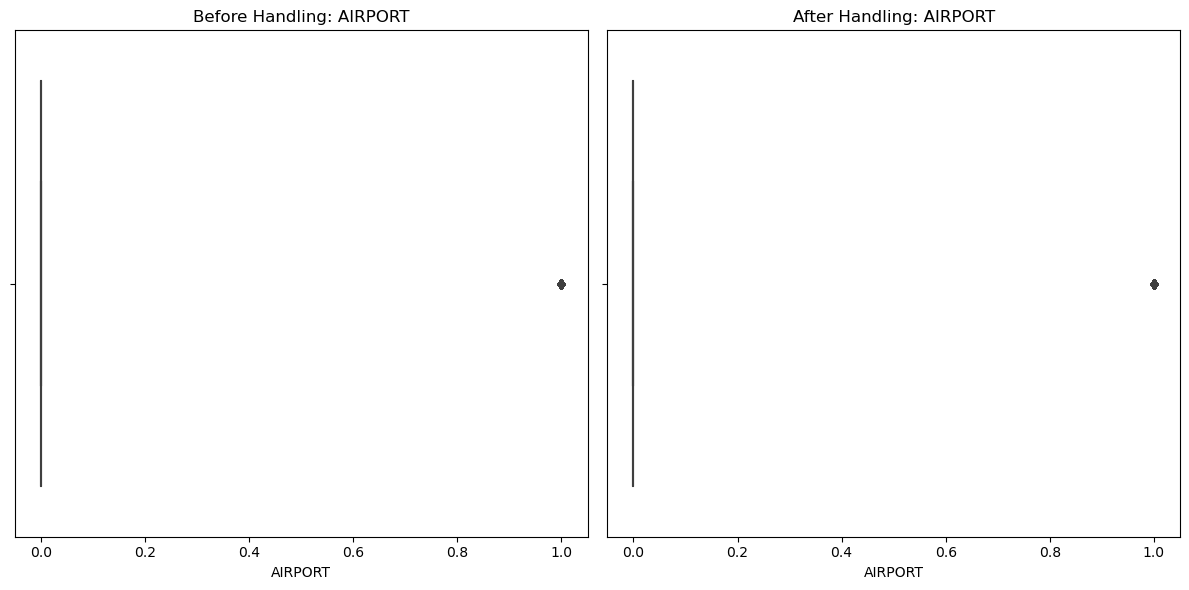

2024-12-17 19:56:12,333 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,334 - INFO - Visualizing before and after outlier handling.


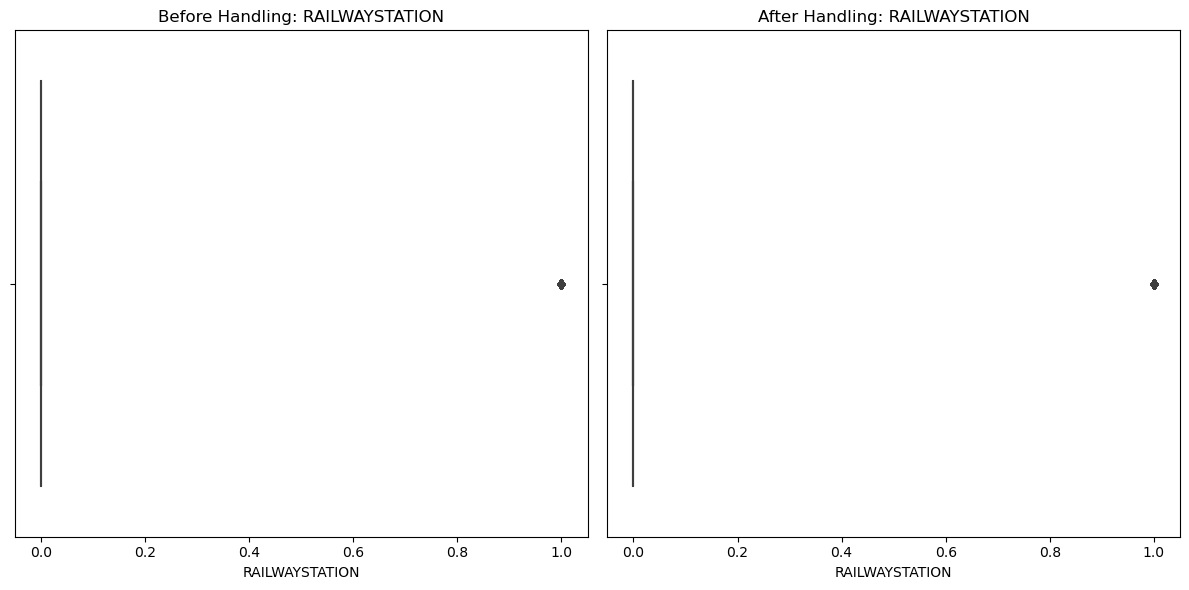

2024-12-17 19:56:12,413 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,414 - INFO - Visualizing before and after outlier handling.


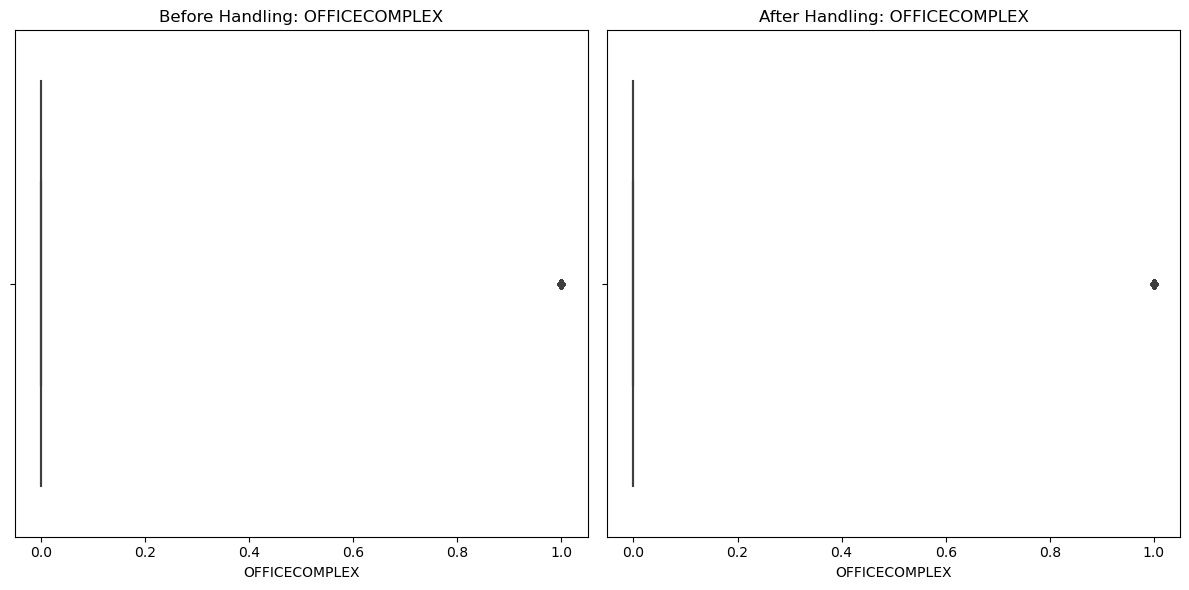

2024-12-17 19:56:12,498 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,498 - INFO - Visualizing before and after outlier handling.


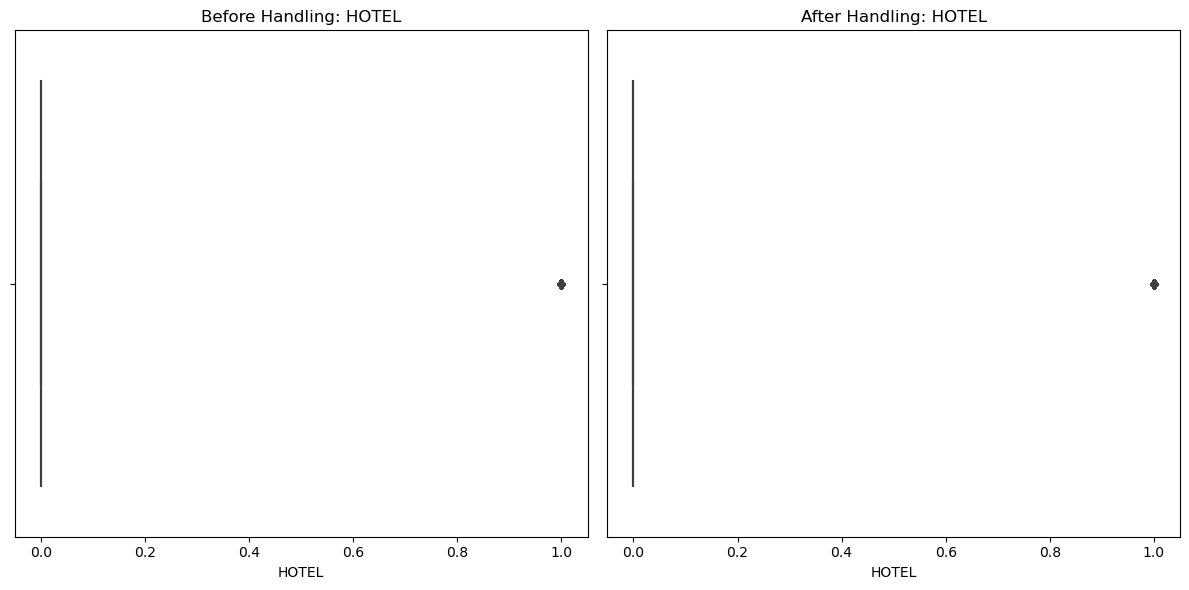

2024-12-17 19:56:12,576 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,577 - INFO - Visualizing before and after outlier handling.


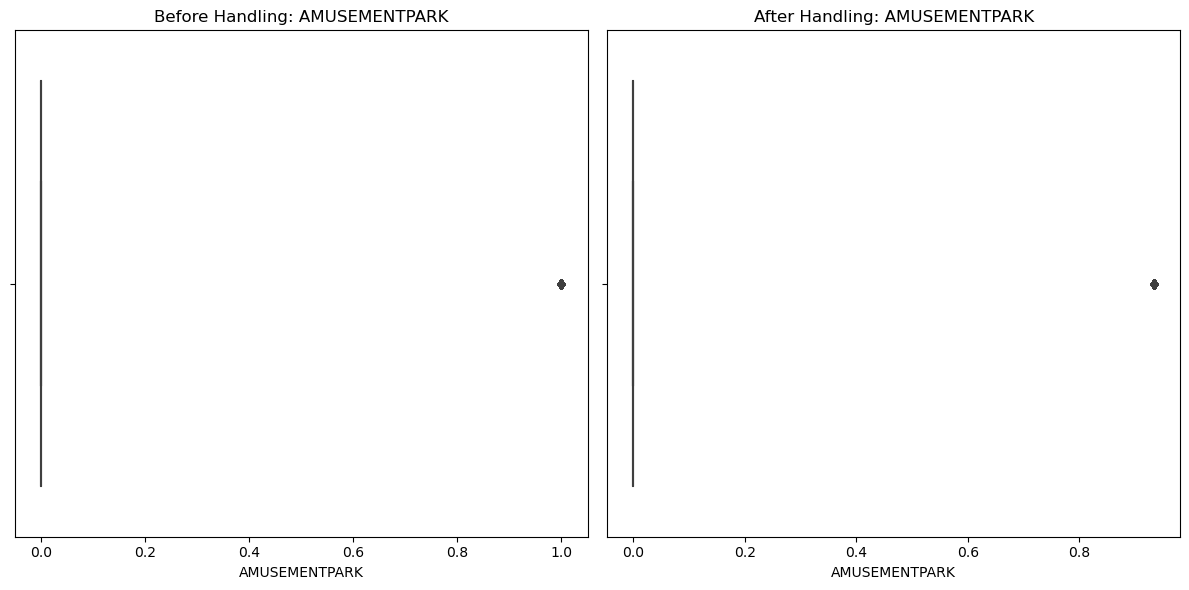

2024-12-17 19:56:12,658 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,658 - INFO - Visualizing before and after outlier handling.


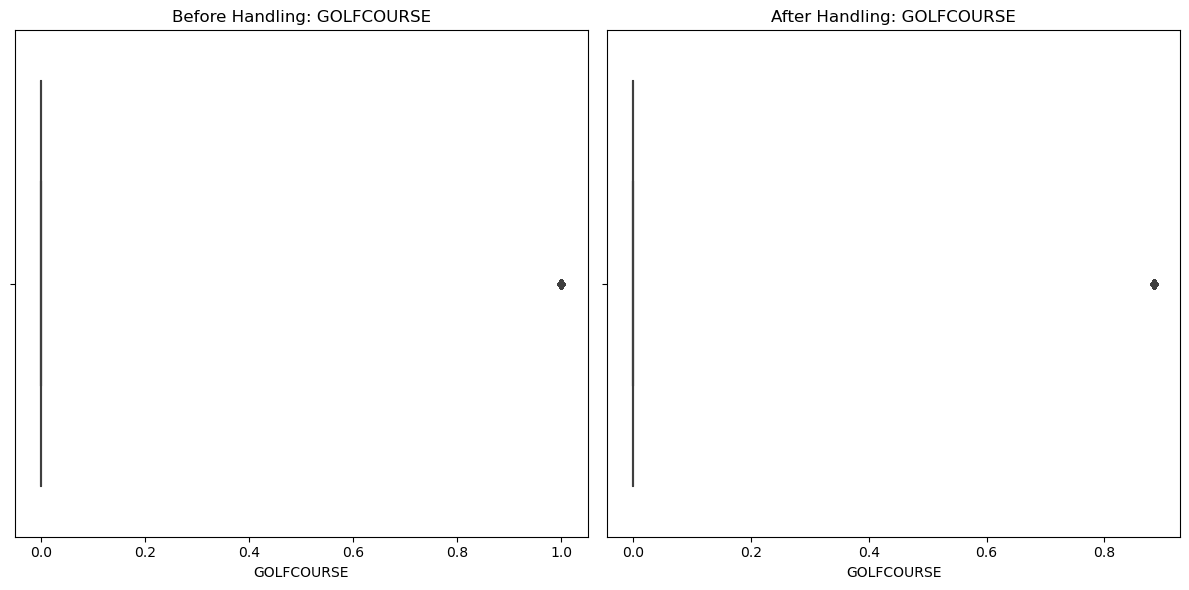

2024-12-17 19:56:12,739 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,739 - INFO - Visualizing before and after outlier handling.


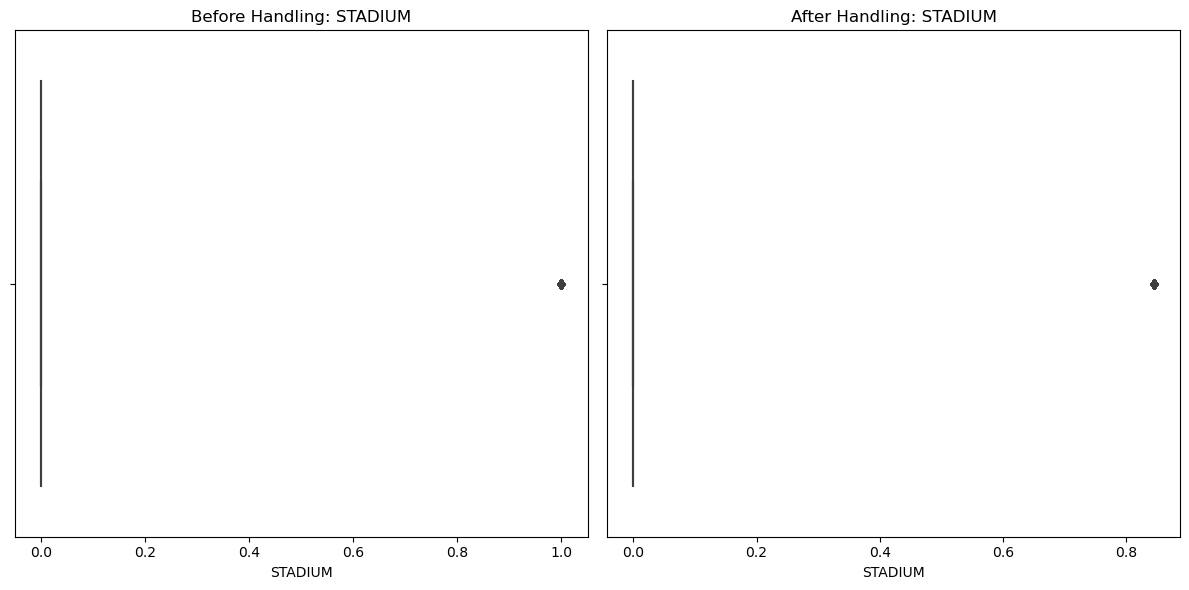

2024-12-17 19:56:12,880 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,881 - INFO - Visualizing before and after outlier handling.


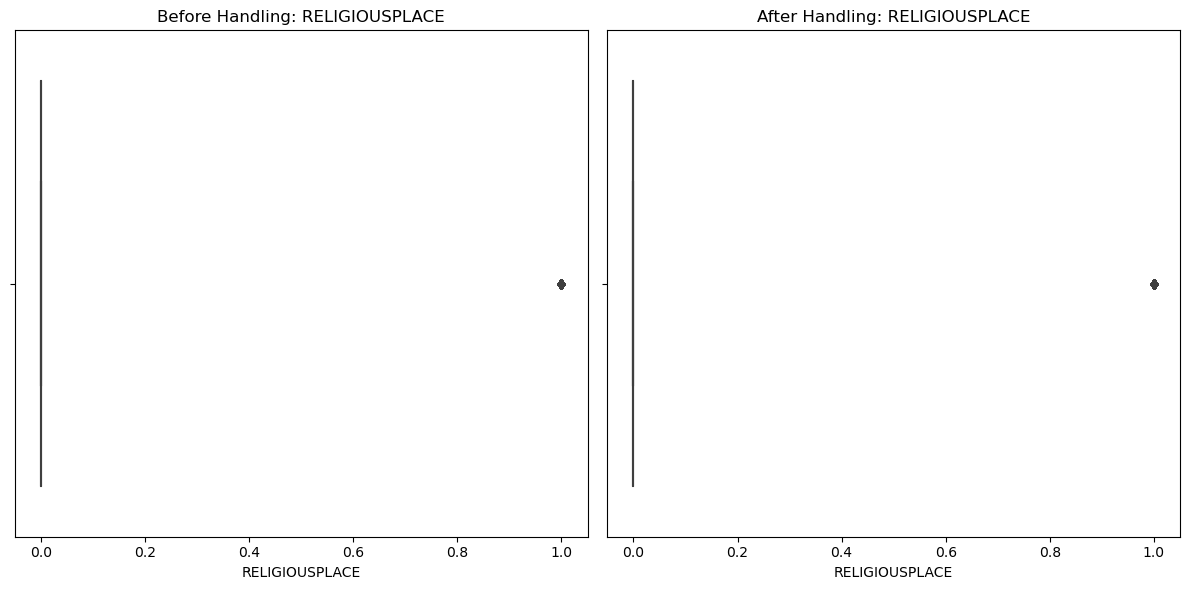

2024-12-17 19:56:12,964 - INFO - Before and after visualization completed.
2024-12-17 19:56:12,964 - INFO - Visualizing before and after outlier handling.


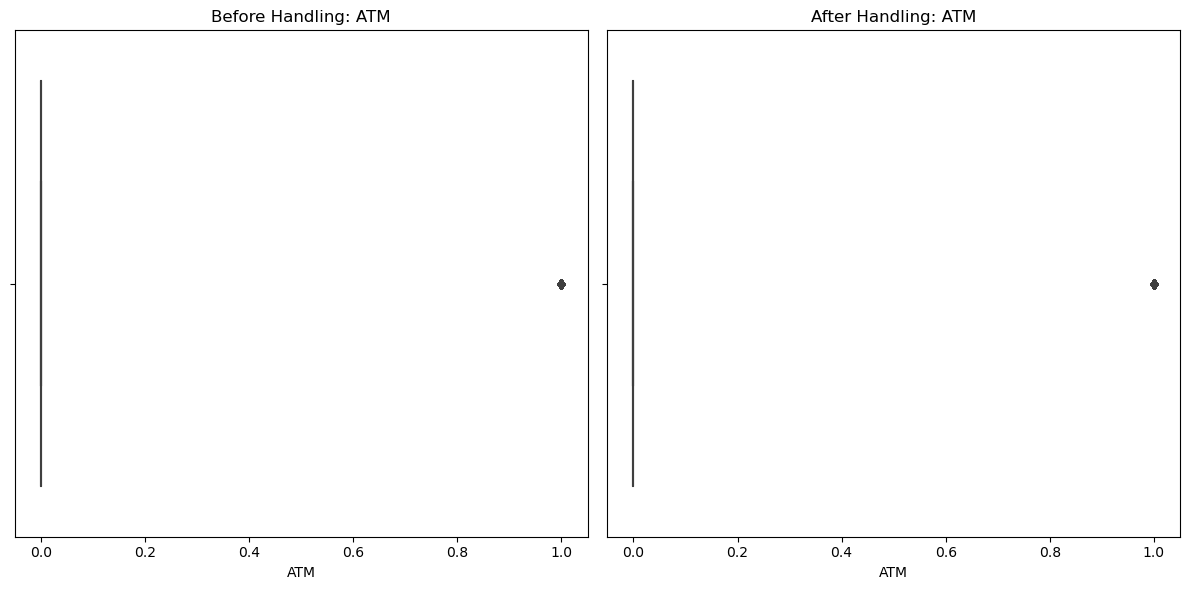

2024-12-17 19:56:13,046 - INFO - Before and after visualization completed.
2024-12-17 19:56:13,046 - INFO - Visualizing before and after outlier handling.


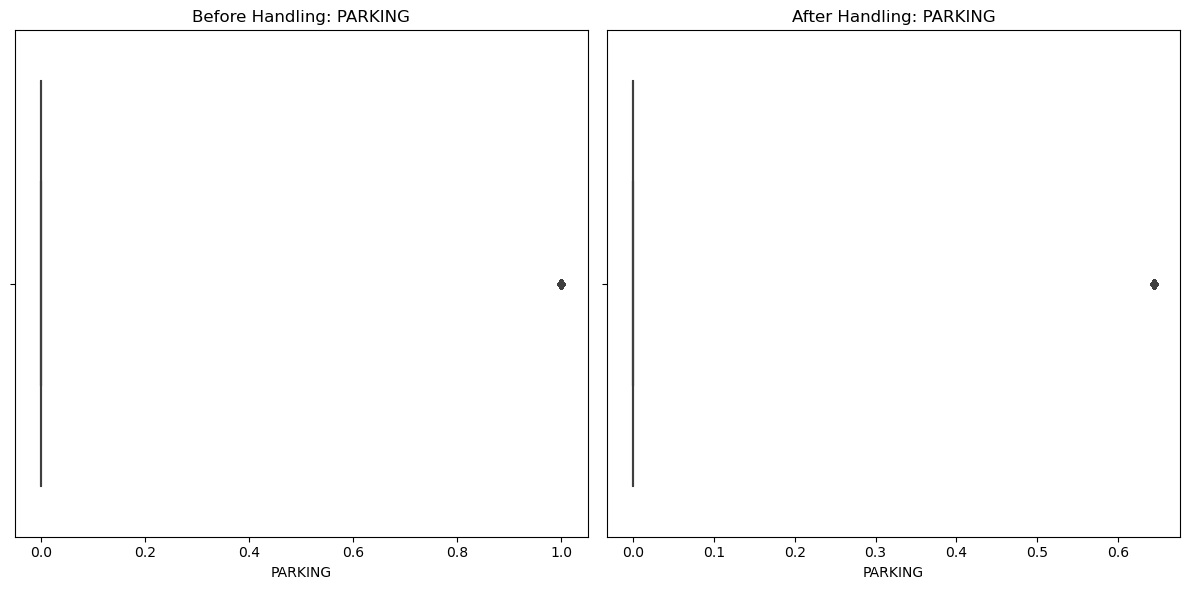

2024-12-17 19:56:13,129 - INFO - Before and after visualization completed.
2024-12-17 19:56:13,129 - INFO - Visualizing before and after outlier handling.


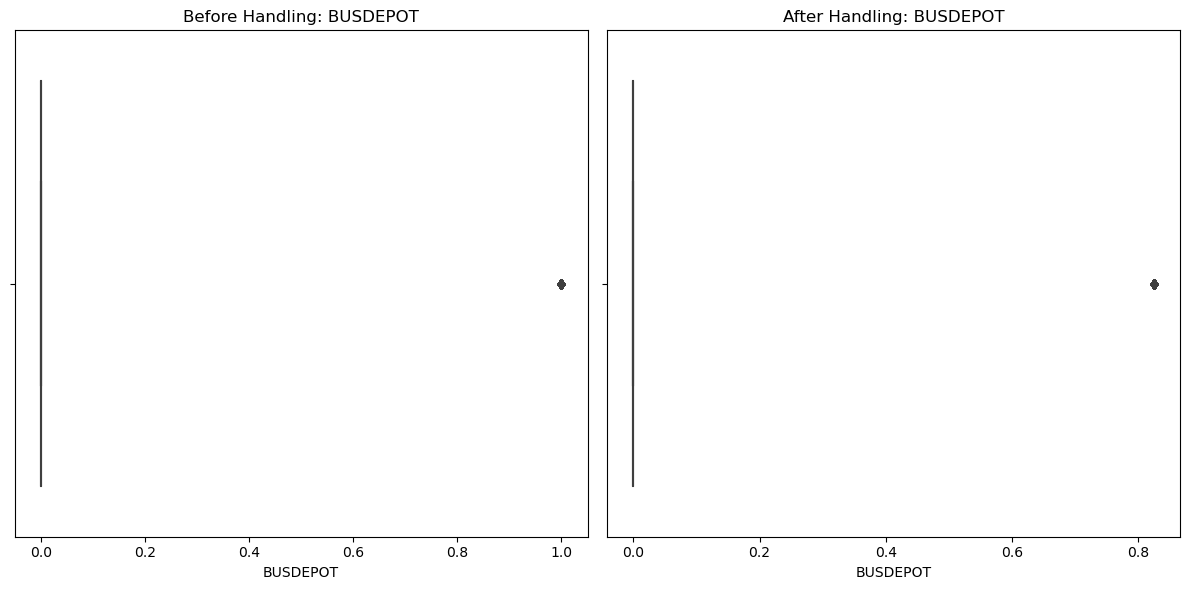

2024-12-17 19:56:13,207 - INFO - Before and after visualization completed.
2024-12-17 19:56:13,207 - INFO - Visualizing before and after outlier handling.


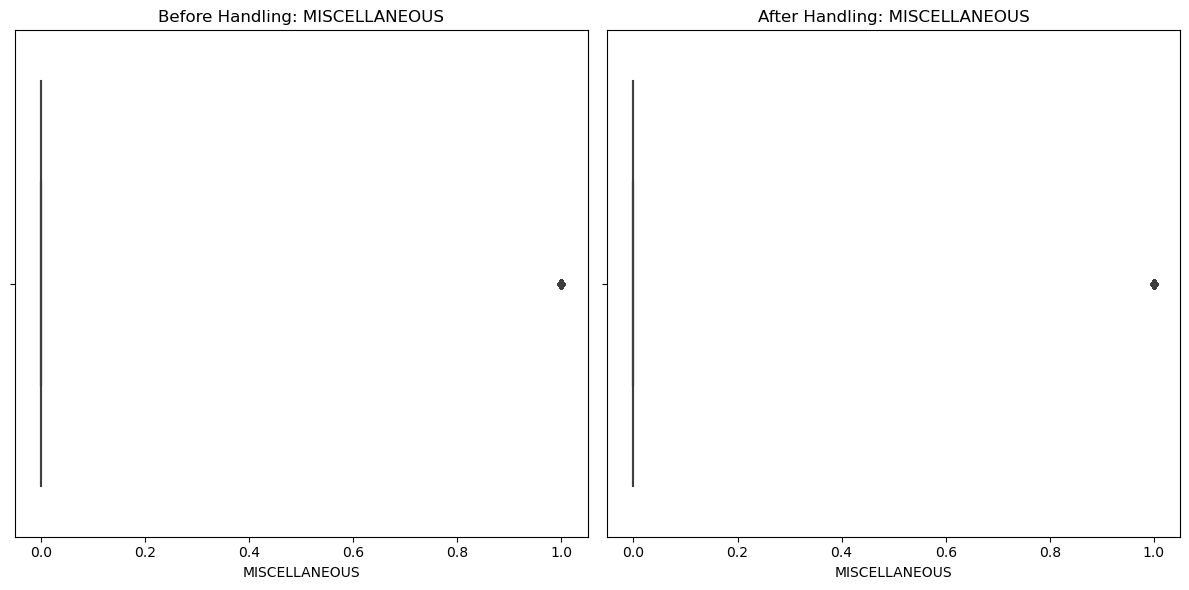

2024-12-17 19:56:13,290 - INFO - Before and after visualization completed.
2024-12-17 19:56:13,291 - INFO - Visualizing before and after outlier handling.


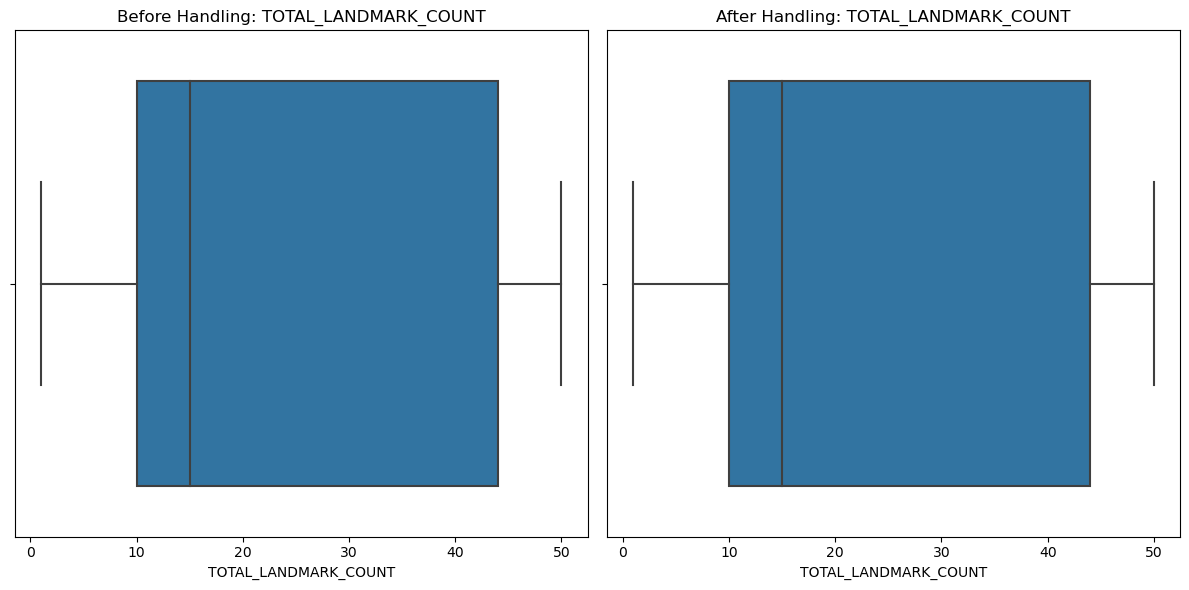

2024-12-17 19:56:13,367 - INFO - Before and after visualization completed.


In [119]:

    df_numeric = df_imputed_simple.select_dtypes(include=[np.number]).dropna()

    # Initialize the UnivariateOutlierDetector with the Z-Score based Outlier Detection Strategy
    outlier_detector = UnivariateOutlierDetector(ZScoreOutlierDetection(threshold=3))

    # Visualize outliers before handling
    for column in df_numeric.columns:
        outlier_detector.visualize_outliers(df_numeric[column])

    # Detect and handle outliers dynamically using the selected method (e.g., "iqr")
    for column in df_numeric.columns:
        # Handle outliers for each column and update the original DataFrame
        df_imputed_simple[column] = outlier_detector.handle_outliers(df_numeric[column], method="zscore")

    # Visualize before and after handling outliers for each column
    for column in df_numeric.columns:
        outlier_detector.visualize_before_after(df_numeric[column],df_imputed_simple[column])

<Axes: >

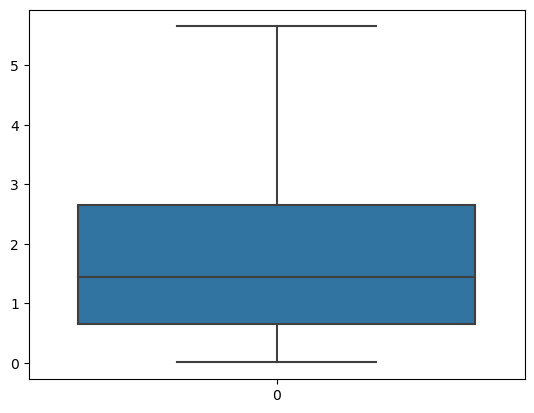

In [44]:
sns.boxplot(df['PRICE'])

/var/folders/0z/r2bryxgj661_ptk69c5tt68w0000gn/T/ipykernel_7092/2895114523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputed_simple['PRICE'])
/var/folders/0z/r2bryxgj661_ptk69c5tt68w0000gn/T/ipykernel_7092/2895114523.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRICE'])


<Axes: xlabel='PRICE', ylabel='Density'>

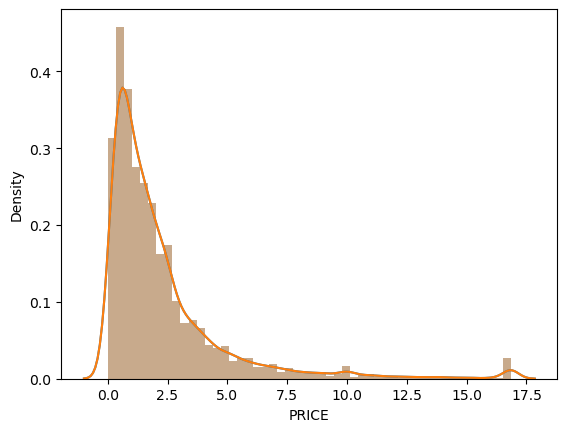

In [157]:
sns.distplot(df_imputed_simple['PRICE'])
sns.distplot(df['PRICE'])

###  **observatins**  :end of distribution are feasible for transaction type,total floor less for no of bedrooms


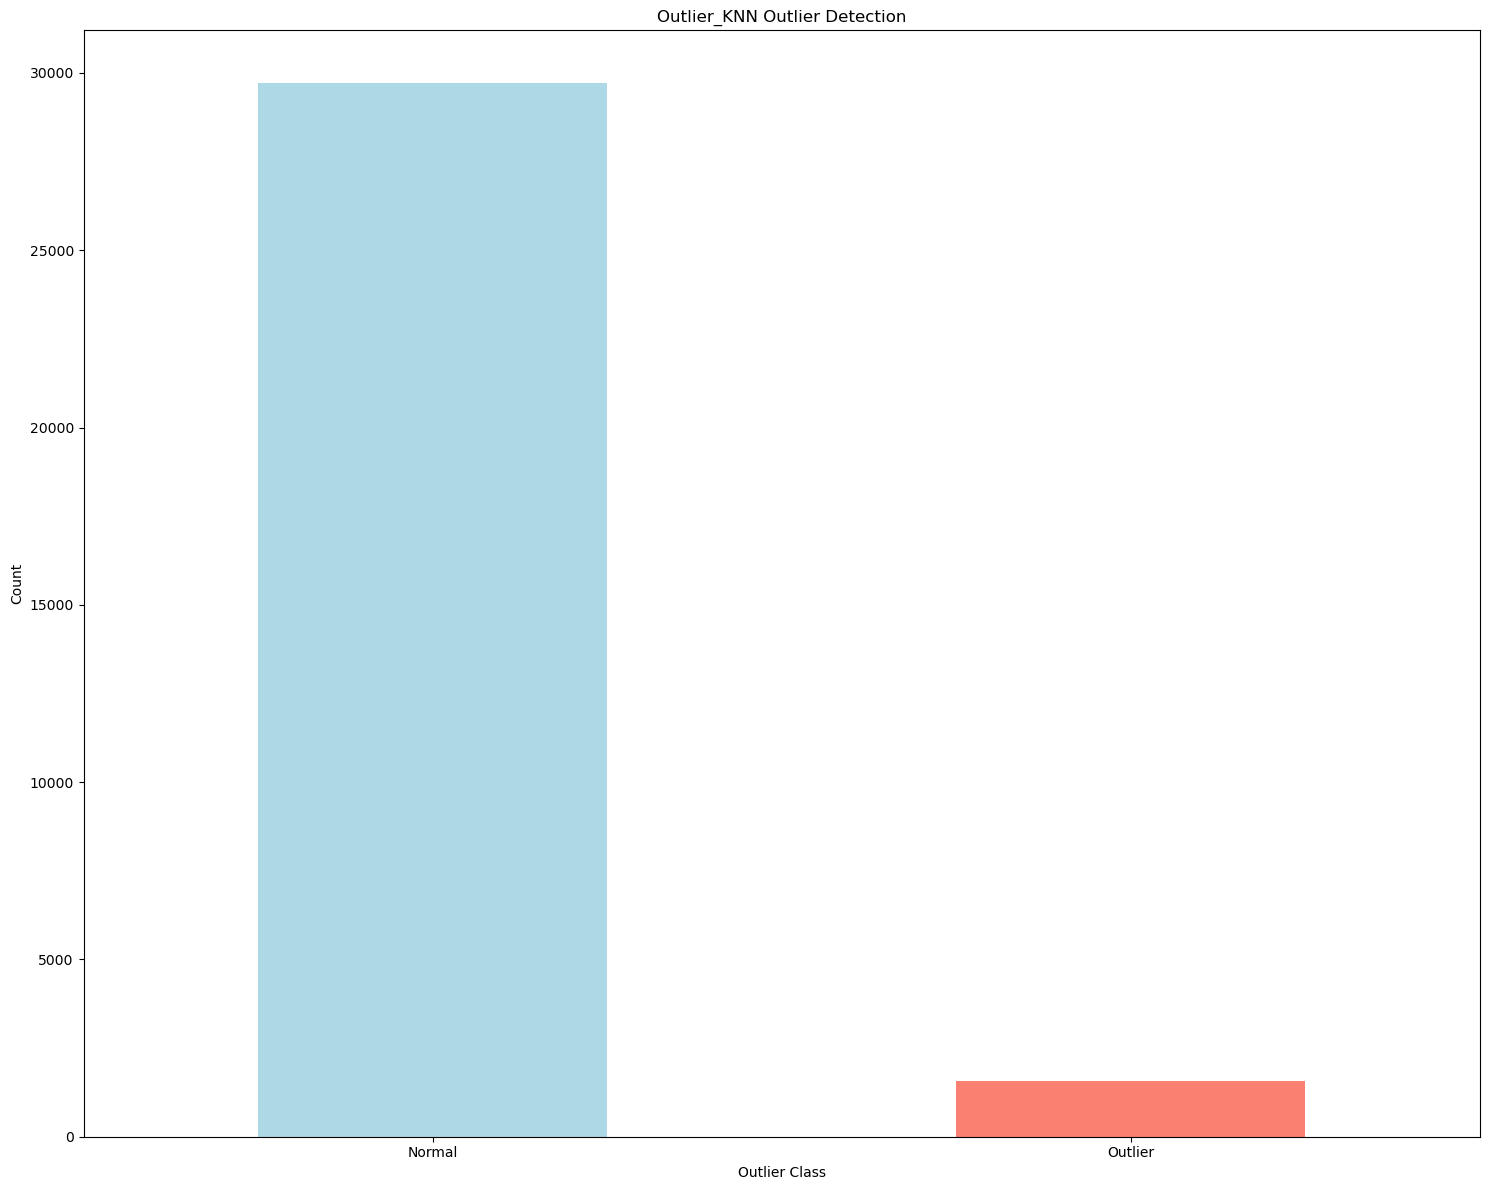


Outlier_KNN:
  Outliers Count: 1564 (5.00%)
  Normal Count: 29716 (95.00%)


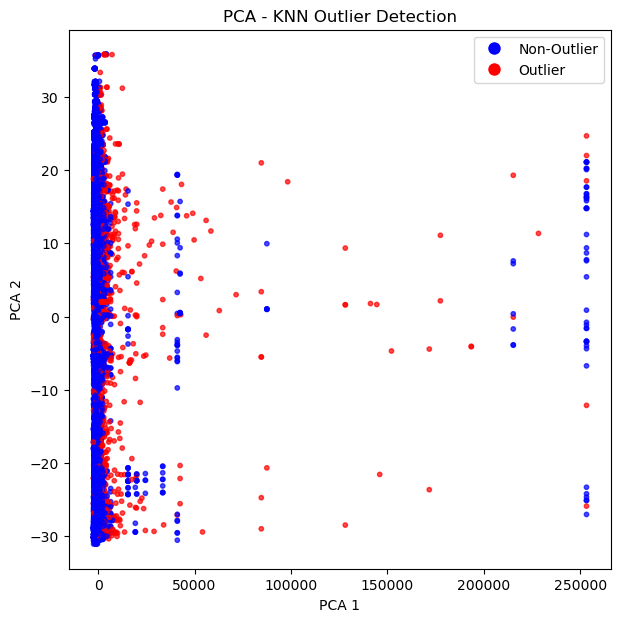

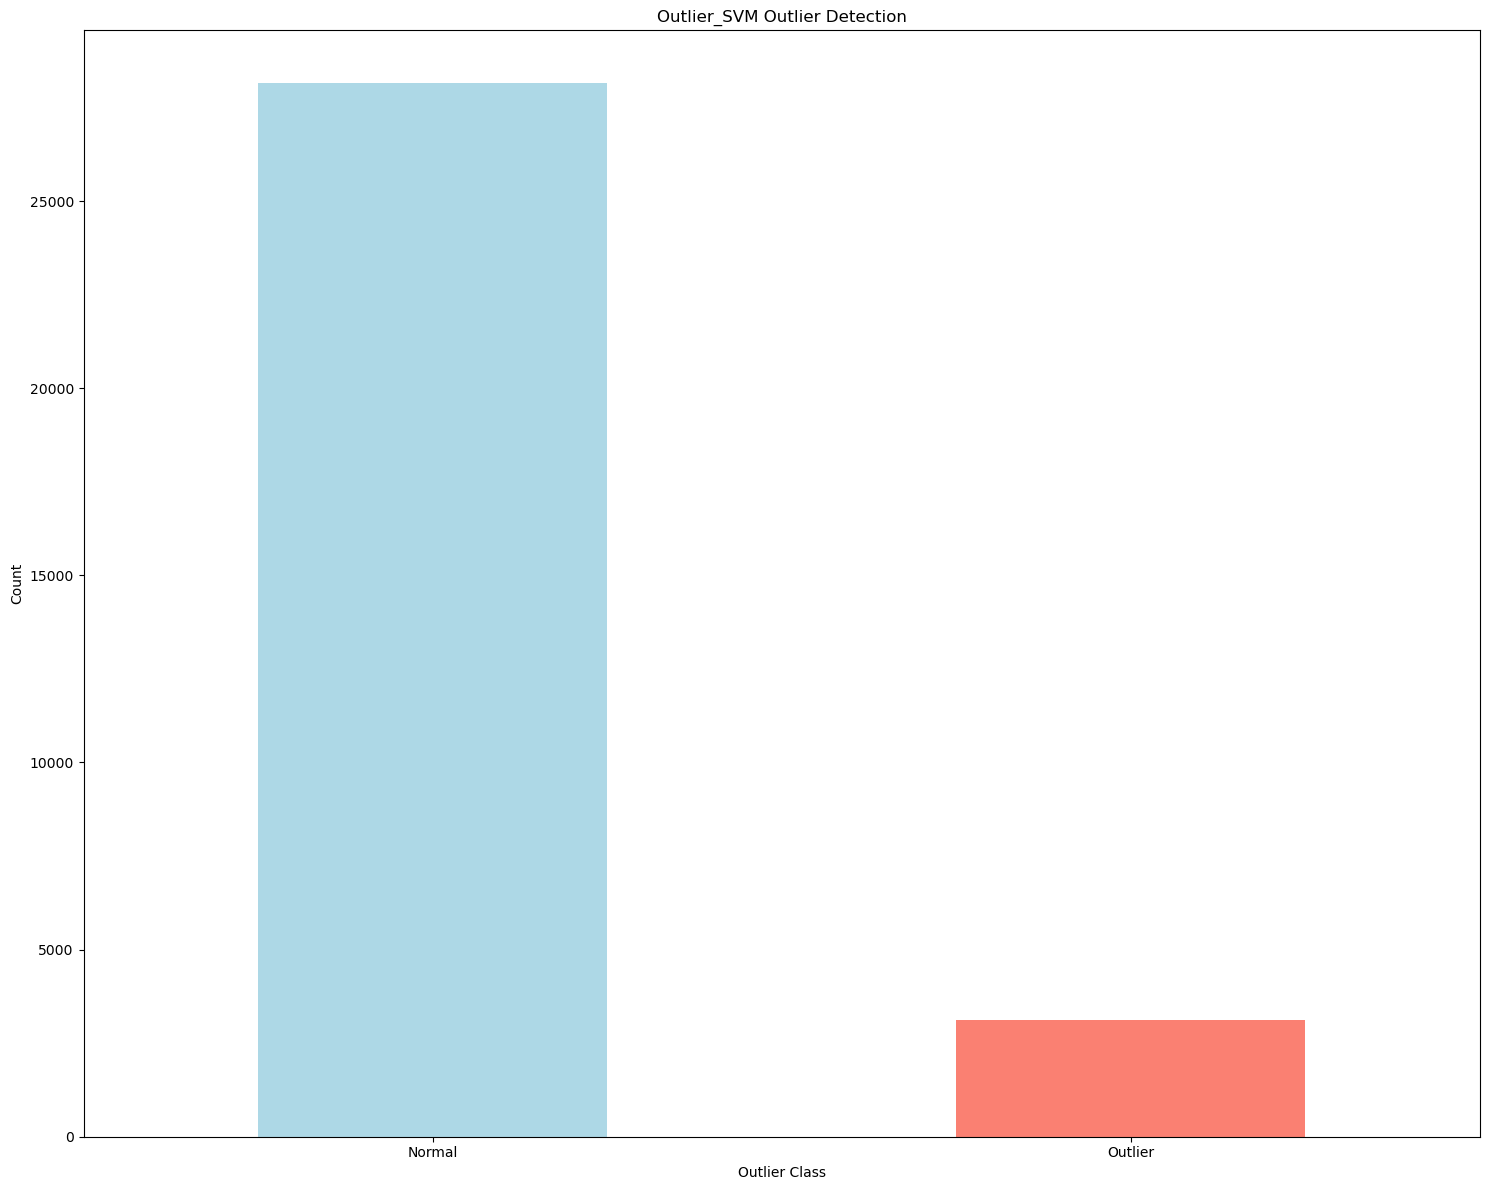


Outlier_SVM:
  Outliers Count: 3127 (10.00%)
  Normal Count: 28153 (90.00%)


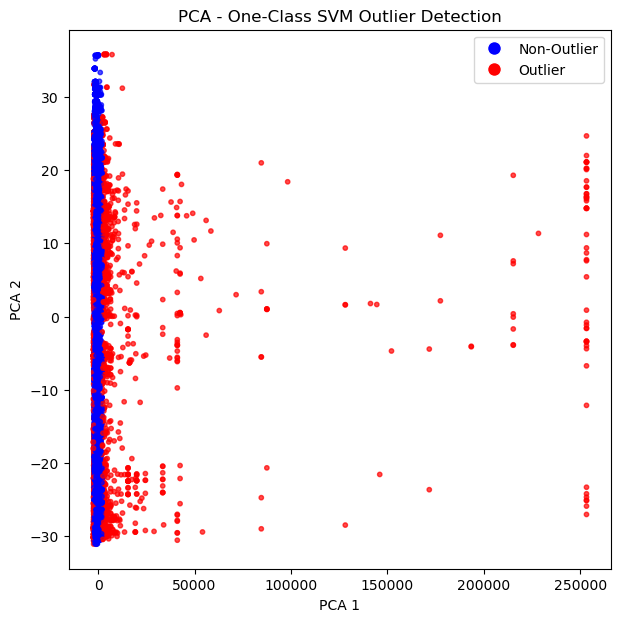

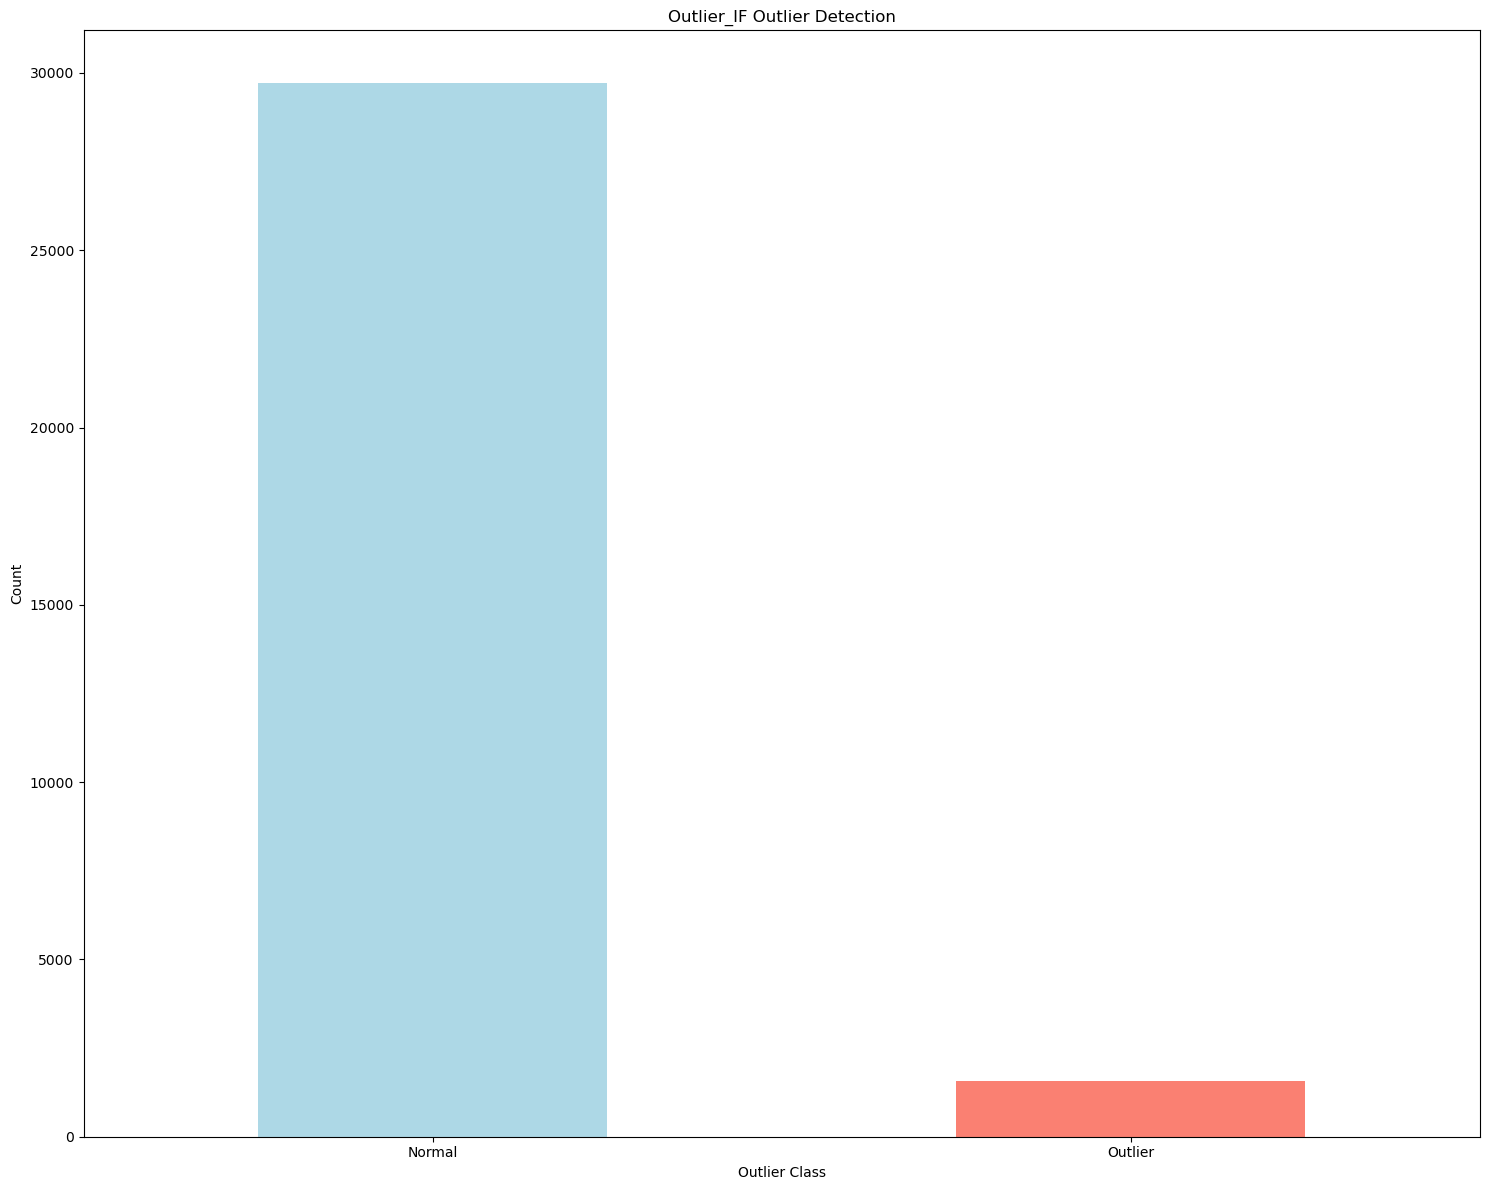


Outlier_IF:
  Outliers Count: 1564 (5.00%)
  Normal Count: 29716 (95.00%)


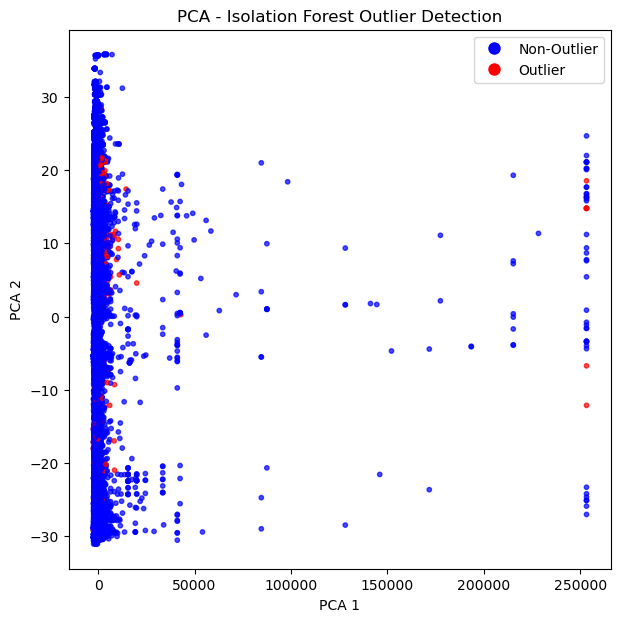

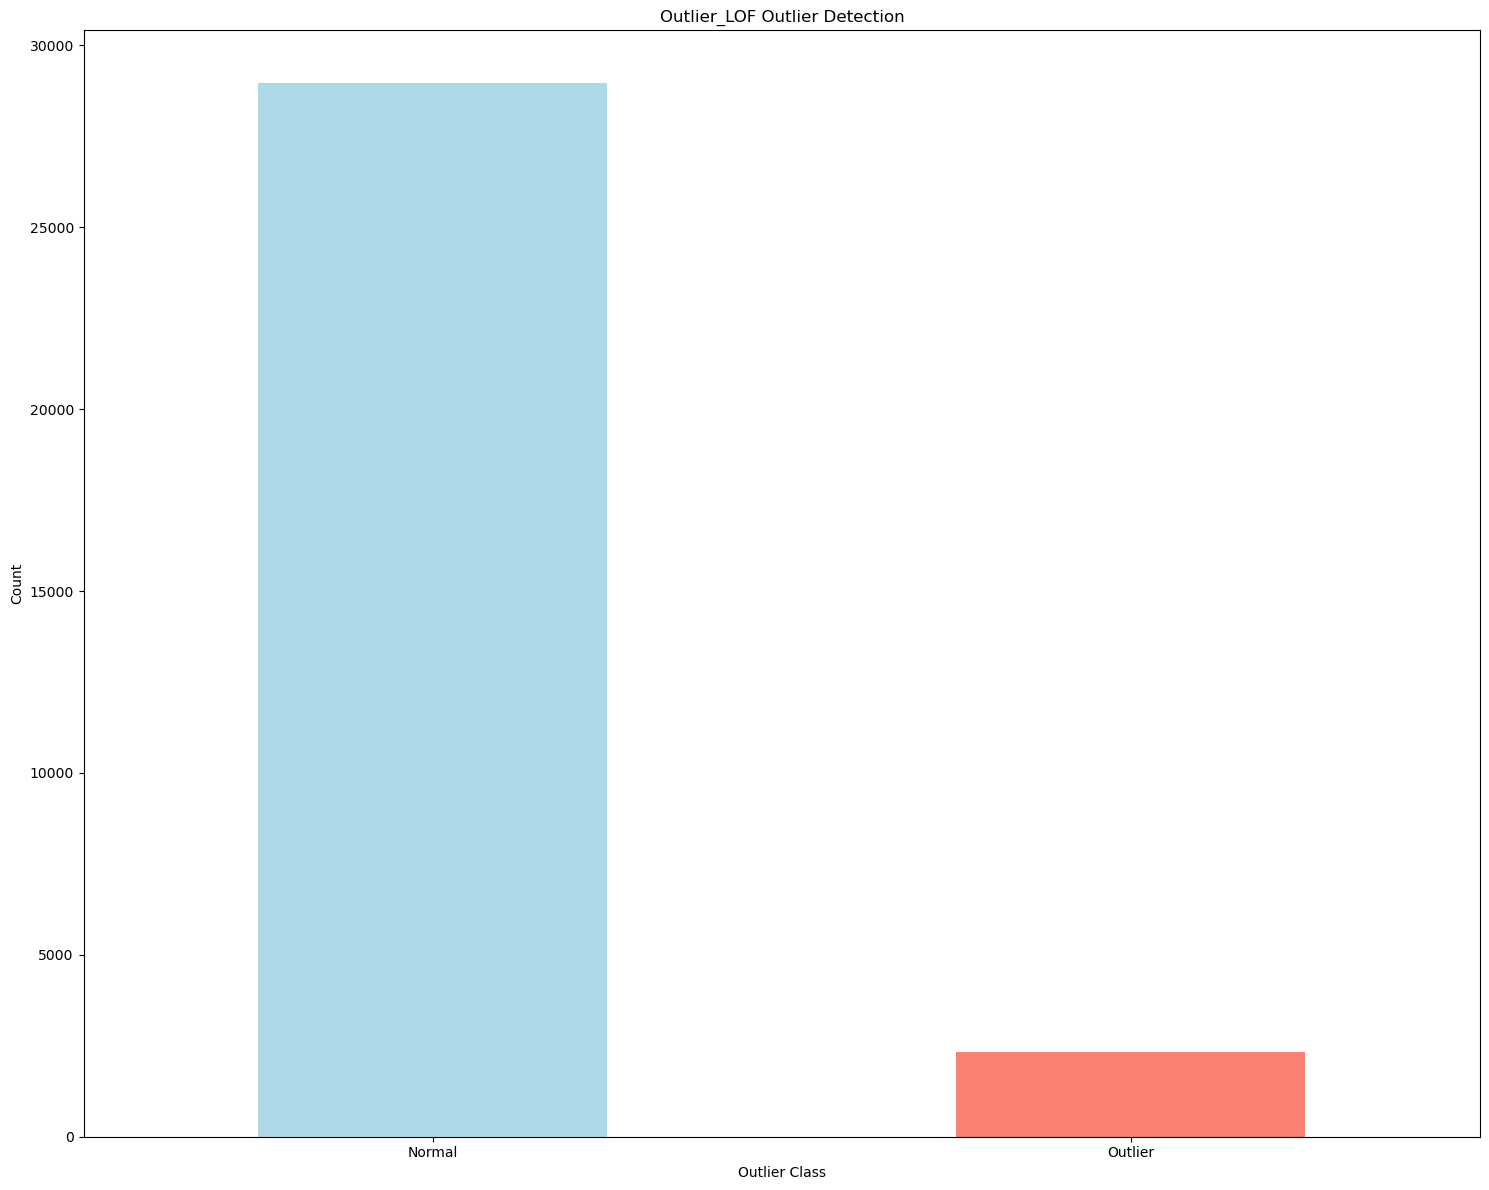


Outlier_LOF:
  Outliers Count: 2317 (7.41%)
  Normal Count: 28963 (92.59%)


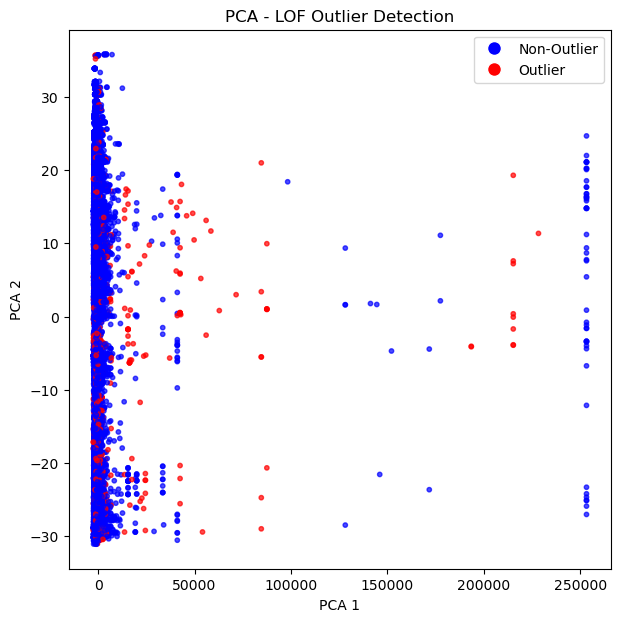

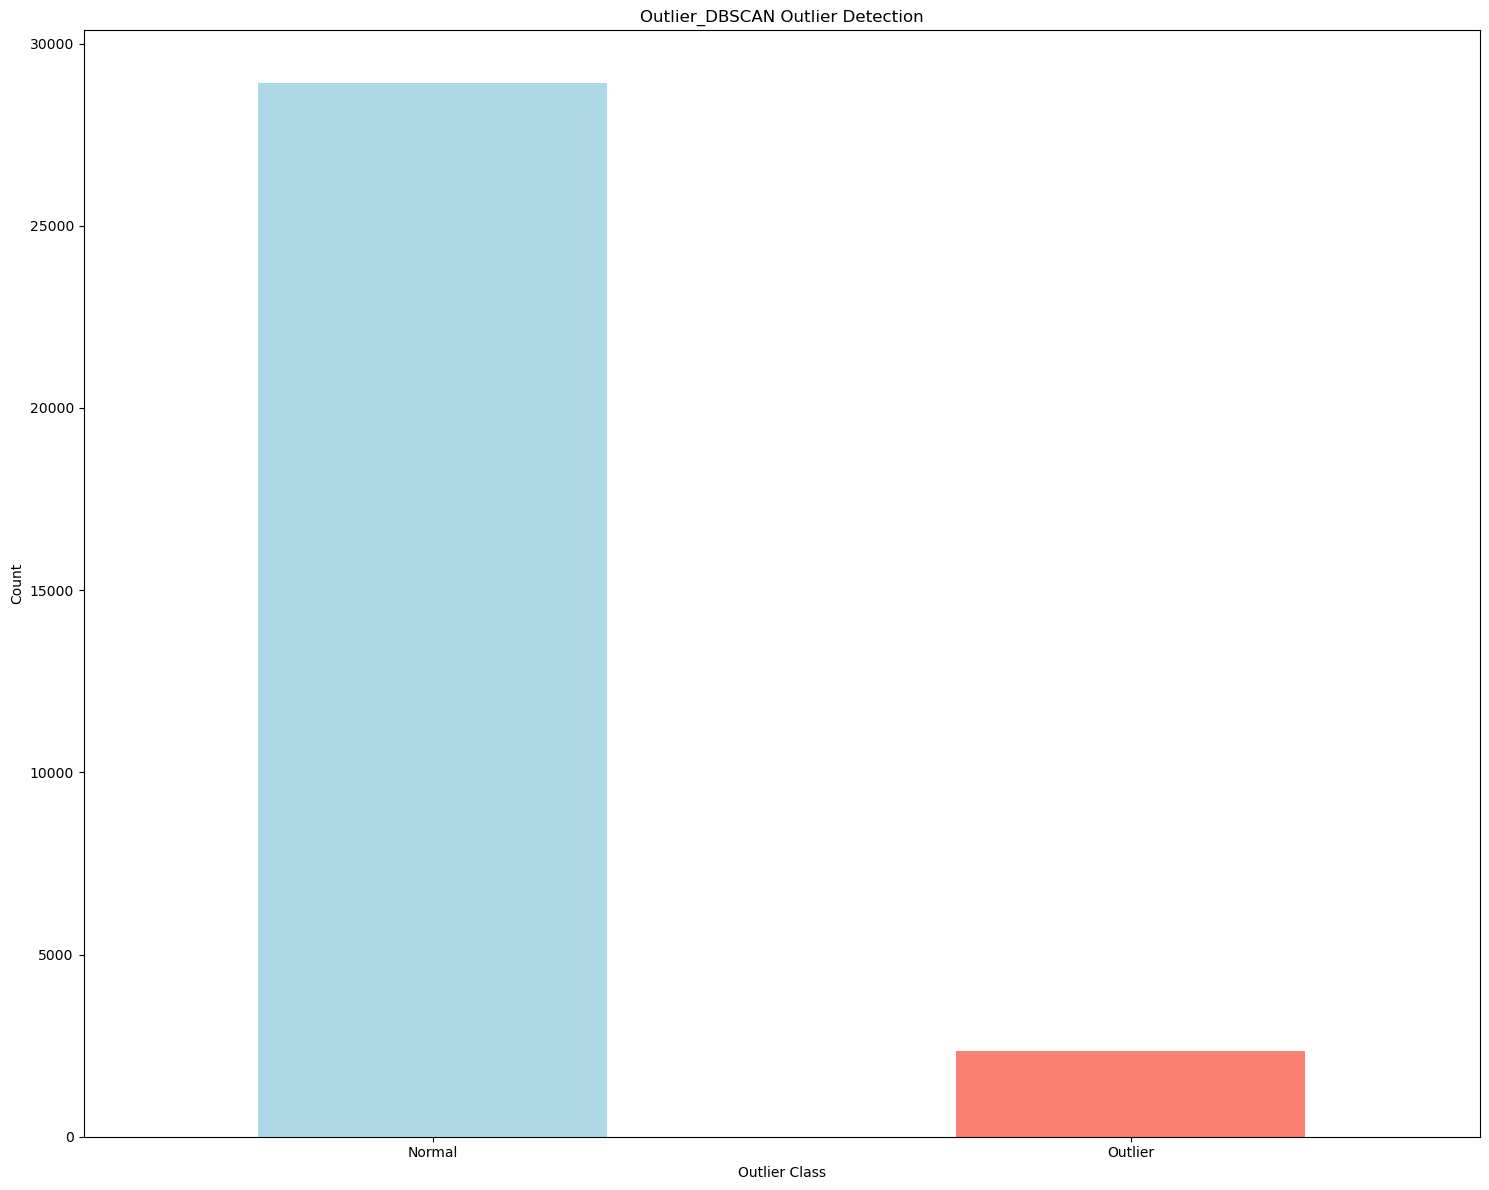


Outlier_DBSCAN:
  Outliers Count: 28916 (92.44%)
  Normal Count: 2364 (7.56%)


'the data is standardized (e.g., using StandardScaler) before applying DBSCAN.\n This will scale the features to a common range, avoiding one feature from dominating the distance computation.'

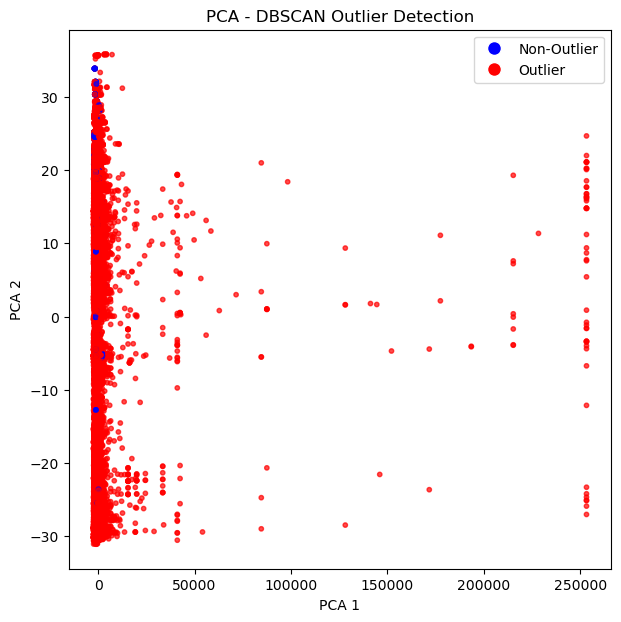

In [121]:


    # Select numeric columns for outlier detection
    df_numeric =df_imputed_simple.select_dtypes(include=[np.number]).dropna()
    numerical_columns = df_numeric.columns.tolist()

    # Example: Apply KNN strategy to detect outliers
    knn_strategy = KNNStrategy()
    outlier_detector = OutlierDetection(strategy=knn_strategy, df=df_imputed_simple, numerical_columns=numerical_columns)

    # Detect outliers with KNN
    df_with_outliers = outlier_detector.detect_outliers(n_neighbors=5)

    # Visualize the outlier distributions for KNN
    outlier_detector.visualize_outlier_distributions()

    # Handle and visualize KNN method-wise:
    df_no_outliers_knn = outlier_detector.handle_outliers(method='remove', outlier_column='Outlier_KNN')
    outlier_detector.visualize_pca_with_colors(df=df_imputed_simple, outlier_column='Outlier_KNN', title="PCA - KNN Outlier Detection")

    # Example: Apply One-Class SVM strategy to detect outliers
    svm_strategy = OneClassSVMStrategy()
    outlier_detector_svm = OutlierDetection(strategy=svm_strategy, df=df_imputed_simple, numerical_columns=numerical_columns)

    # Detect outliers with One-Class SVM
    df_with_outliers_svm = outlier_detector_svm.detect_outliers(nu=0.1)

    # Visualize the outlier distributions for SVM
    outlier_detector_svm.visualize_outlier_distributions()

    # Handle and visualize One-Class SVM method-wise:
    df_no_outliers_svm = outlier_detector_svm.handle_outliers(method='remove', outlier_column='Outlier_SVM')
    outlier_detector_svm.visualize_pca_with_colors(df=df_imputed_simple, outlier_column='Outlier_SVM', title="PCA - One-Class SVM Outlier Detection")



    # Example: Apply Isolation Forest strategy to detect outliers
    iso_forest_strategy = IsolationForestStrategy()
    outlier_detector_if = OutlierDetection(strategy=iso_forest_strategy, df=df_imputed_simple, numerical_columns=numerical_columns)

    # Detect outliers with Isolation Forest
    df_with_outliers_if = outlier_detector_if.detect_outliers(contamination=0.05)

    # Visualize the outlier distributions for Isolation Forest
    outlier_detector_if.visualize_outlier_distributions()

    # Handle and visualize Isolation Forest method-wise:
    df_no_outliers_if = outlier_detector_if.handle_outliers(method='remove', outlier_column='Outlier_IF')
    outlier_detector_if.visualize_pca_with_colors(df=df_imputed_simple, outlier_column='Outlier_IF', title="PCA - Isolation Forest Outlier Detection")

    # Example: Apply LOF strategy to detect outliers
    lof_strategy = LOFStrategy()
    outlier_detector_lof = OutlierDetection(strategy=lof_strategy, df=df_imputed_simple, numerical_columns=numerical_columns)

    # Detect outliers with LOF
    df_with_outliers_lof = outlier_detector_lof.detect_outliers(n_neighbors=20)

    # Visualize the outlier distributions for LOF
    outlier_detector_lof.visualize_outlier_distributions()

    # Handle and visualize LOF method-wise:
    df_no_outliers_lof = outlier_detector_lof.handle_outliers(method='remove', outlier_column='Outlier_LOF')
    outlier_detector_lof.visualize_pca_with_colors(df=df_imputed_simple, outlier_column='Outlier_LOF', title="PCA - LOF Outlier Detection")

    # Example: Apply DBSCAN strategy to detect outliers
    dbscan_strategy = DBSCANStrategy()
    outlier_detector_dbscan = OutlierDetection(strategy=dbscan_strategy, df=df_imputed_simple, numerical_columns=numerical_columns)

    # Detect outliers with DBSCAN
    df_with_outliers_dbscan = outlier_detector_dbscan.detect_outliers(eps=0.5, min_samples=5)

    # Visualize the outlier distributions for DBSCAN
    outlier_detector_dbscan.visualize_outlier_distributions()

    # Handle and visualize DBSCAN method-wise:
    df_no_outliers_dbscan = outlier_detector_dbscan.handle_outliers(method='remove', outlier_column='Outlier_DBSCAN')
    outlier_detector_dbscan.visualize_pca_with_colors(df=df_imputed_simple, outlier_column='Outlier_DBSCAN', title="PCA - DBSCAN Outlier Detection")
    # notes
    '''the data is standardized (e.g., using StandardScaler) before applying DBSCAN.
     This will scale the features to a common range, avoiding one feature from dominating the distance computation.'''


In [123]:
 df_no_outliers_svm.head()


,PROPERTY_TYPE,FACING,TRANSACT_TYPE,OWNTYPE,AGE,AREA,CITY,LATITUDE,LONGITUDE,PRICE,PRICE_PER_SQFT,BEDROOM_NUM,BALCONY_NUM,TOTAL_FLOOR,FLOOR_NUM,FURNISH,PREFERENCE,READY TO MOVE,RESALE,METROSTATION,SHOPPING,CONNECTIVITY,EDUCATION,HOSPITAL,AIRPORT,RAILWAYSTATION,OFFICECOMPLEX,HOTEL,AMUSEMENTPARK,GOLFCOURSE,STADIUM,RELIGIOUSPLACE,ATM,PARKING,BUSDEPOT,MISCELLANEOUS,TOTAL_LANDMARK_COUNT,AMENITY_LUXURY,FEATURES_LUXURY,Outlier_KNN,Outlier_SVM
0,plot,3,1.0,1.000000,relative new property,1089.0,hyderabad,18.821612,78.211468,0.058,0.000053,2.897106,2.170053,2.0,Unknown,Unfurnished,sale,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,22.919843,low,low,0,0
1,plot,7,1.0,1.000000,relative new property,720.0,Kolkata,22.460607,88.312997,0.013,0.000018,2.897106,2.170053,3.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,1,0,0.0,0.824617,0,18.000000,low,low,0,0
2,plot,3,1.0,1.000000,relative new property,1647.0,hyderabad,17.327900,78.468206,0.183,0.000111,2.897106,2.170053,5.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,27.000000,low,low,0,0
4,apartment,5,1.0,1.000000,moderate old property,800.0,Kolkata,22.855886,88.380000,0.270,0.000338,2.000000,1.000000,4.0,Low-rise,Semi-Furnished,sale,0,1,0,1,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,11.000000,medium,low,0,0
5,apartment,1,1.0,2.259042,old property,900.0,Kolkata,22.632687,88.450763,0.750,0.000833,3.000000,1.000000,5.0,Low-rise,Semi-Furnished,sale,1,1,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,1,1,0.0,0.824617,1,36.000000,low,low,0,0


In [125]:
# Select categorical (object) columns
categorical_columns =  df_no_outliers_svm.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for column in categorical_columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("-" * 50)

Unique values in column 'PROPERTY_TYPE':
['plot' 'apartment' 'house' 'other']
--------------------------------------------------
Unique values in column 'AGE':
['relative new property' 'moderate old property' 'old property']
--------------------------------------------------
Unique values in column 'CITY':
['hyderabad' 'Kolkata' 'gurgaon' 'Mumbai']
--------------------------------------------------
Unique values in column 'FLOOR_NUM':
['Unknown' 'Low-rise' 'Ground Level' 'High-rise' 'Mid-rise'
 'Very High-rise' 'Basement']
--------------------------------------------------
Unique values in column 'FURNISH':
['Unfurnished' 'Semi-Furnished' 'Fully Furnished' 'Partially Furnished']
--------------------------------------------------
Unique values in column 'PREFERENCE':
['sale']
--------------------------------------------------
Unique values in column 'AMENITY_LUXURY':
['low' 'medium' 'high']
--------------------------------------------------
Unique values in column 'FEATURES_LUXURY':
['l

In [127]:
df['FEATURES_LUXURY'].value_counts()

FEATURES_LUXURY
low       19302
medium     6804
high       5174
Name: count, dtype: int64

In [129]:
# Create context with the chosen strategy
encoding_strategy=OneHotEncoding(features = ['PROPERTY_TYPE','CITY'])
context =Feature_Engineering(strategy=encoding_strategy)

df_encoded1 = context.apply_transformation(df_no_outliers_svm)# Define custom mappings for each feature



2024-12-17 19:57:17,287 - INFO - Initialized OneHotEncoding with features ['PROPERTY_TYPE', 'CITY'] and parameters {}
2024-12-17 19:57:17,288 - INFO - EncodingContext initialized with strategy OneHotEncoding
2024-12-17 19:57:17,289 - INFO - Applying transformation in context...
2024-12-17 19:57:17,290 - INFO - Applying transformation with parameters: {}
2024-12-17 19:57:17,356 - INFO - Transformed columns: ['FACING', 'TRANSACT_TYPE', 'OWNTYPE', 'AGE', 'AREA', 'LATITUDE', 'LONGITUDE', 'PRICE', 'PRICE_PER_SQFT', 'BEDROOM_NUM', 'BALCONY_NUM', 'TOTAL_FLOOR', 'FLOOR_NUM', 'FURNISH', 'PREFERENCE', 'READY TO MOVE', 'RESALE', 'METROSTATION', 'SHOPPING', 'CONNECTIVITY', 'EDUCATION', 'HOSPITAL', 'AIRPORT', 'RAILWAYSTATION', 'OFFICECOMPLEX', 'HOTEL', 'AMUSEMENTPARK', 'GOLFCOURSE', 'STADIUM', 'RELIGIOUSPLACE', 'ATM', 'PARKING', 'BUSDEPOT', 'MISCELLANEOUS', 'TOTAL_LANDMARK_COUNT', 'AMENITY_LUXURY', 'FEATURES_LUXURY', 'Outlier_KNN', 'Outlier_SVM', 'PROPERTY_TYPE_1', 'PROPERTY_TYPE_2', 'PROPERTY_TYPE

In [131]:
df_encoded1.head()

,FACING,TRANSACT_TYPE,OWNTYPE,AGE,AREA,LATITUDE,LONGITUDE,PRICE,PRICE_PER_SQFT,BEDROOM_NUM,BALCONY_NUM,TOTAL_FLOOR,FLOOR_NUM,FURNISH,PREFERENCE,READY TO MOVE,RESALE,METROSTATION,SHOPPING,CONNECTIVITY,EDUCATION,HOSPITAL,AIRPORT,RAILWAYSTATION,OFFICECOMPLEX,HOTEL,AMUSEMENTPARK,GOLFCOURSE,STADIUM,RELIGIOUSPLACE,ATM,PARKING,BUSDEPOT,MISCELLANEOUS,TOTAL_LANDMARK_COUNT,AMENITY_LUXURY,FEATURES_LUXURY,Outlier_KNN,Outlier_SVM,PROPERTY_TYPE_1,PROPERTY_TYPE_2,PROPERTY_TYPE_3,PROPERTY_TYPE_4,CITY_1,CITY_2,CITY_3,CITY_4
0,3,1.0,1.000000,relative new property,1089.0,18.821612,78.211468,0.058,0.000053,2.897106,2.170053,2.0,Unknown,Unfurnished,sale,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,22.919843,low,low,0,0,1,0,0,0,1,0,0,0
1,7,1.0,1.000000,relative new property,720.0,22.460607,88.312997,0.013,0.000018,2.897106,2.170053,3.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,1,0,0.0,0.824617,0,18.000000,low,low,0,0,1,0,0,0,0,1,0,0
2,3,1.0,1.000000,relative new property,1647.0,17.327900,78.468206,0.183,0.000111,2.897106,2.170053,5.0,Unknown,Unfurnished,sale,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,27.000000,low,low,0,0,1,0,0,0,1,0,0,0
4,5,1.0,1.000000,moderate old property,800.0,22.855886,88.380000,0.270,0.000338,2.000000,1.000000,4.0,Low-rise,Semi-Furnished,sale,0,1,0,1,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,11.000000,medium,low,0,0,0,1,0,0,0,1,0,0
5,1,1.0,2.259042,old property,900.0,22.632687,88.450763,0.750,0.000833,3.000000,1.000000,5.0,Low-rise,Semi-Furnished,sale,1,1,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,1,1,0.0,0.824617,1,36.000000,low,low,0,0,0,1,0,0,0,1,0,0


In [133]:

# Create context with the encoding strategy
context = Feature_Engineering(strategy=ordinal_encoding)

# Apply the transformation
df_encoded = context.apply_transformation(df_encoded1)




2024-12-17 19:57:23,503 - INFO - Initialized OrdinalEncoding with features ['AGE', 'FLOOR_NUM', 'FURNISH', 'PREFERENCE', 'AMENITY_LUXURY', 'FEATURES_LUXURY'] and parameters {'mapping': [{'col': 'AGE', 'mapping': {'relative new property': 0, 'moderate old property': 1, 'old property': 2}}, {'col': 'FLOOR_NUM', 'mapping': {'Unknown': 0, 'Basement': 1, 'Low-rise': 2, 'Ground Level': 3, 'High-rise': 4, 'Mid-rise': 5, 'Very High-rise': 6}}, {'col': 'FURNISH', 'mapping': {'Unfurnished': 0, 'Semi-Furnished': 1, 'Fully Furnished': 2, 'Partially Furnished': 3}}, {'col': 'AMENITY_LUXURY', 'mapping': {'low': 0, 'medium': 1, 'high': 2}}, {'col': 'FEATURES_LUXURY', 'mapping': {'low': 0, 'high': 1, 'medium': 2}}]}
2024-12-17 19:57:23,505 - INFO - EncodingContext initialized with strategy OrdinalEncoding
2024-12-17 19:57:23,506 - INFO - Applying transformation in context...
2024-12-17 19:57:23,507 - INFO - Applying transformation with parameters: {'mapping': [{'col': 'AGE', 'mapping': {'relative new 

In [135]:
df_encoded.head()

,FACING,TRANSACT_TYPE,OWNTYPE,AREA,LATITUDE,LONGITUDE,PRICE,PRICE_PER_SQFT,BEDROOM_NUM,BALCONY_NUM,TOTAL_FLOOR,READY TO MOVE,RESALE,METROSTATION,SHOPPING,CONNECTIVITY,EDUCATION,HOSPITAL,AIRPORT,RAILWAYSTATION,OFFICECOMPLEX,HOTEL,AMUSEMENTPARK,GOLFCOURSE,STADIUM,RELIGIOUSPLACE,ATM,PARKING,BUSDEPOT,MISCELLANEOUS,TOTAL_LANDMARK_COUNT,Outlier_KNN,Outlier_SVM,PROPERTY_TYPE_1,PROPERTY_TYPE_2,PROPERTY_TYPE_3,PROPERTY_TYPE_4,CITY_1,CITY_2,CITY_3,CITY_4,AGE,FLOOR_NUM,FURNISH,PREFERENCE,AMENITY_LUXURY,FEATURES_LUXURY
0,3,1.0,1.000000,1089.0,18.821612,78.211468,0.058,0.000053,2.897106,2.170053,2.0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,22.919843,0,0,1,0,0,0,1,0,0,0,0,0,0,sale,0,0
1,7,1.0,1.000000,720.0,22.460607,88.312997,0.013,0.000018,2.897106,2.170053,3.0,1,1,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,1,0,0.0,0.824617,0,18.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,sale,0,0
2,3,1.0,1.000000,1647.0,17.327900,78.468206,0.183,0.000111,2.897106,2.170053,5.0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,27.000000,0,0,1,0,0,0,1,0,0,0,0,0,0,sale,0,0
4,5,1.0,1.000000,800.0,22.855886,88.380000,0.270,0.000338,2.000000,1.000000,4.0,0,1,0,1,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.000000,0,11.000000,0,0,0,1,0,0,0,1,0,0,1,2,1,sale,1,0
5,1,1.0,2.259042,900.0,22.632687,88.450763,0.750,0.000833,3.000000,1.000000,5.0,1,1,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,1,1,0.0,0.824617,1,36.000000,0,0,0,1,0,0,0,1,0,0,2,2,1,sale,0,0


In [137]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28153 entries, 0 to 38501
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FACING                28153 non-null  int64  
 1   TRANSACT_TYPE         28153 non-null  float64
 2   OWNTYPE               28153 non-null  float64
 3   AREA                  28153 non-null  float64
 4   LATITUDE              28153 non-null  float64
 5   LONGITUDE             28153 non-null  float64
 6   PRICE                 28153 non-null  float64
 7   PRICE_PER_SQFT        28153 non-null  float64
 8   BEDROOM_NUM           28153 non-null  float64
 9   BALCONY_NUM           28153 non-null  float64
 10  TOTAL_FLOOR           28153 non-null  float64
 11  READY TO MOVE         28153 non-null  int64  
 12  RESALE                28153 non-null  int64  
 13  METROSTATION          28153 non-null  int64  
 14  SHOPPING              28153 non-null  int64  
 15  CONNECTIVITY          28

In [139]:

df_encoded['PREFERENCE'] = df_encoded['PREFERENCE'].replace('sale', 1)

In [141]:
df_encoded.columns
df_encoded.to_csv('encoded')

In [143]:
!pip install xgboost
!pip install catboost

In [145]:
!pip install lightgbm

In [147]:
!pip install mlflow dagshub

In [163]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Example DataFrame (replace with your data)
# Assuming `df_encoded` is a preprocessed DataFrame
# df_encoded = ...

# Separate features and target variable
X = df_encoded.drop(columns='PRICE')  # Replace 'PRICE' with your target column
y = df_encoded['PRICE']

# Apply log transformation to the target variable if it's skewed
y_log = np.log1p(y)

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 2: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(learning_rate=0.1, iterations=1000, depth=6, verbose=0)
}

# Step 4: Initialize variables to store results
results = []

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Train, evaluate, and check for overfitting/underfitting
for name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_mean = np.mean(-cv_scores)
    cv_std = np.std(-cv_scores)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Evaluate on training and test data
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Transform predictions back if log-transformed
    y_train_exp = np.expm1(y_train)
    y_train_pred_exp = np.expm1(y_train_pred)
    y_test_exp = np.expm1(y_test)
    y_test_pred_exp = np.expm1(y_test_pred)

    # Metrics
    mse_train = mean_squared_error(y_train_exp, y_train_pred_exp)
    rmse_train = sqrt(mse_train)
    r2_train = r2_score(y_train_exp, y_train_pred_exp)

    mse_test = mean_squared_error(y_test_exp, y_test_pred_exp)
    rmse_test = sqrt(mse_test)
    r2_test = r2_score(y_test_exp, y_test_pred_exp)
    mae_test = mean_absolute_error(y_test_exp, y_test_pred_exp)

    # Check for overfitting or underfitting
    if r2_train > r2_test + 0.1:
        fit_status = 'Overfitting'
    elif r2_train < r2_test - 0.1:
        fit_status = 'Underfitting'
    else:
        fit_status = 'Good Fit'

    # Append results
    results.append({
        'Model': name,
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test,
        'Train R2 Score': r2_train,
        'Test R2 Score': r2_test,
        'Test MAE': mae_test,
        'CV Mean MSE': cv_mean,
        'CV Std MSE': cv_std,
        'Fit Status': fit_status
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                Model     Train MSE    Test MSE    Train RMSE  Test RMSE  \
0   Linear Regression  4.006828e+04  232.935489  2.001706e+02  15.262224   
1               Ridge  4.007082e+04  232.582190  2.001770e+02  15.250646   
2               Lasso  5.138910e+00    5.049715  2.266916e+00   2.247157   
3          ElasticNet  5.138910e+00    5.049715  2.266916e+00   2.247157   
4       Decision Tree  1.266039e-30    0.023636  1.125184e-15   0.153740   
5       Random Forest  1.271695e-03    0.014294  3.566083e-02   0.119558   
6         Extra Trees  1.233656e-28    0.046385  1.110701e-14   0.215373   
7   Gradient Boosting  2.985158e-02    0.049167  1.727761e-01   0.221737   
8            AdaBoost  3.347519e-01    0.336361  5.785775e-01   0.579966   
9                 SVM  8.360634e-02    0.196845  2.891476e-01   0.443673   
10                KNN  4.678838e-01    0.644924  6.840204e-01   0.803072   
11            XGBoost  3.087879e-03    0.033580  5.556869e-02   0.183247   
12          

In [ ]:
!pip install shap`

In [165]:
results_df

,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2 Score,Test R2 Score,Test MAE,CV Mean MSE,CV Std MSE,Fit Status
0,Linear Regression,4.006828e+04,232.935489,2.001706e+02,15.262224,-8167.058920,-47.141736,0.665843,0.035597,0.003465,Underfitting
1,Ridge,4.007082e+04,232.582190,2.001770e+02,15.250646,-8167.576790,-47.068718,0.665778,0.035578,0.003459,Underfitting
2,Lasso,5.138910e+00,5.049715,2.266916e+00,2.247157,-0.047585,-0.043645,1.350805,0.299780,0.003310,Good Fit
3,ElasticNet,5.138910e+00,5.049715,2.266916e+00,2.247157,-0.047585,-0.043645,1.350805,0.299780,0.003310,Good Fit
4,Decision Tree,1.266039e-30,0.023636,1.125184e-15,0.153740,1.000000,0.995115,0.036811,0.000448,0.000050,Good Fit
5,Random Forest,1.271695e-03,0.014294,3.566083e-02,0.119558,0.999741,0.997046,0.021695,0.000186,0.000067,Good Fit
6,Extra Trees,1.233656e-28,0.046385,1.110701e-14,0.215373,1.000000,0.990413,0.040304,0.000847,0.000114,Good Fit
7,Gradient Boosting,2.985158e-02,0.049167,1.727761e-01,0.221737,0.993915,0.989838,0.091089,0.001584,0.000173,Good Fit
8,AdaBoost,3.347519e-01,0.336361,5.785775e-01,0.579966,0.931760,0.930483,0.313751,0.016822,0.000395,Good Fit
9,SVM,8.360634e-02,0.196845,2.891476e-01,0.443673,0.982957,0.959317,0.183756,0.006536,0.000136,Good Fit


In [167]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from numpy import sqrt
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your DataFrame and y is the target column
X = df_encoded.drop(columns='PRICE')
y = df_encoded['PRICE']
y_log = np.log1p(y)  # Log transform if necessary

# Train-test split (replace with your actual train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Define base models for the ensemble
base_models = [
    ('xgb', XGBRegressor()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeRegressor(random_state=42))
]

# Voting Regressor
voting_model = VotingRegressor(estimators=base_models)
voting_model.fit(X_train, y_train)

# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Evaluate Voting Regressor
y_train_pred_voting = voting_model.predict(X_train)
y_test_pred_voting = voting_model.predict(X_test)

y_train_exp_voting = np.expm1(y_train)  # Reverse log transform
y_train_pred_exp_voting = np.expm1(y_train_pred_voting)
y_test_exp_voting = np.expm1(y_test)
y_test_pred_exp_voting = np.expm1(y_test_pred_voting)

mse_train_voting = mean_squared_error(y_train_exp_voting, y_train_pred_exp_voting)
rmse_train_voting = sqrt(mse_train_voting)
r2_train_voting = r2_score(y_train_exp_voting, y_train_pred_exp_voting)

mse_test_voting = mean_squared_error(y_test_exp_voting, y_test_pred_exp_voting)
rmse_test_voting = sqrt(mse_test_voting)
r2_test_voting = r2_score(y_test_exp_voting, y_test_pred_exp_voting)
mae_test_voting = mean_absolute_error(y_test_exp_voting, y_test_pred_exp_voting)

# Check for overfitting or underfitting for Voting Regressor
if r2_train_voting > r2_test_voting + 0.1:
    fit_status_voting = 'Overfitting'
elif r2_train_voting < r2_test_voting - 0.1:
    fit_status_voting = 'Underfitting'
else:
    fit_status_voting = 'Good Fit'

# Evaluate Stacking Regressor
y_train_pred_stacking = stacking_model.predict(X_train)
y_test_pred_stacking = stacking_model.predict(X_test)

y_train_exp_stacking = np.expm1(y_train)
y_train_pred_exp_stacking = np.expm1(y_train_pred_stacking)
y_test_exp_stacking = np.expm1(y_test)
y_test_pred_exp_stacking = np.expm1(y_test_pred_stacking)

mse_train_stacking = mean_squared_error(y_train_exp_stacking, y_train_pred_exp_stacking)
rmse_train_stacking = sqrt(mse_train_stacking)
r2_train_stacking = r2_score(y_train_exp_stacking, y_train_pred_exp_stacking)

mse_test_stacking = mean_squared_error(y_test_exp_stacking, y_test_pred_exp_stacking)
rmse_test_stacking = sqrt(mse_test_stacking)
r2_test_stacking = r2_score(y_test_exp_stacking, y_test_pred_exp_stacking)
mae_test_stacking = mean_absolute_error(y_test_exp_stacking, y_test_pred_exp_stacking)

# Check for overfitting or underfitting for Stacking Regressor
if r2_train_stacking > r2_test_stacking + 0.1:
    fit_status_stacking = 'Overfitting'
elif r2_train_stacking < r2_test_stacking - 0.1:
    fit_status_stacking = 'Underfitting'
else:
    fit_status_stacking = 'Good Fit'

# Print out metrics for both models
print("Voting Regressor Performance:")
print(f"Train R2: {r2_train_voting}, Test R2: {r2_test_voting}")
print(f"Train RMSE: {rmse_train_voting}, Test RMSE: {rmse_test_voting}")
print(f"Fit Status: {fit_status_voting}\n")

print("Stacking Regressor Performance:")
print(f"Train R2: {r2_train_stacking}, Test R2: {r2_test_stacking}")
print(f"Train RMSE: {rmse_train_stacking}, Test RMSE: {rmse_test_stacking}")
print(f"Fit Status: {fit_status_stacking}")


Voting Regressor Performance:
Train R2: 0.9998848701166733, Test R2: 0.9968681003729299
Train RMSE: 0.023764842810472746, Test RMSE: 0.12310079981438822
Fit Status: Good Fit

Stacking Regressor Performance:
Train R2: 0.9998183292359605, Test R2: 0.9972914231530626
Train RMSE: 0.029852687524828985, Test RMSE: 0.11447945098652816
Fit Status: Good Fit


In [ ]:
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import shap
import time
def calculate_feature_importance(dataset, target_column):
    """
    Generalized function to calculate feature importance using multiple methods.

    Parameters:
        dataset (pd.DataFrame): The input dataset including features and target column.
        target_column (str): The name of the target column in the dataset.

    Returns:
        final_fi_df (pd.DataFrame): A DataFrame containing normalized feature importance scores and their mean ranking.
    """
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]

    # Remove constant features
    X = X.loc[:, X.std() > 0]

    # Correlation coefficients
    fi_df1 = (
        X.corrwith(y)
        .replace([np.inf, -np.inf], np.nan)  # Handle infinite values
        .fillna(0)  # Replace NaNs with 0
        .reset_index()
        .rename(columns={0: 'corr_coeff', 'index': 'feature'})
    )

    # Random Forest Importance
    rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_label.fit(X, y)
    fi_df2 = pd.DataFrame({
        'feature': X.columns,
        'rf_importance': rf_label.feature_importances_
    }).sort_values(by='rf_importance', ascending=False)

    # Gradient Boosting Importance
    gb_label = GradientBoostingRegressor(random_state=42)
    gb_label.fit(X, y)
    fi_df3 = pd.DataFrame({
        'feature': X.columns,
        'gb_importance': gb_label.feature_importances_
    }).sort_values(by='gb_importance', ascending=False)

    # Permutation Importance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_perm = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_perm.fit(X_train, y_train)
    perm_importance = permutation_importance(rf_perm, X_test, y_test, n_repeats=30, random_state=42)
    fi_df4 = pd.DataFrame({
        'feature': X.columns,
        'permutation_importance': perm_importance.importances_mean
    }).sort_values(by='permutation_importance', ascending=False)

    # LASSO Coefficients
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    lasso = Lasso(alpha=0.01, random_state=42)
    lasso.fit(X_scaled, y)
    fi_df5 = pd.DataFrame({
        'feature': X.columns,
        'lasso_coeff': lasso.coef_
    }).sort_values(by='lasso_coeff', ascending=False)

    # RFE Importance
    rfe_estimator = RandomForestRegressor(random_state=42, n_jobs = -1)
    selector = RFE(rfe_estimator, n_features_to_select=X.shape[1], step=1)
    selector.fit(X, y)
    fi_df6 = pd.DataFrame({
        'feature': X.columns,
        'rfe_score': selector.estimator_.feature_importances_
    }).sort_values(by='rfe_score', ascending=False)

    # Linear Regression Coefficients
    lin_reg = LinearRegression()
    lin_reg.fit(X_scaled, y)
    fi_df7 = pd.DataFrame({
        'feature': X.columns,
        'reg_coeffs': lin_reg.coef_
    }).sort_values(by='reg_coeffs', ascending=False)

    # SHAP Importance
    explainer = shap.TreeExplainer(rf_label)
    shap_values = explainer.shap_values(X)
    fi_df8 = pd.DataFrame({
        'feature': X.columns,
        'SHAP_score': np.abs(shap_values).mean(axis=0)
    }).sort_values(by='SHAP_score', ascending=False)

    # Combine all importance scores
    final_fi_df = (
        fi_df1.merge(fi_df2, on='feature')
              .merge(fi_df3, on='feature')
              .merge(fi_df4, on='feature')
              .merge(fi_df5, on='feature')
              .merge(fi_df6, on='feature')
              .merge(fi_df7, on='feature')
              .merge(fi_df8, on='feature')
              .set_index('feature')
    )

    # Normalize the scores
    final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

    # Calculate mean importance
    final_fi_df['mean_importance'] = final_fi_df.mean(axis=1)

    return final_fi_df.sort_values(by='mean_importance', ascending=False)

# Example usage:
# dataset = pd.read_csv("your_dataset.csv")
target_column = "PRICE"
feature_importance_df = calculate_feature_importance(df_encoded, target_column)
print(feature_importance_df)


In [ ]:
feature_importance_df


In [ ]:
print(feature_importance_df)

In [ ]:
!pip install shap`

In [ ]:
cv_scores.mean()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load the dataset
# Assuming 'df' is your dataset


# Step 2: Specify columns to remove
columns_to_remove = [
    "READY TO MOVE", "AGE", "AMUSEMENTPARK", "HOTEL", "FLOOR_NUM", "STADIUM", "OFFICECOMPLEX", 
    "FEATURES_LUXURY", "SHOPPING", "EDUCATION", "AIRPORT", "CITY_2", "CITY_10", "TOTAL_LANDMARK_COUNT", 
    "PROPERTY_TYPE_4", "RAILWAYSTATION", "RESALE", "CITY_3", "LATITUDE", "CITY_17", "CITY_4", 
    "CITY_7", "OWNTYPE", "CITY_14", "CITY_1", "PARKING", "CITY_8", "MISCELLANEOUS", "CITY_5", 
    "TRANSACT_TYPE", "RELIGIOUSPLACE", "LONGITUDE", "ATM", "HOSPITAL", "FACING", "CITY_11", 
    "CITY_13", "CITY_16", "BUSDEPOT", "CITY_12", "CITY_15"
]

# Step 3: Define target variable and features
X = df_encoded.drop(columns=['Price'])  # assuming 'Price' is the target variable
y = df_encoded['Price']

# Step 4: Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Apply Random Forest Regressor with all columns
scores_all_cols = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"R² score with all columns: {scores_all_cols.mean()}")

# Step 6: Apply Random Forest Regressor after removing specified columns
X_reduced = X.drop(columns=columns_to_remove)
scores_dropped_cols = cross_val_score(rf, X_reduced, y, cv=5, scoring='r2')
print(f"R² score after removing specified columns: {scores_dropped_cols.mean()}")


In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load the dataset
# Assuming 'df_encoded' is your preprocessed dataset (replace with your actual dataset)
# df_encoded = ...

# Step 2: Specify columns to remove
columns_to_remove = [
    "READY TO MOVE", "AGE", "AMUSEMENTPARK", "HOTEL", "FLOOR_NUM", "STADIUM", "OFFICECOMPLEX", 
    "FEATURES_LUXURY", "SHOPPING", "EDUCATION", "AIRPORT", "CITY_2", "CITY_10", "TOTAL_LANDMARK_COUNT", 
    "PROPERTY_TYPE_4", "RAILWAYSTATION", "RESALE", "CITY_3", "LATITUDE", "CITY_17", "CITY_4", 
    "CITY_7", "OWNTYPE", "CITY_14", "CITY_1", "PARKING", "CITY_8", "MISCELLANEOUS", "CITY_5", 
    "TRANSACT_TYPE", "RELIGIOUSPLACE", "LONGITUDE", "ATM", "HOSPITAL", "FACING", "CITY_11", 
    "CITY_13", "CITY_16", "BUSDEPOT", "CITY_12", "CITY_15"
]

# Step 3: Define target variable and features
X = df_encoded.drop(columns=['PRICE'])  # assuming 'Price' is the target variable
y = df_encoded['PRICE']

# Step 4: Remove the columns specified in columns_to_remove from X
X_reduced = X.drop(columns=columns_to_remove)

# Step 5: Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Apply Random Forest Regressor with all columns
scores_all_cols = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"R² score with all columns: {scores_all_cols.mean()}")

# Step 7: Apply Random Forest Regressor after removing specified columns
scores_dropped_cols = cross_val_score(rf, X_reduced, y, cv=5, scoring='r2')
print(f"R² score after removing specified columns: {scores_dropped_cols.mean()}")
